In [1]:
# import the required packages
import pandas as pd
import numpy as np
import re

# Visuals
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
import matplotlib.dates as mdates
from datetime import datetime

import nltk
from collections import Counter
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### DPM, IRR, Inverter Sensor dataset from solar project dashboard

In [2]:
dpm = pd.read_excel('Solar Project Dashboard/DPMSensor_Energy_01Apr2023_To_01May2023__20230505120116.xlsx')
irr = pd.read_excel('Solar Project Dashboard/IRRSensor_Energy_01Apr2023_To_01May2023__20230505120222.xlsx')
inverter = pd.read_excel('Solar Project Dashboard/InverterSensor_Energy_01Apr2023_To_01May2023__20230505120137.xlsx')

In [3]:
dpm

Date and Time     Location Code  Energy kWh
0      2023-04-01  SN2-NAP56-599489       75.24
1      2023-04-01  SN2-NAP72-599489      193.79
2      2023-04-01  SN2-NAP39-599489      498.52
3      2023-04-01  SN2-NAP83-599489      127.40
4      2023-04-01  SN2-NAP37-599489      341.76
..            ...               ...         ...
426    2023-05-01  SN2-NAP83-599489      175.03
427    2023-05-01  SN2-NAP34-599489      157.10
428    2023-05-01  SN2-NAP47-599489      479.62
429    2023-05-01  SN2-NAP72-599489      267.38
430    2023-05-01  SN2-NAP56-599489      106.93

[431 rows x 3 columns]

In [4]:
dpm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  431 non-null    object 
 1   Location Code  431 non-null    object 
 2   Energy kWh     431 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.2+ KB


In [5]:
dpm['Sensor Type'] = 'DPM'
dpm

Date and Time     Location Code  Energy kWh Sensor Type
0      2023-04-01  SN2-NAP56-599489       75.24         DPM
1      2023-04-01  SN2-NAP72-599489      193.79         DPM
2      2023-04-01  SN2-NAP39-599489      498.52         DPM
3      2023-04-01  SN2-NAP83-599489      127.40         DPM
4      2023-04-01  SN2-NAP37-599489      341.76         DPM
..            ...               ...         ...         ...
426    2023-05-01  SN2-NAP83-599489      175.03         DPM
427    2023-05-01  SN2-NAP34-599489      157.10         DPM
428    2023-05-01  SN2-NAP47-599489      479.62         DPM
429    2023-05-01  SN2-NAP72-599489      267.38         DPM
430    2023-05-01  SN2-NAP56-599489      106.93         DPM

[431 rows x 4 columns]

In [6]:
irr

Date and Time     Location Code  Energy kWh
0     2023-04-01  SN2-NAP81-599489    3504.383
1     2023-04-02  SN2-NAP81-599489    4330.500
2     2023-04-03  SN2-NAP81-599489    1401.033
3     2023-04-04  SN2-NAP81-599489    6164.450
4     2023-04-05  SN2-NAP81-599489    2002.633
5     2023-04-06  SN2-NAP81-599489    4047.352
6     2023-04-07  SN2-NAP81-599489    2470.783
7     2023-04-08  SN2-NAP81-599489    4205.600
8     2023-04-09  SN2-NAP81-599489    4038.250
9     2023-04-10  SN2-NAP81-599489    4478.400
10    2023-04-11  SN2-NAP81-599489    5210.600
11    2023-04-12  SN2-NAP81-599489    5271.296
12    2023-04-13  SN2-NAP81-599489    4126.503
13    2023-04-14  SN2-NAP81-599489    4189.583
14    2023-04-15  SN2-NAP81-599489    4911.150
15    2023-04-16  SN2-NAP81-599489    4366.800
16    2023-04-17  SN2-NAP81-599489    4853.600
17    2023-04-18  SN2-NAP81-599489    5304.514
18    2023-04-19  SN2-NAP81-599489    3742.050
19    2023-04-20  SN2-NAP81-599489    1941.216
20    2023-04-21  SN2-NAP81-599489    4317.118
21    2023-04-22  SN2-NAP81-599489    4781.733
22    2023-04-23  SN2-NAP81-599489    5217.617
23    2023-04-24  SN2-NAP81-599489    3800.583
24    2023-04-25  SN2-NAP81-599489    3541.197
25    2023-04-26  SN2-NAP81-599489    4374.750
26    2023-04-27  SN2-NAP81-599489    3313.667
27    2023-04-28  SN2-NAP81-599489    2685.467
28    2023-04-29  SN2-NAP81-599489    4741.600
29    2023-04-30  SN2-NAP81-599489    2701.550
30    2023-05-01  SN2-NAP81-599489    4775.902

In [7]:
irr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  31 non-null     object 
 1   Location Code  31 non-null     object 
 2   Energy kWh     31 non-null     float64
dtypes: float64(1), object(2)
memory usage: 872.0+ bytes


In [8]:
irr['Sensor Type'] = 'IRR'
irr

Date and Time     Location Code  Energy kWh Sensor Type
0     2023-04-01  SN2-NAP81-599489    3504.383         IRR
1     2023-04-02  SN2-NAP81-599489    4330.500         IRR
2     2023-04-03  SN2-NAP81-599489    1401.033         IRR
3     2023-04-04  SN2-NAP81-599489    6164.450         IRR
4     2023-04-05  SN2-NAP81-599489    2002.633         IRR
5     2023-04-06  SN2-NAP81-599489    4047.352         IRR
6     2023-04-07  SN2-NAP81-599489    2470.783         IRR
7     2023-04-08  SN2-NAP81-599489    4205.600         IRR
8     2023-04-09  SN2-NAP81-599489    4038.250         IRR
9     2023-04-10  SN2-NAP81-599489    4478.400         IRR
10    2023-04-11  SN2-NAP81-599489    5210.600         IRR
11    2023-04-12  SN2-NAP81-599489    5271.296         IRR
12    2023-04-13  SN2-NAP81-599489    4126.503         IRR
13    2023-04-14  SN2-NAP81-599489    4189.583         IRR
14    2023-04-15  SN2-NAP81-599489    4911.150         IRR
15    2023-04-16  SN2-NAP81-599489    4366.800         IRR
16    2023-04-17  SN2-NAP81-599489    4853.600         IRR
17    2023-04-18  SN2-NAP81-599489    5304.514         IRR
18    2023-04-19  SN2-NAP81-599489    3742.050         IRR
19    2023-04-20  SN2-NAP81-599489    1941.216         IRR
20    2023-04-21  SN2-NAP81-599489    4317.118         IRR
21    2023-04-22  SN2-NAP81-599489    4781.733         IRR
22    2023-04-23  SN2-NAP81-599489    5217.617         IRR
23    2023-04-24  SN2-NAP81-599489    3800.583         IRR
24    2023-04-25  SN2-NAP81-599489    3541.197         IRR
25    2023-04-26  SN2-NAP81-599489    4374.750         IRR
26    2023-04-27  SN2-NAP81-599489    3313.667         IRR
27    2023-04-28  SN2-NAP81-599489    2685.467         IRR
28    2023-04-29  SN2-NAP81-599489    4741.600         IRR
29    2023-04-30  SN2-NAP81-599489    2701.550         IRR
30    2023-05-01  SN2-NAP81-599489    4775.902         IRR

In [9]:
inverter

Date and Time     Location Code  Energy kWh
0      2023-04-01  SN2-NAPCC-599489      409.68
1      2023-04-01  SN2-NAP56-599489       77.97
2      2023-04-01  SN2-NAP81-599489      283.17
3      2023-04-01  SN2-NAP72-599489      198.36
4      2023-04-01  SN2-NAP40-599489      515.12
..            ...               ...         ...
426    2023-05-01  SN2-NAP47-599489      484.07
427    2023-05-01  SN2-NAP34-599489      167.11
428    2023-05-01  SN2-NAP80-599489        0.00
429    2023-05-01  SN2-NAP72-599489      267.96
430    2023-05-01  SN2-NAP40-599489      703.73

[431 rows x 3 columns]

In [10]:
inverter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  431 non-null    object 
 1   Location Code  431 non-null    object 
 2   Energy kWh     431 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.2+ KB


In [11]:
inverter['Sensor Type'] = 'Inverter'
inverter

Date and Time     Location Code  Energy kWh Sensor Type
0      2023-04-01  SN2-NAPCC-599489      409.68    Inverter
1      2023-04-01  SN2-NAP56-599489       77.97    Inverter
2      2023-04-01  SN2-NAP81-599489      283.17    Inverter
3      2023-04-01  SN2-NAP72-599489      198.36    Inverter
4      2023-04-01  SN2-NAP40-599489      515.12    Inverter
..            ...               ...         ...         ...
426    2023-05-01  SN2-NAP47-599489      484.07    Inverter
427    2023-05-01  SN2-NAP34-599489      167.11    Inverter
428    2023-05-01  SN2-NAP80-599489        0.00    Inverter
429    2023-05-01  SN2-NAP72-599489      267.96    Inverter
430    2023-05-01  SN2-NAP40-599489      703.73    Inverter

[431 rows x 4 columns]

### Exploration

In [12]:
df = pd.concat([dpm, irr, inverter], axis=0)
df

Date and Time     Location Code  Energy kWh Sensor Type
0      2023-04-01  SN2-NAP56-599489       75.24         DPM
1      2023-04-01  SN2-NAP72-599489      193.79         DPM
2      2023-04-01  SN2-NAP39-599489      498.52         DPM
3      2023-04-01  SN2-NAP83-599489      127.40         DPM
4      2023-04-01  SN2-NAP37-599489      341.76         DPM
..            ...               ...         ...         ...
426    2023-05-01  SN2-NAP47-599489      484.07    Inverter
427    2023-05-01  SN2-NAP34-599489      167.11    Inverter
428    2023-05-01  SN2-NAP80-599489        0.00    Inverter
429    2023-05-01  SN2-NAP72-599489      267.96    Inverter
430    2023-05-01  SN2-NAP40-599489      703.73    Inverter

[893 rows x 4 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 0 to 430
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  893 non-null    object 
 1   Location Code  893 non-null    object 
 2   Energy kWh     893 non-null    float64
 3   Sensor Type    893 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.9+ KB


In [14]:
df['Date and Time'] = pd.to_datetime(df['Date and Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 0 to 430
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date and Time  893 non-null    datetime64[ns]
 1   Location Code  893 non-null    object        
 2   Energy kWh     893 non-null    float64       
 3   Sensor Type    893 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 34.9+ KB


In [15]:
df['block'] = df['Location Code'].str[7:9]
df

Date and Time     Location Code  Energy kWh Sensor Type block
0      2023-04-01  SN2-NAP56-599489       75.24         DPM    56
1      2023-04-01  SN2-NAP72-599489      193.79         DPM    72
2      2023-04-01  SN2-NAP39-599489      498.52         DPM    39
3      2023-04-01  SN2-NAP83-599489      127.40         DPM    83
4      2023-04-01  SN2-NAP37-599489      341.76         DPM    37
..            ...               ...         ...         ...   ...
426    2023-05-01  SN2-NAP47-599489      484.07    Inverter    47
427    2023-05-01  SN2-NAP34-599489      167.11    Inverter    34
428    2023-05-01  SN2-NAP80-599489        0.00    Inverter    80
429    2023-05-01  SN2-NAP72-599489      267.96    Inverter    72
430    2023-05-01  SN2-NAP40-599489      703.73    Inverter    40

[893 rows x 5 columns]

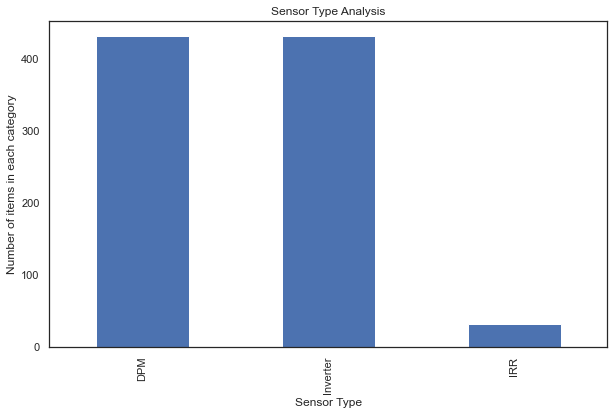

In [16]:
sensor = df['Sensor Type'].value_counts() 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sensor.sort_values(ascending=False).plot(kind='bar', ax=ax)

ax.set_ylabel('Number of items in each category')
ax.set_xlabel('Sensor Type')
ax.set_title('Sensor Type Analysis')

plt.show()

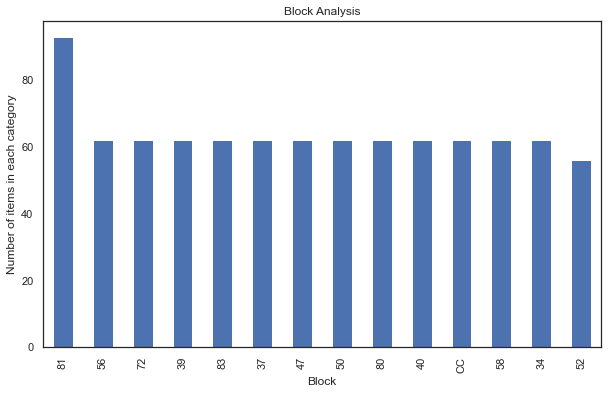

In [17]:
label_freq = df['block'].value_counts() 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

label_freq.sort_values(ascending=False).plot(kind='bar', ax=ax)

ax.set_ylabel('Number of items in each category')
ax.set_xlabel('Block')
ax.set_title('Block Analysis')

plt.show()

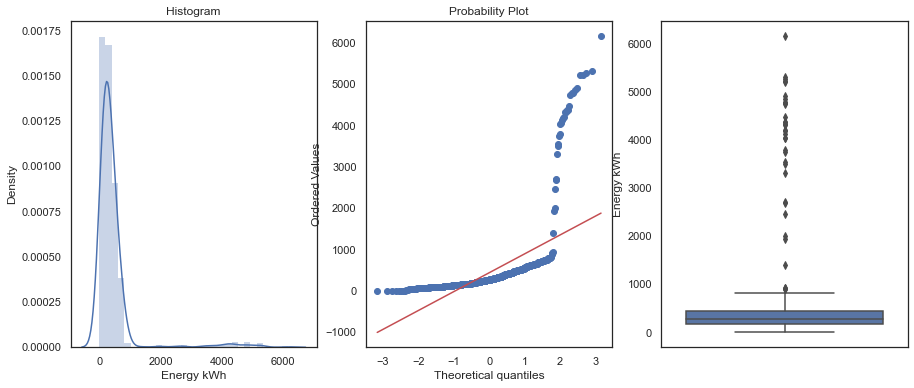

Number of outliers in Energy kWh: 35


In [18]:
#outlier detection
def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 3, 1)
    plt.rcParams["patch.edgecolor"] = "none"
    sns.histplot(df[variable], bins=30, kde = True, stat ="density", kde_kws=dict(cut = 3),alpha = 0.30)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])

    plt.show()
    
    # Count outliers using IQR method
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]

    print(f'Number of outliers in {variable}: {len(outliers)}')
    
diagnostic_plots(df, 'Energy kWh')

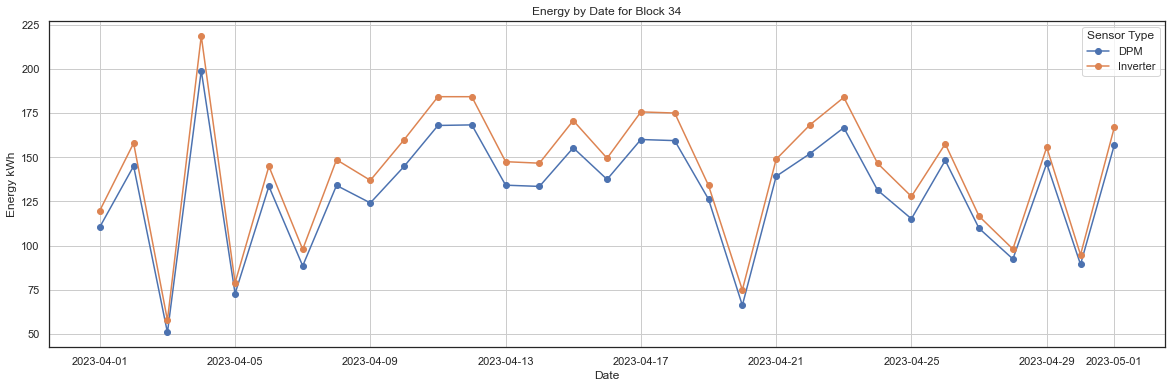

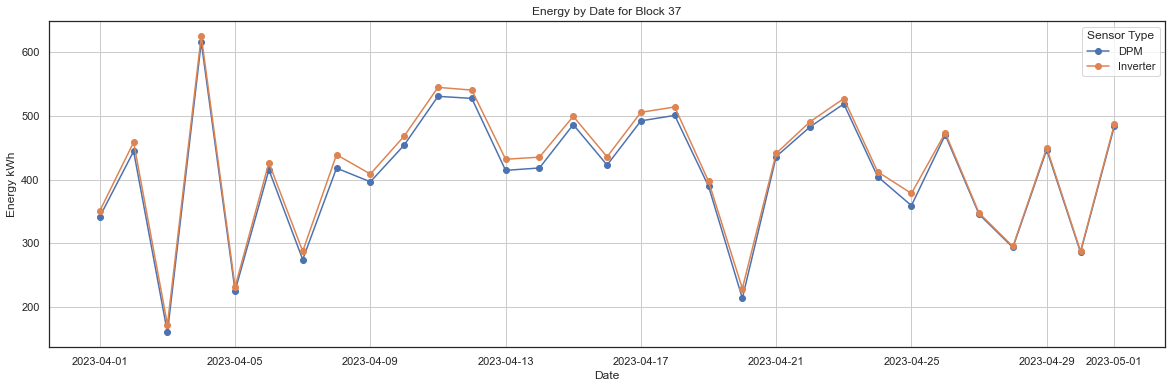

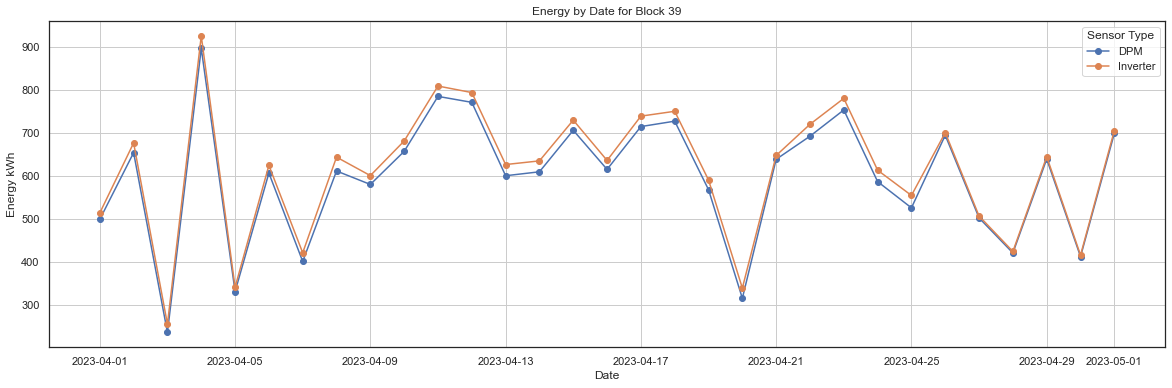

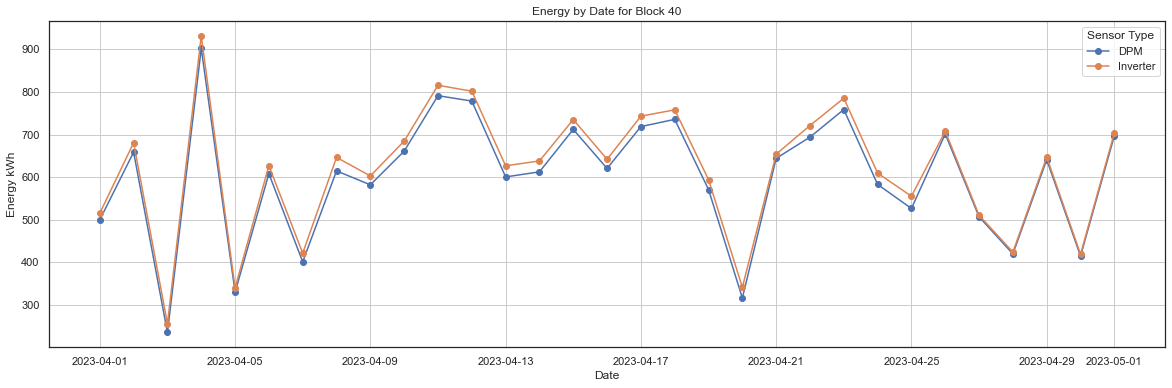

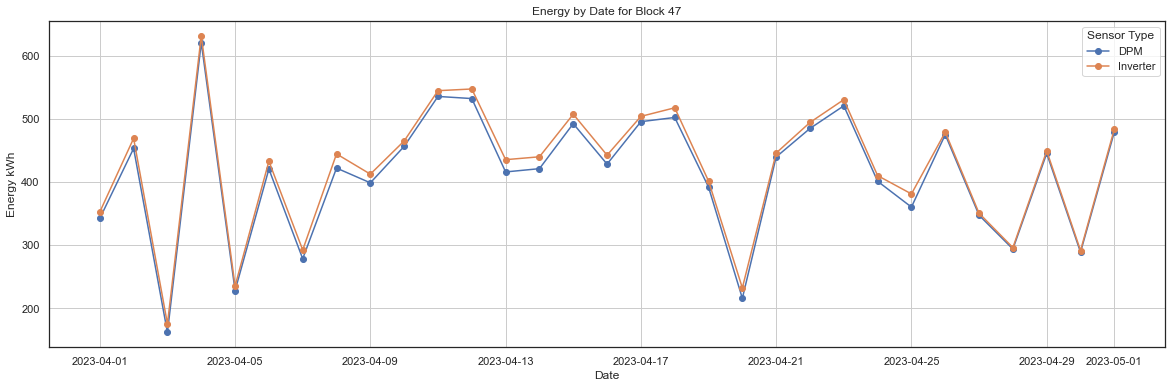

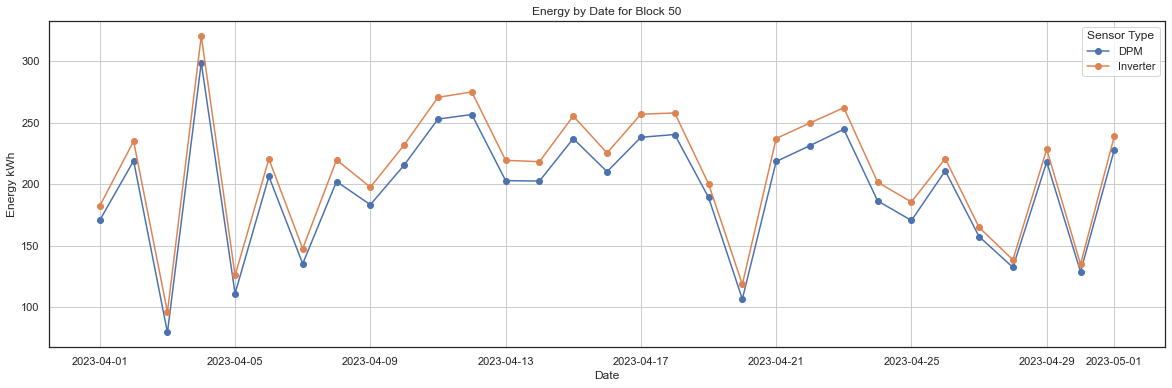

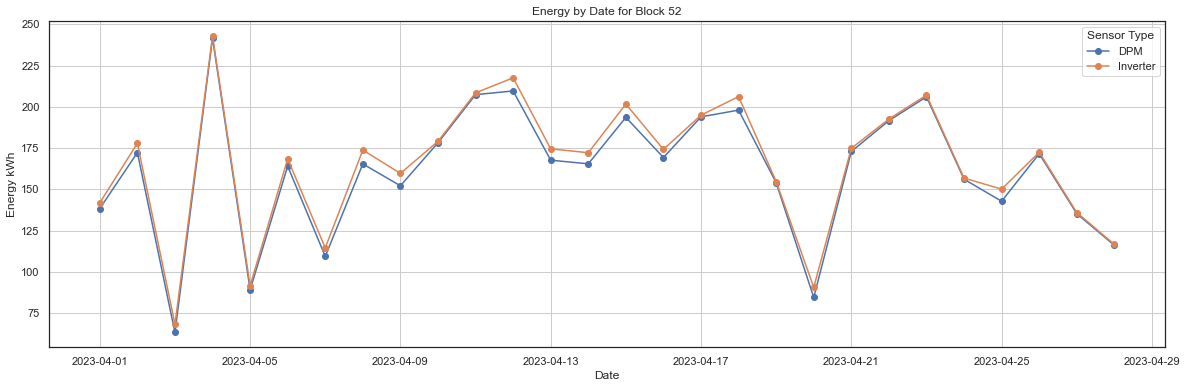

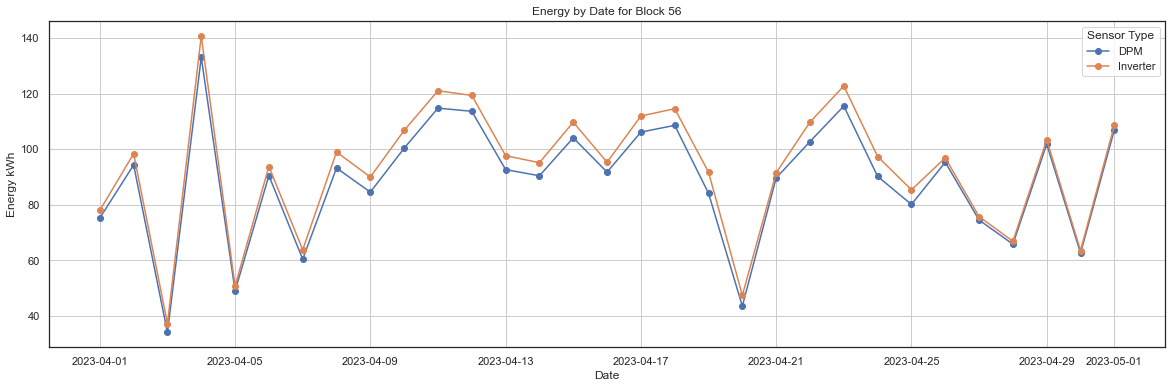

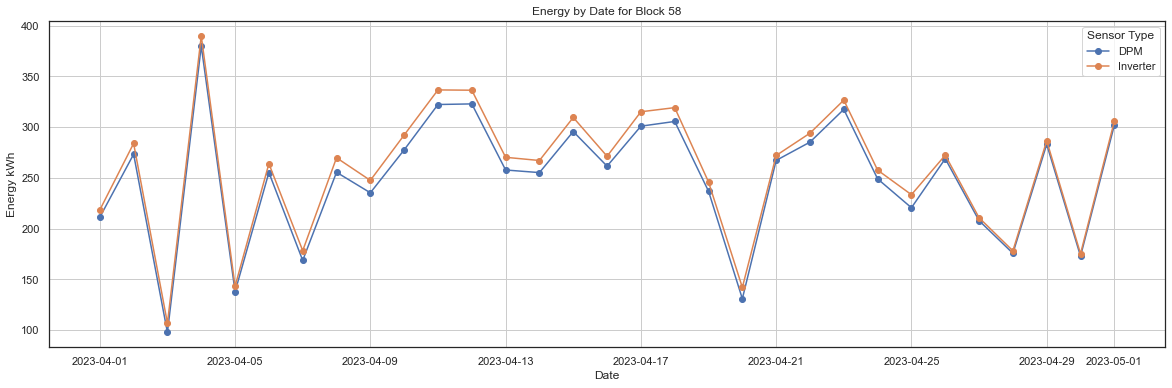

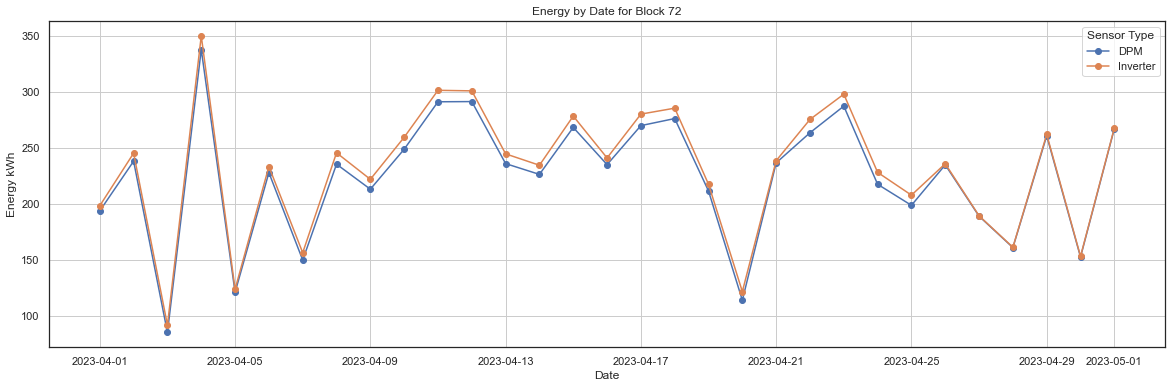

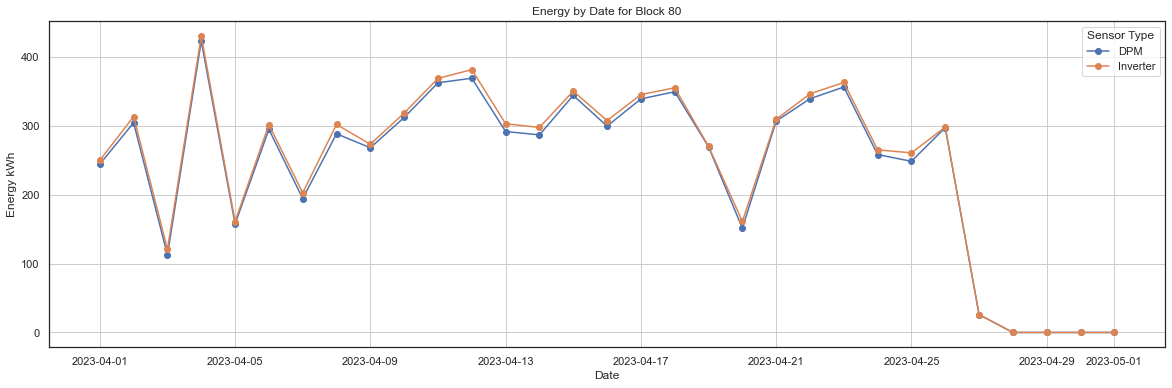

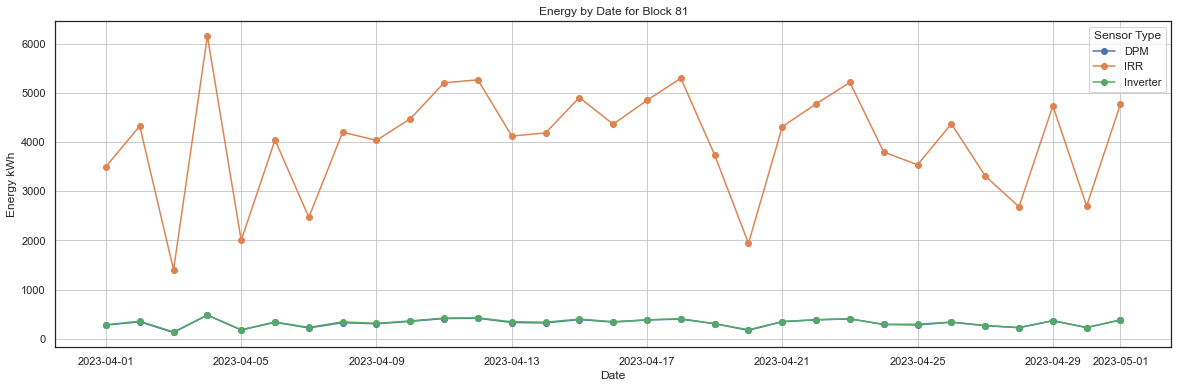

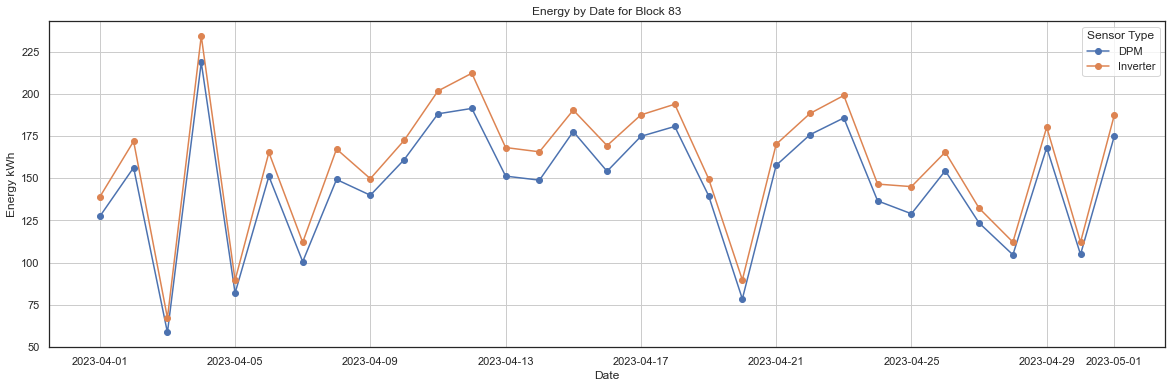

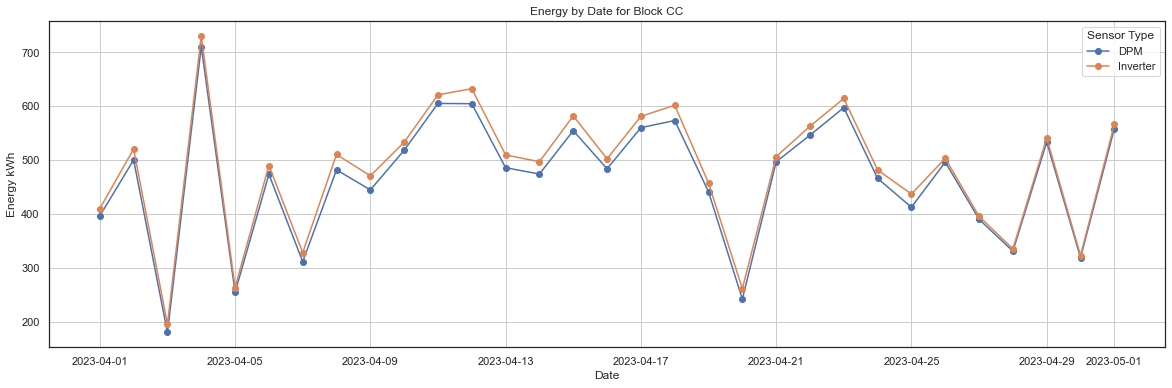

In [19]:
# Energy generated per block by date and sensor type
grouped_data = df.pivot_table(index='Date and Time', columns=['block', 'Sensor Type'], values='Energy kWh', aggfunc='sum')

# Plot multiline chart
for block in grouped_data.columns.levels[0]:
    plt.figure(figsize=(20, 6))
    for sensor_type in grouped_data[block].columns:
        plt.plot(grouped_data.index, grouped_data[block][sensor_type], marker='o', label=sensor_type)
    plt.title(f'Energy by Date for Block {block}')
    plt.xlabel('Date')
    plt.ylabel('Energy kWh')
    plt.legend(title='Sensor Type')
    plt.grid(True)
    plt.show()

In [20]:
#Cleaning
# check for missng value 
df.isnull().sum()
df.isnull().mean()

Date and Time    0.0
Location Code    0.0
Energy kWh       0.0
Sensor Type      0.0
block            0.0
dtype: float64

### dpm sensor from estate office 

In [21]:
dpm24_01 = pd.read_excel('Estate office Custom report for datasets/2024/DPM/Energy_01Jan2024_To_30Jan2024__DPM.xlsx')
dpm24_02 = pd.read_excel('Estate office Custom report for datasets/2024/DPM/Energy_01Feb2024_To_29Feb2024__DPM.xlsx')
dpm24_03 = pd.read_excel('Estate office Custom report for datasets/2024/DPM/Energy_01Mar2024_To_30Mar2024__DPM.xlsx')
dpm24_04 = pd.read_excel('Estate office Custom report for datasets/2024/DPM/Energy_01Apr2024_To_30Apr2024__DPM.xlsx')

dpm23_01 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Jan2023_To_30Jan2023__DPM.xlsx')
dpm23_02 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Feb2023_To_28Feb2023__DPM.xlsx')
dpm23_03 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Mar2023_To_30Mar2023__DPM.xlsx')
dpm23_04 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Apr2023_To_30Apr2023__DPM.xlsx')
dpm23_05 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01May2023_To_30May2023__DPM.xlsx')
dpm23_06 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Jun2023_To_30Jun2023__DPM.xlsx')
dpm23_07 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Jul2023_To_30Jul2023__DPM.xlsx')
dpm23_08 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Aug2023_To_30Aug2023_DPM.xlsx')
dpm23_09 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Sep2023_To_30Sep2023__DPM.xlsx')
dpm23_10 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Oct2023_To_30Oct2023__DPM.xlsx')
dpm23_11 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Nov2023_To_30Nov2023__DPM.xlsx')
dpm23_12 = pd.read_excel('Estate office Custom report for datasets/2023/DPM/Energy_01Dec2023_To_30Dec2023__DPM.xlsx')

dpm22_01 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Jan2022_To_30Jan2022__DPM.xlsx')
dpm22_02 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Feb2022_To_28Feb2022__DPM.xlsx')
dpm22_03 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Mar2022_To_30Mar2022__DPM.xlsx')
dpm22_04 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Apr2022_To_30Apr2022__DPM.xlsx')
dpm22_05 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01May2022_To_31May2022__DPM.xlsx')
dpm22_06 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Jun2022_To_30Jun2022__DPM.xlsx')
dpm22_07 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Jul2022_To_30Jul2022__DPM.xlsx')
dpm22_08 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Aug2022_To_30Aug2022__DPM.xlsx')
dpm22_09 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Sep2022_To_30Sep2022__DPM.xlsx')
dpm22_10 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Oct2022_To_30Oct2022__DPM.xlsx')
dpm22_11 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Nov2022_To_30Nov2022__DPM.xlsx')
dpm22_12 = pd.read_excel('Estate office Custom report for datasets/2022/DPM/Energy_01Dec2022_To_30Dec2022__DPM.xlsx')

dpm21_01 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Jan2021_To_30Jan2021__DPM.xlsx')
dpm21_02 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Feb2021_To_28Feb2021__DPM.xlsx')
dpm21_03 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Mar2021_To_30Mar2021__DPM.xlsx')
dpm21_04 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Apr2021_To_30Apr2021__DPM.xlsx')
dpm21_05 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01May2021_To_30May2021__DPM.xlsx')
dpm21_06 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Jun2021_To_30Jun2021__DPM.xlsx')
dpm21_07 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Jul2021_To_30Jul2021__DPM.xlsx')
dpm21_08 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Aug2021_To_30Aug2021__DPM.xlsx')
dpm21_09 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Sep2021_To_30Sep2021__DPM.xlsx')
dpm21_10 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Oct2021_To_30Oct2021_DPM.xlsx')
dpm21_11 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Nov2021_To_30Nov2021_DM.xlsx')
dpm21_12 = pd.read_excel('Estate office Custom report for datasets/2021/DPM/Energy_01Dec2021_To_30Dec2021__DPM.xlsx')

dpm21 = [dpm21_01, dpm21_02, dpm21_03, dpm21_04, dpm21_05, dpm21_06, dpm21_07, dpm21_08, dpm21_09, dpm21_10, dpm21_11, dpm21_12]
dpm22 = [dpm22_01, dpm22_02, dpm22_03, dpm22_04, dpm22_05, dpm22_06, dpm22_07, dpm22_08, dpm22_09, dpm22_10, dpm22_11, dpm22_12]
dpm23 = [dpm23_01, dpm23_02, dpm23_03, dpm23_04, dpm23_05, dpm23_06, dpm23_07, dpm23_08, dpm23_09, dpm23_10, dpm23_11, dpm23_12]
dpm24 = [dpm24_01, dpm24_02, dpm24_03, dpm24_04]

# Concatenate DataFrames
df_dpm = pd.concat(dpm21 + dpm22 + dpm23 + dpm24, axis=0)
df_dpm

Date and Time     Location Code  IRR Value W/m²  Energy kWh  \
0      2021-01-01  SN2-NAP72-599489           0.000       41.21   
1      2021-01-02  SN2-NAP72-599489           0.000        7.45   
2      2021-01-03  SN2-NAP72-599489           0.000       67.86   
3      2021-01-04  SN2-NAP72-599489        2440.595      126.32   
4      2021-01-05  SN2-NAP72-599489        4479.086      235.24   
..            ...               ...             ...         ...   
408    2024-04-26  SN2-NAP58-599489        4379.833      256.56   
409    2024-04-27  SN2-NAP58-599489        4268.050      250.62   
410    2024-04-28  SN2-NAP58-599489        3990.756      244.31   
411    2024-04-29  SN2-NAP58-599489        5386.331      305.01   
412    2024-04-30  SN2-NAP58-599489        4842.279      294.64   

     Expected Value kWh   PR %      Sensor ID Sensor Type  Energy Generation  
0                  0.00   0.00  DPM-599489-01         DPM              41.21  
1                  0.00   0.00  DPM-599489-01         DPM               7.45  
2                  0.00   0.00  DPM-599489-01         DPM              67.86  
3                157.85  80.03  DPM-599489-01         DPM             126.32  
4                289.68  81.21  DPM-599489-01         DPM             235.24  
..                  ...    ...            ...         ...                ...  
408              303.19  84.62  DPM-599489-16         DPM             256.56  
409              295.46  84.82  DPM-599489-16         DPM             250.62  
410              276.26  88.43  DPM-599489-16         DPM             244.31  
411              372.87  81.80  DPM-599489-16         DPM             305.01  
412              335.21  87.90  DPM-599489-16         DPM             294.64  

[18861 rows x 9 columns]

In [22]:
df_dpm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18861 entries, 0 to 412
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date and Time       18861 non-null  object 
 1   Location Code       18861 non-null  object 
 2   IRR Value W/m²      18861 non-null  float64
 3   Energy kWh          18861 non-null  float64
 4   Expected Value kWh  18861 non-null  float64
 5   PR %                18861 non-null  float64
 6   Sensor ID           18861 non-null  object 
 7   Sensor Type         18861 non-null  object 
 8   Energy Generation   18861 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.4+ MB


In [23]:
df_dpm.describe()

IRR Value W/m²     Energy kWh  Expected Value kWh         PR %  \
count    18861.000000   18861.000000        18861.000000  18861.00000   
mean      3778.312944     317.313989          292.478908     84.48020   
std       1414.401281    3062.677787          167.817926     13.35164   
min          0.000000       0.000000            0.000000      0.00000   
25%       2864.267000     151.060000          165.170000     83.99000   
50%       3927.283000     240.700000          269.410000     87.78000   
75%       4836.467000     345.620000          396.340000     89.99000   
max       6876.086000  378419.790000         1014.570000     90.00000   

       Energy Generation  
count       18861.000000  
mean          317.313989  
std          3062.677787  
min             0.000000  
25%           151.060000  
50%           240.700000  
75%           345.620000  
max        378419.790000

In [24]:
#preparing data for exploration
# Convert 'Date and Time' to datetime object
df_dpm['Date and Time'] = pd.to_datetime(df_dpm['Date and Time'])

# Extract month and year
df_dpm['Month'] = df_dpm['Date and Time'].dt.strftime('%Y-%m')

df_dpm['block'] = df_dpm['Location Code'].str[7:9]

df_dpm

Date and Time     Location Code  IRR Value W/m²  Energy kWh  \
0      2021-01-01  SN2-NAP72-599489           0.000       41.21   
1      2021-01-02  SN2-NAP72-599489           0.000        7.45   
2      2021-01-03  SN2-NAP72-599489           0.000       67.86   
3      2021-01-04  SN2-NAP72-599489        2440.595      126.32   
4      2021-01-05  SN2-NAP72-599489        4479.086      235.24   
..            ...               ...             ...         ...   
408    2024-04-26  SN2-NAP58-599489        4379.833      256.56   
409    2024-04-27  SN2-NAP58-599489        4268.050      250.62   
410    2024-04-28  SN2-NAP58-599489        3990.756      244.31   
411    2024-04-29  SN2-NAP58-599489        5386.331      305.01   
412    2024-04-30  SN2-NAP58-599489        4842.279      294.64   

     Expected Value kWh   PR %      Sensor ID Sensor Type  Energy Generation  \
0                  0.00   0.00  DPM-599489-01         DPM              41.21   
1                  0.00   0.00  DPM-599489-01         DPM               7.45   
2                  0.00   0.00  DPM-599489-01         DPM              67.86   
3                157.85  80.03  DPM-599489-01         DPM             126.32   
4                289.68  81.21  DPM-599489-01         DPM             235.24   
..                  ...    ...            ...         ...                ...   
408              303.19  84.62  DPM-599489-16         DPM             256.56   
409              295.46  84.82  DPM-599489-16         DPM             250.62   
410              276.26  88.43  DPM-599489-16         DPM             244.31   
411              372.87  81.80  DPM-599489-16         DPM             305.01   
412              335.21  87.90  DPM-599489-16         DPM             294.64   

       Month block  
0    2021-01    72  
1    2021-01    72  
2    2021-01    72  
3    2021-01    72  
4    2021-01    72  
..       ...   ...  
408  2024-04    58  
409  2024-04    58  
410  2024-04    58  
411  2024-04    58  
412  2024-04    58  

[18861 rows x 11 columns]

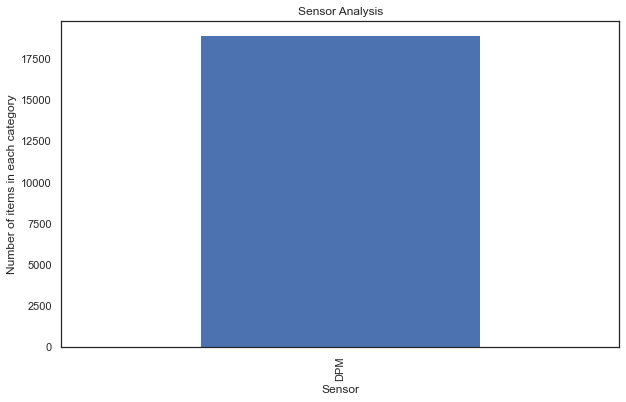

In [25]:
#exploring sensor type just in case data not only have dpm sensor 
sensortype = df_dpm['Sensor Type'].value_counts() 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sensortype.sort_values(ascending=False).plot(kind='bar', ax=ax)

ax.set_ylabel('Number of items in each category')
ax.set_xlabel('Sensor')
ax.set_title('Sensor Analysis')

plt.show()

Number of PR % values less than 80%: 1803


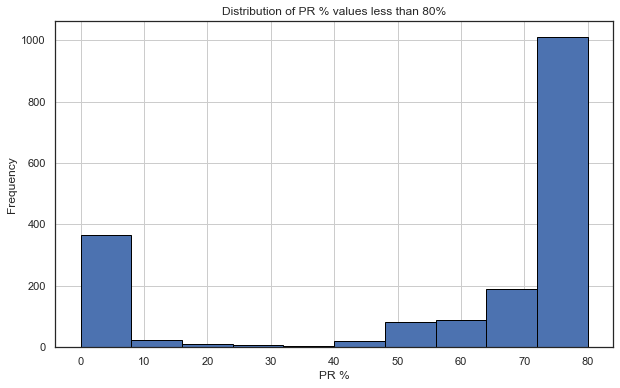

In [26]:
#PR < 80% means bad weather condition 
# Filter rows where PR % is less than 80
pr_less_than_80 = df_dpm[df_dpm['PR %'] < 80]

# Display the count
print("Number of PR % values less than 80%:", len(pr_less_than_80))

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(pr_less_than_80['PR %'], bins=10, edgecolor='black')
plt.title('Distribution of PR % values less than 80%')
plt.xlabel('PR %')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

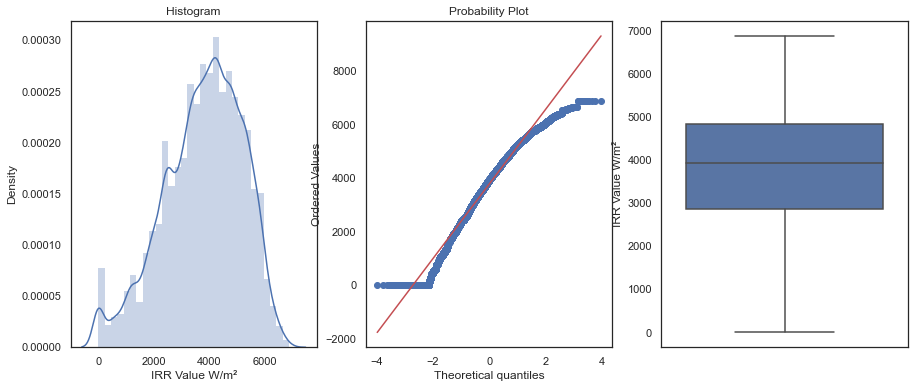

Number of outliers in IRR Value W/m²: 0


In [27]:
#outlier detection
diagnostic_plots(df_dpm, 'IRR Value W/m²')

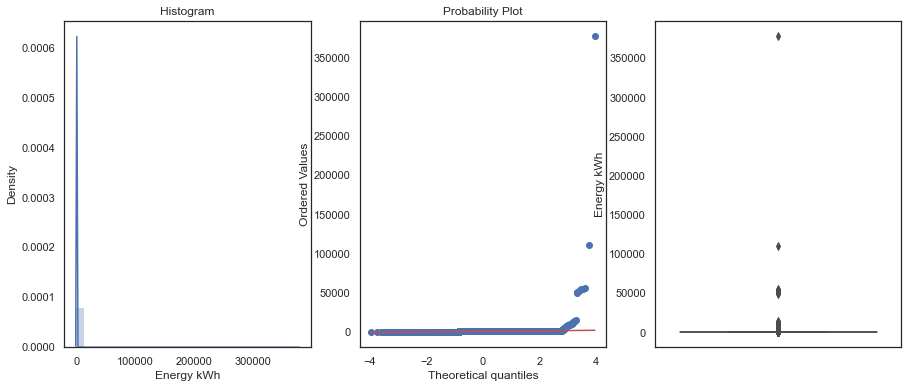

Number of outliers in Energy kWh: 270


In [28]:
diagnostic_plots(df_dpm, 'Energy kWh')

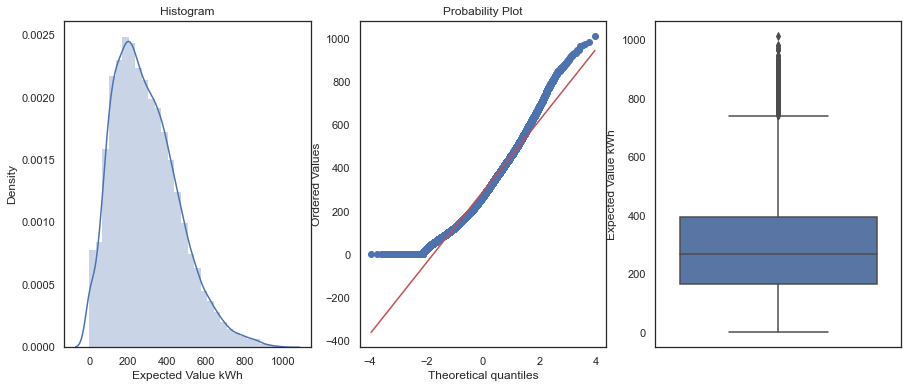

Number of outliers in Expected Value kWh: 252


In [29]:
diagnostic_plots(df_dpm, 'Expected Value kWh')

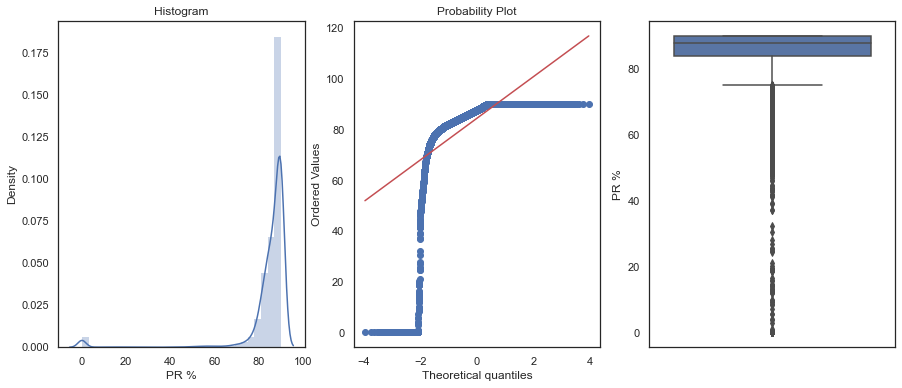

Number of outliers in PR %: 963


In [30]:
diagnostic_plots(df_dpm, 'PR %')

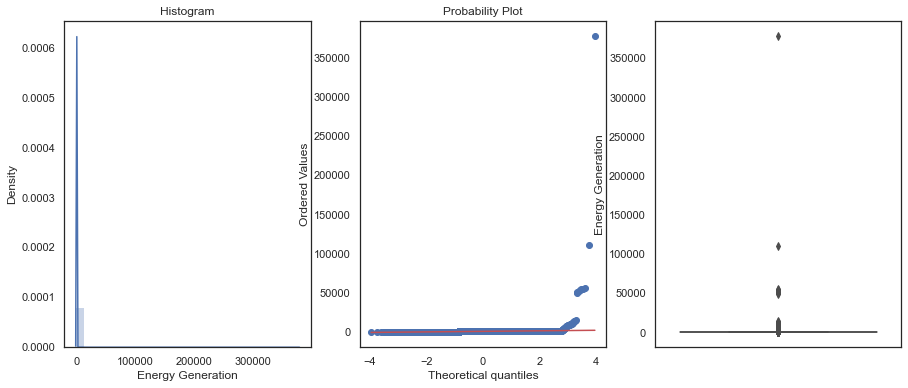

Number of outliers in Energy Generation: 270


In [31]:
diagnostic_plots(df_dpm, 'Energy Generation')

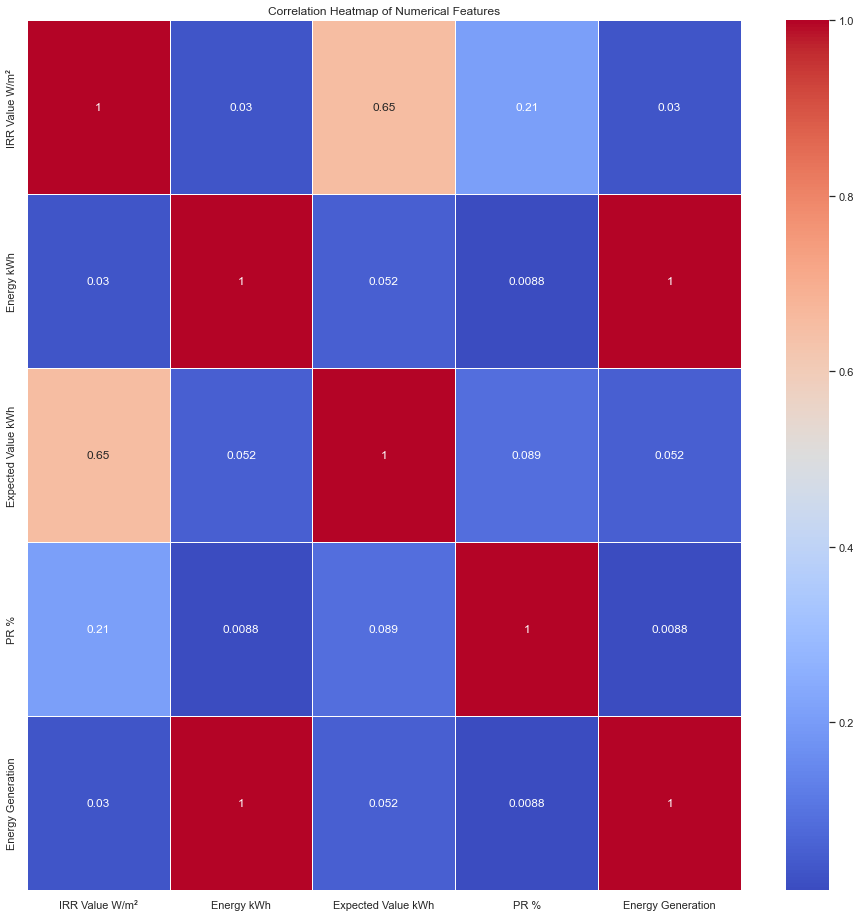

In [32]:
#Understanding the correlation of variables by showing the correlation matrix on a heatmap 

dpm_num = df_dpm.select_dtypes(include=['float64', 'int64']).copy()

# Compute the correlation matrix
correlation_matrix = dpm_num.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 16))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

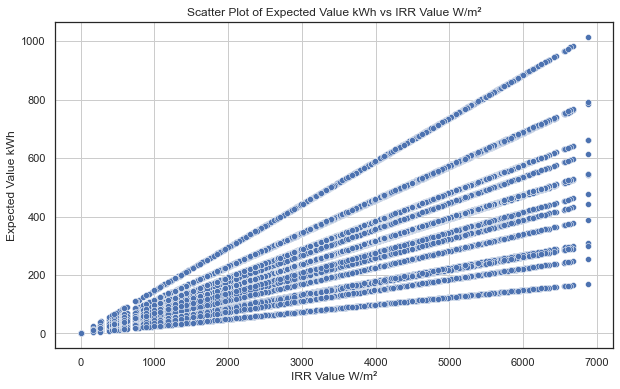

In [33]:
#exploring relationship for high correlation variables 
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IRR Value W/m²', y='Expected Value kWh', data=df_dpm)
plt.title('Scatter Plot of Expected Value kWh vs IRR Value W/m²')
plt.xlabel('IRR Value W/m²')
plt.ylabel('Expected Value kWh')
plt.grid(True)
plt.show()

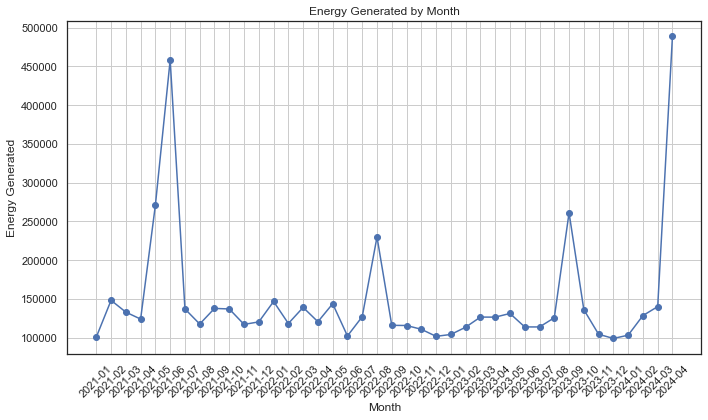

In [34]:
# Group by month and sum the values
energy_generated = df_dpm.groupby('Month')['Energy Generation'].sum()

# Prepare data for plotting
x = energy_generated.index
y = energy_generated.values

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', color='b')

plt.title('Energy Generated by Month')
plt.xlabel('Month')
plt.ylabel('Energy Generated')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

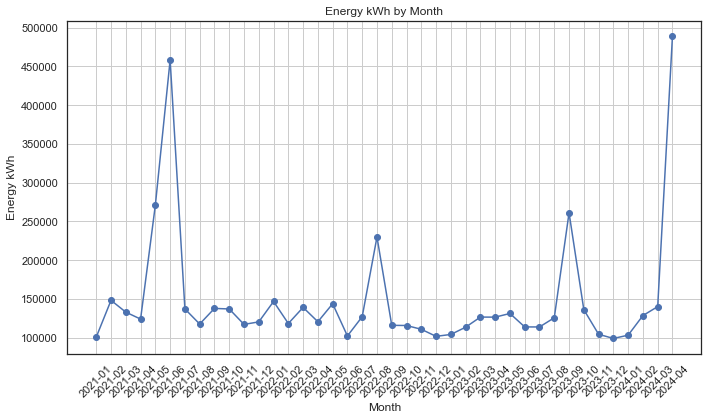

In [35]:
#exploring other variables

# Group by month and sum the values
energy_per_month= df_dpm.groupby('Month')['Energy kWh'].sum()

# Prepare data for plotting
x = energy_per_month.index
y = energy_per_month.values

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', color='b')

plt.title('Energy kWh by Month')
plt.xlabel('Month')
plt.ylabel('Energy kWh')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

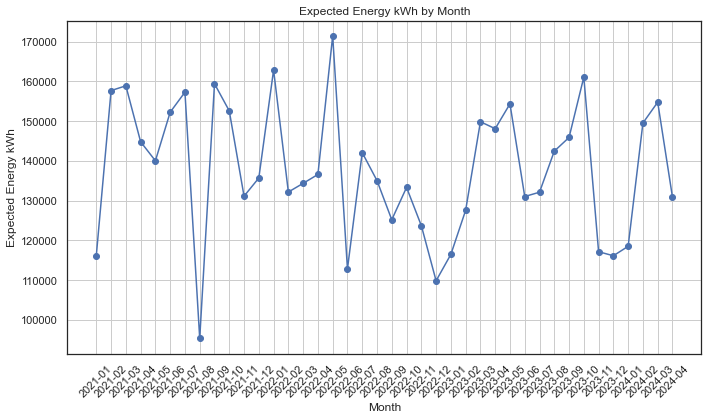

In [36]:
# Group by month and sum the values
expected_energy = df_dpm.groupby('Month')['Expected Value kWh'].sum()

# Prepare data for plotting
x = expected_energy.index
y = expected_energy.values

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', color='b')

plt.title('Expected Energy kWh by Month')
plt.xlabel('Month')
plt.ylabel('Expected Energy kWh')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

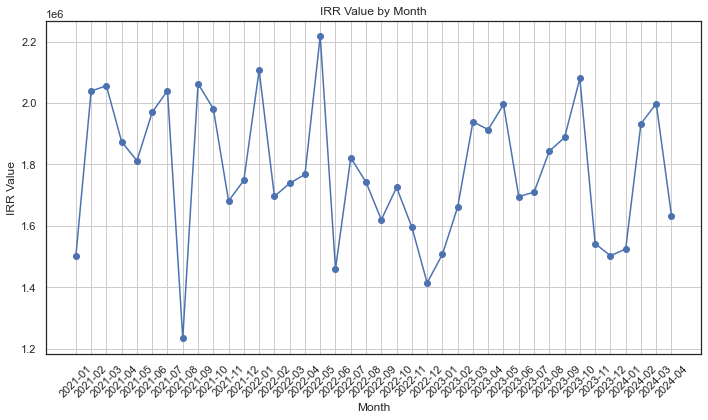

In [37]:
# Group by month and sum the values
irr_value = df_dpm.groupby('Month')['IRR Value W/m²'].sum()

# Prepare data for plotting
x = irr_value.index
y = irr_value.values

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', color='b')

plt.title('IRR Value by Month')
plt.xlabel('Month')
plt.ylabel('IRR Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

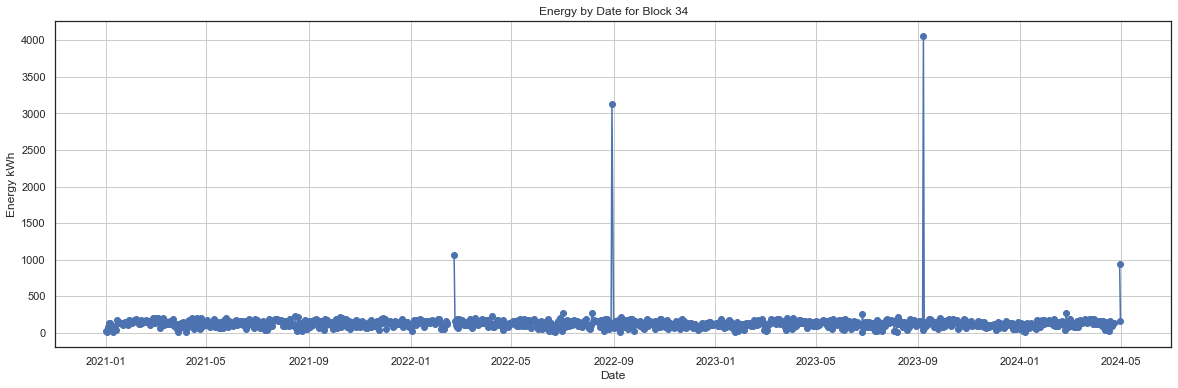

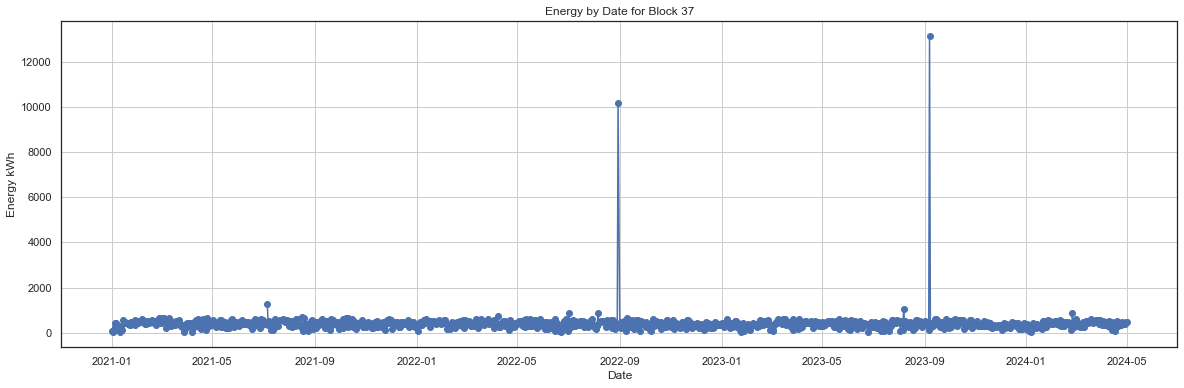

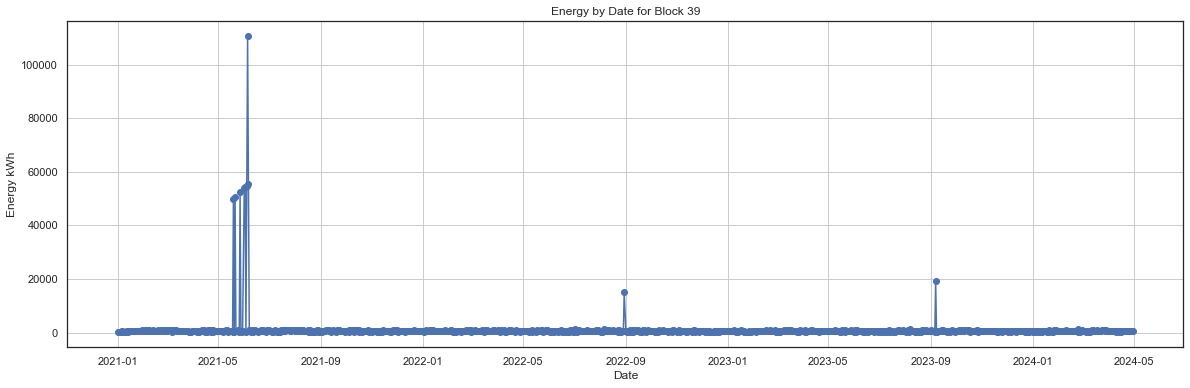

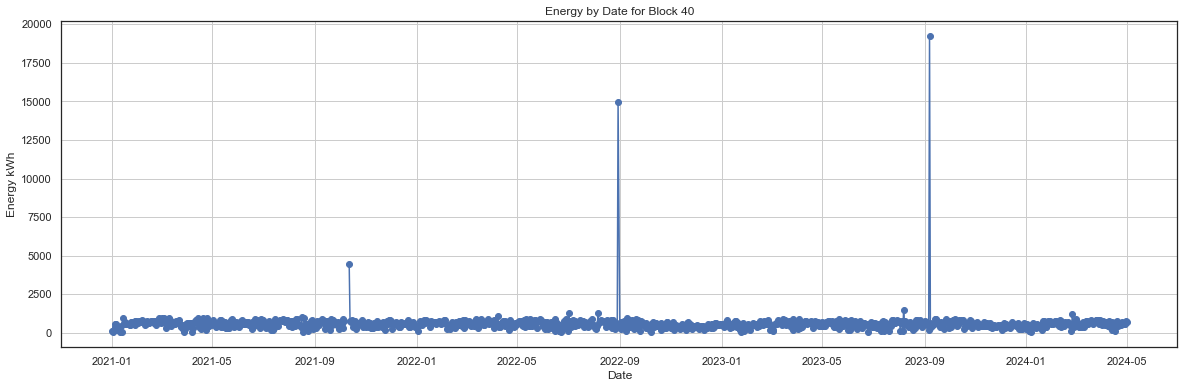

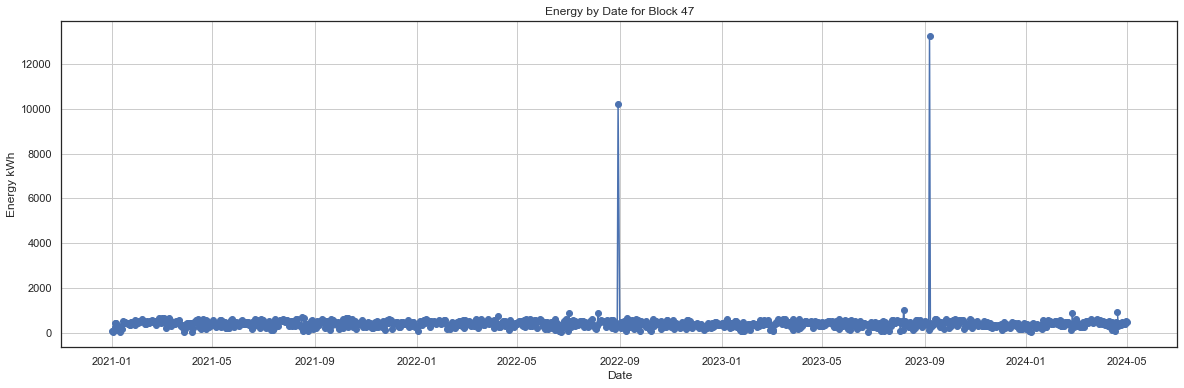

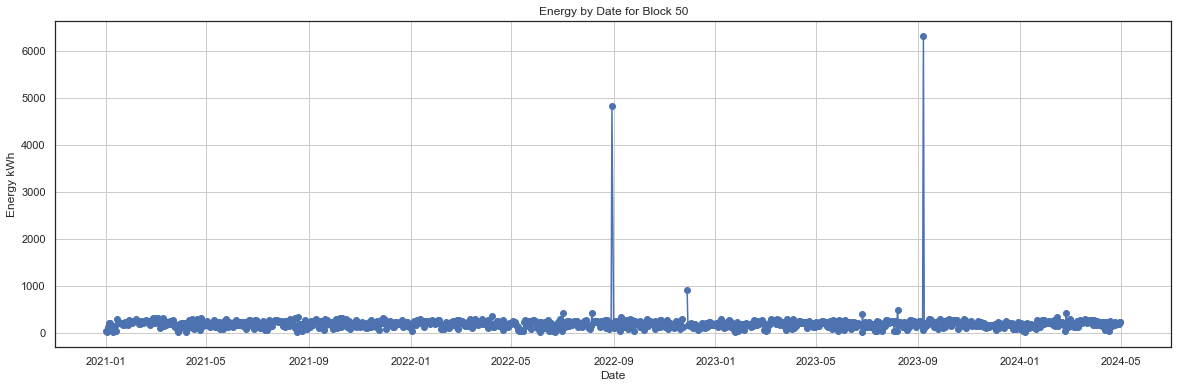

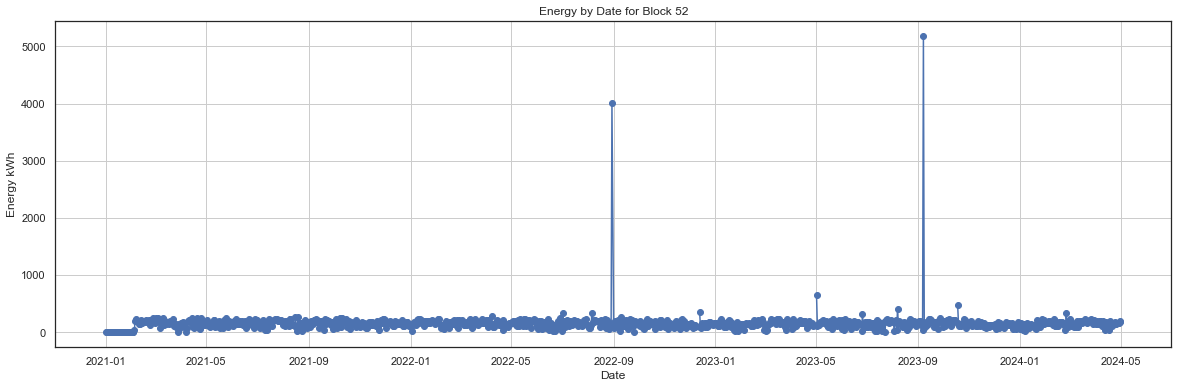

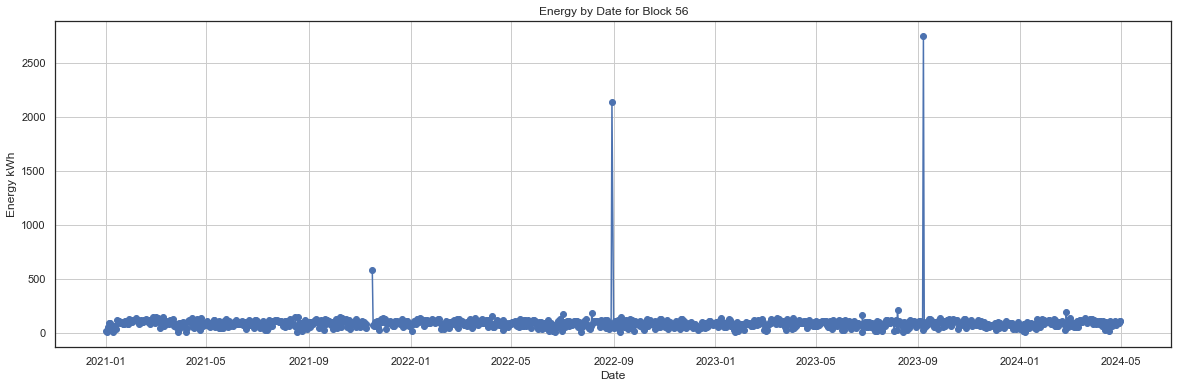

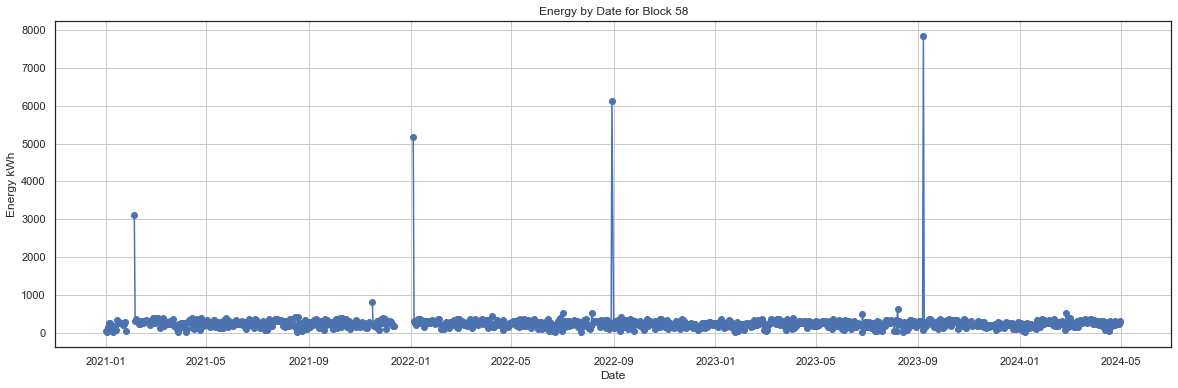

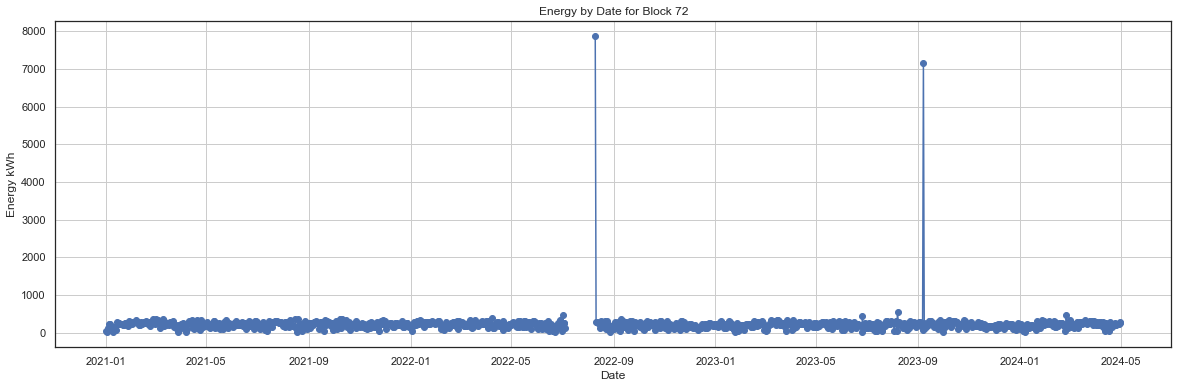

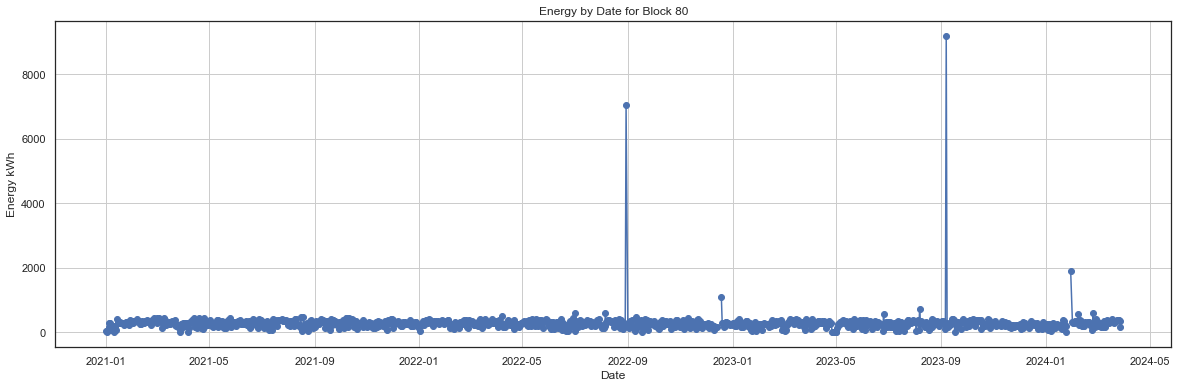

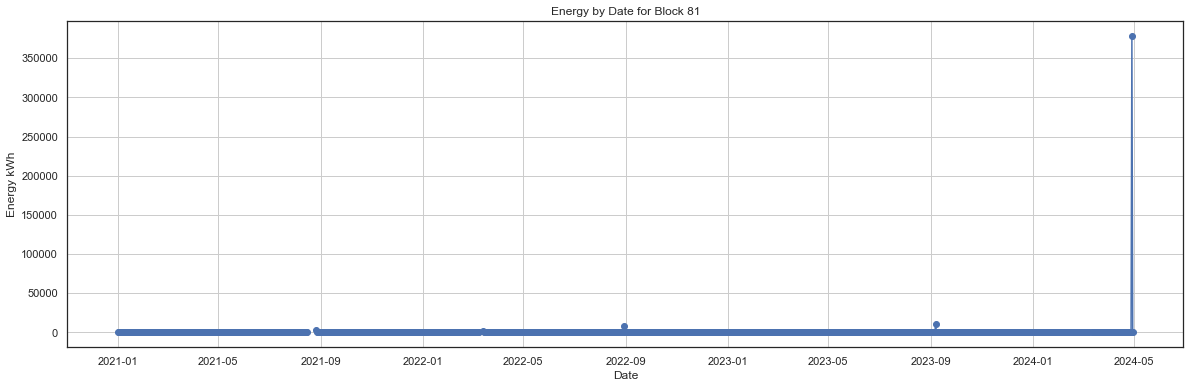

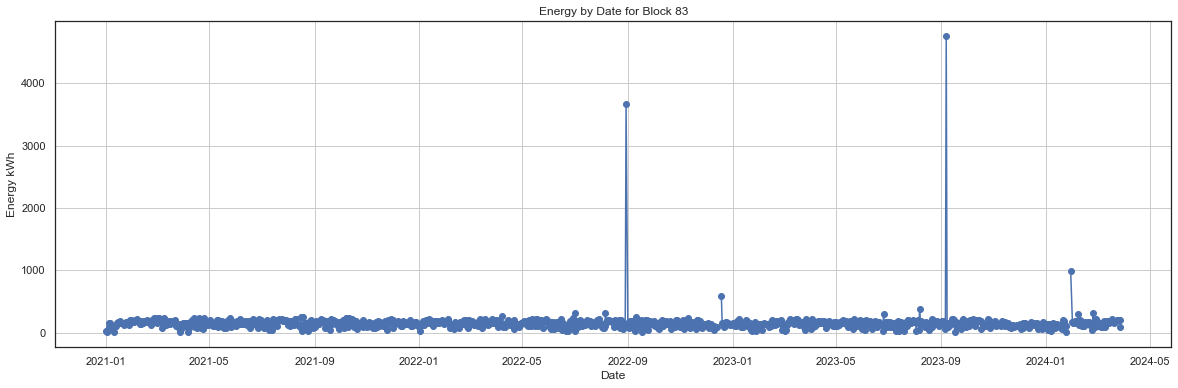

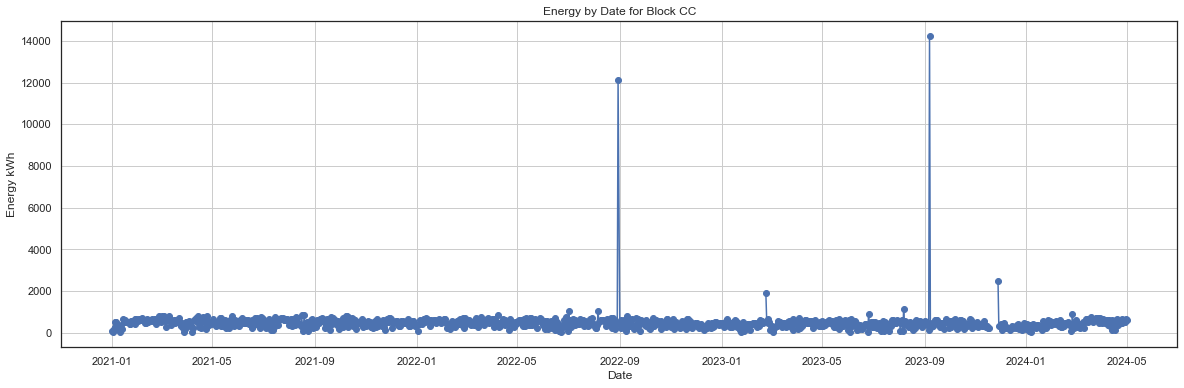

In [38]:
# Energy generated per block by date
compare_loc = df_dpm.pivot_table(index='Date and Time', columns='block', values='Energy Generation', aggfunc='sum')

# Plot multiline chart
for block in compare_loc.columns:
    plt.figure(figsize=(20, 6))
    plt.plot(compare_loc.index, compare_loc[block], marker='o')
    plt.title(f'Energy by Date for Block {block}')
    plt.xlabel('Date')
    plt.ylabel('Energy kWh')
    plt.grid(True)
    plt.show()

In [39]:
#Cleaning
# check for missng value 
df_dpm.isnull().sum()
df_dpm.isnull().mean()

Date and Time         0.0
Location Code         0.0
IRR Value W/m²        0.0
Energy kWh            0.0
Expected Value kWh    0.0
PR %                  0.0
Sensor ID             0.0
Sensor Type           0.0
Energy Generation     0.0
Month                 0.0
block                 0.0
dtype: float64

In [40]:
def cap_to_2_decimals(x):
    return float(f"{x:.2f}".rstrip('0').rstrip('.'))

#calculating for PR % 
((((df_dpm['Energy kWh'] / df_dpm['Expected Value kWh']) * 100).apply(cap_to_2_decimals)==df_dpm['PR %'])).value_counts()


# exploring those that does not match
temp=df_dpm.copy()
temp['match'] = ((((df_dpm['Energy kWh'] / df_dpm['Expected Value kWh']) * 100).apply(cap_to_2_decimals)==df_dpm['PR %']))
temp = temp[temp['match']==False]
temp.head(40)

Date and Time     Location Code  IRR Value W/m²  Energy kWh  \
0      2021-01-01  SN2-NAP72-599489           0.000       41.21   
1      2021-01-02  SN2-NAP72-599489           0.000        7.45   
2      2021-01-03  SN2-NAP72-599489           0.000       67.86   
6      2021-01-07  SN2-NAP72-599489        1120.423       69.19   
8      2021-01-09  SN2-NAP72-599489        2067.000      125.08   
11     2021-01-12  SN2-NAP72-599489        2552.148      160.03   
13     2021-01-14  SN2-NAP72-599489        3614.112      283.23   
16     2021-01-17  SN2-NAP72-599489        4552.340      267.95   
18     2021-01-19  SN2-NAP72-599489        3738.356      232.67   
24     2021-01-25  SN2-NAP72-599489        4093.562      255.66   
26     2021-01-27  SN2-NAP72-599489        3280.783      208.10   
29     2021-01-30  SN2-NAP72-599489        4566.933      291.77   
30     2021-01-01  SN2-NAP50-599489           0.000       38.49   
31     2021-01-02  SN2-NAP50-599489           0.000        7.09   
32     2021-01-03  SN2-NAP50-599489           0.000       62.97   
36     2021-01-07  SN2-NAP50-599489        1120.423       64.34   
37     2021-01-08  SN2-NAP50-599489        1880.699       96.50   
38     2021-01-09  SN2-NAP50-599489        2067.000      114.25   
41     2021-01-12  SN2-NAP50-599489        2552.148      146.86   
43     2021-01-14  SN2-NAP50-599489        3614.112      286.57   
46     2021-01-17  SN2-NAP50-599489        4552.340      237.10   
48     2021-01-19  SN2-NAP50-599489        3738.356      205.37   
49     2021-01-20  SN2-NAP50-599489        3786.624      196.41   
54     2021-01-25  SN2-NAP50-599489        4093.562      227.54   
56     2021-01-27  SN2-NAP50-599489        3280.783      184.80   
59     2021-01-30  SN2-NAP50-599489        4566.933      255.24   
60     2021-01-01  SN2-NAP52-599489           0.000        0.05   
61     2021-01-02  SN2-NAP52-599489           0.000        0.05   
62     2021-01-03  SN2-NAP52-599489           0.000        0.06   
90     2021-01-01  SN2-NAP81-599489           0.000       61.98   
91     2021-01-02  SN2-NAP81-599489           0.000       11.78   
92     2021-01-03  SN2-NAP81-599489           0.000      101.62   
96     2021-01-07  SN2-NAP81-599489        1120.423      103.12   
97     2021-01-08  SN2-NAP81-599489        1880.699      155.17   
98     2021-01-09  SN2-NAP81-599489        2067.000      185.10   
101    2021-01-12  SN2-NAP81-599489        2552.148      234.14   
102    2021-01-13  SN2-NAP81-599489        2458.128      205.20   
103    2021-01-14  SN2-NAP81-599489        3614.112      323.24   
106    2021-01-17  SN2-NAP81-599489        4552.340      378.94   
107    2021-01-18  SN2-NAP81-599489        4164.367      337.20   

     Expected Value kWh   PR %      Sensor ID Sensor Type  Energy Generation  \
0                  0.00   0.00  DPM-599489-01         DPM              41.21   
1                  0.00   0.00  DPM-599489-01         DPM               7.45   
2                  0.00   0.00  DPM-599489-01         DPM              67.86   
6                 72.46  89.99  DPM-599489-01         DPM              69.19   
8                133.68  89.99  DPM-599489-01         DPM             125.08   
11               165.06  89.99  DPM-599489-01         DPM             160.03   
13               233.74  89.99  DPM-599489-01         DPM             283.23   
16               294.42  89.99  DPM-599489-01         DPM             267.95   
18               241.78  89.99  DPM-599489-01         DPM             232.67   
24               264.75  89.99  DPM-599489-01         DPM             255.66   
26               212.18  89.99  DPM-599489-01         DPM             208.10   
29               295.37  89.99  DPM-599489-01         DPM             291.77   
30                 0.00   0.00  DPM-599489-02         DPM              38.49   
31                 0.00   0.00  DPM-599489-02         DPM               7.09   
32                 0.00   0.00  DPM-599489-02         DP

In [41]:
# Replace 0 values in 'PR %' column with 80 as there are sensor errors 
df_dpm['PR %'] = df_dpm['PR %'].replace(0, 80)

#Outlier handling PR% to the range of 70% to 90%
df_dpm['PR %'] = np.where(df_dpm['PR %'] < 70, 70, df_dpm['PR %'])
df_dpm['PR %'].min()

70.0

In [42]:
#Dropping Energy generation because it's the same as energy 
df_dpm = df_dpm.drop(columns=['Energy Generation'])
df_dpm

Date and Time     Location Code  IRR Value W/m²  Energy kWh  \
0      2021-01-01  SN2-NAP72-599489           0.000       41.21   
1      2021-01-02  SN2-NAP72-599489           0.000        7.45   
2      2021-01-03  SN2-NAP72-599489           0.000       67.86   
3      2021-01-04  SN2-NAP72-599489        2440.595      126.32   
4      2021-01-05  SN2-NAP72-599489        4479.086      235.24   
..            ...               ...             ...         ...   
408    2024-04-26  SN2-NAP58-599489        4379.833      256.56   
409    2024-04-27  SN2-NAP58-599489        4268.050      250.62   
410    2024-04-28  SN2-NAP58-599489        3990.756      244.31   
411    2024-04-29  SN2-NAP58-599489        5386.331      305.01   
412    2024-04-30  SN2-NAP58-599489        4842.279      294.64   

     Expected Value kWh   PR %      Sensor ID Sensor Type    Month block  
0                  0.00  80.00  DPM-599489-01         DPM  2021-01    72  
1                  0.00  80.00  DPM-599489-01         DPM  2021-01    72  
2                  0.00  80.00  DPM-599489-01         DPM  2021-01    72  
3                157.85  80.03  DPM-599489-01         DPM  2021-01    72  
4                289.68  81.21  DPM-599489-01         DPM  2021-01    72  
..                  ...    ...            ...         ...      ...   ...  
408              303.19  84.62  DPM-599489-16         DPM  2024-04    58  
409              295.46  84.82  DPM-599489-16         DPM  2024-04    58  
410              276.26  88.43  DPM-599489-16         DPM  2024-04    58  
411              372.87  81.80  DPM-599489-16         DPM  2024-04    58  
412              335.21  87.90  DPM-599489-16         DPM  2024-04    58  

[18861 rows x 10 columns]

### inverter sensor from estate office 

In [43]:
inv24_01 = pd.read_excel('Estate office Custom report for datasets/2024/INV/Energy_01Jan2024_To_30Jan2024__INV.xlsx')
inv24_02 = pd.read_excel('Estate office Custom report for datasets/2024/INV/Energy_01Feb2024_To_29Feb2024__INV.xlsx')
inv24_03 = pd.read_excel('Estate office Custom report for datasets/2024/INV/Energy_01Mar2024_To_30Mar2024__INV.xlsx')
inv24_04 = pd.read_excel('Estate office Custom report for datasets/2024/INV/Energy_01Apr2024_To_30Apr2024__INV.xlsx')

inv23_01 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Jan2023_To_30Jan2023_INV.xlsx')
inv23_02 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Feb2023_To_28Feb2023__INV.xlsx')
inv23_03 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Mar2023_To_30Mar2023__INV.xlsx')
inv23_04 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Apr2023_To_30Apr2023__INV.xlsx')
inv23_05 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01May2023_To_31May2023__INV.xlsx')
inv23_06 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Jun2023_To_30Jun2023__INV.xlsx')
inv23_07 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Jul2023_To_30Jul2023__INV.xlsx')
inv23_08 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Aug2023_To_30Aug2023__INV.xlsx')
inv23_09 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Sep2023_To_30Sep2023__INV.xlsx')
inv23_10 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Oct2023_To_30Oct2023__INV.xlsx')
inv23_11 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Nov2023_To_30Nov2023__INV.xlsx')
inv23_12 = pd.read_excel('Estate office Custom report for datasets/2023/INV/Energy_01Dec2023_To_30Dec2023__INV.xlsx')

inv22_01 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Jan2022_To_30Jan2022__INV.xlsx')
inv22_02 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Feb2022_To_28Feb2022__INV.xlsx')
inv22_03 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Mar2022_To_30Mar2022__INV.xlsx')
inv22_04 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Apr2022_To_30Apr2022__INV.xlsx')
inv22_05 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01May2022_To_30May2022__INV.xlsx')
inv22_06 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Jun2022_To_30Jun2022__INV.xlsx')
inv22_07 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Jul2022_To_30Jul2022__INV.xlsx')
inv22_08 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Aug2022_To_30Aug2022__INV.xlsx')
inv22_09 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Sep2022_To_30Sep2022__INV.xlsx')
inv22_10 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Oct2022_To_30Oct2022_INV.xlsx')
inv22_11 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Nov2022_To_30Nov2022__INV.xlsx')
inv22_12 = pd.read_excel('Estate office Custom report for datasets/2022/INV/Energy_01Dec2022_To_30Dec2022__INV.xlsx')

inv21_01 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Jan2021_To_30Jan2021__INV.xlsx')
inv21_02 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Feb2021_To_28Feb2021__INV.xlsx')
inv21_03 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Mar2021_To_30Mar2021__INV.xlsx')
inv21_04 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Apr2021_To_30Apr2021__INV.xlsx')
inv21_05 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01May2021_To_30May2021__INV.xlsx')
inv21_06 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Jun2021_To_30Jun2021__INV.xlsx')
inv21_07 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Jul2021_To_30Jul2021__INV.xlsx')
inv21_08 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Aug2021_To_30Aug2021__INV.xlsx')
inv21_09 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Sep2021_To_30Sep2021__INV.xlsx')
inv21_10 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Oct2021_To_30Oct2021__INV.xlsx')
inv21_11 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Nov2021_To_30Nov2021__INV.xlsx')
inv21_12 = pd.read_excel('Estate office Custom report for datasets/2021/INV/Energy_01Dec2021_To_30Dec2021__INV.xlsx')

inv21 = [inv21_01, inv21_02, inv21_03, inv21_04, inv21_05, inv21_06, inv21_07, inv21_08, inv21_09, inv21_10, inv21_11, inv21_12]
inv22 = [inv22_01, inv22_02, inv22_03, inv22_04, inv22_05, inv22_06, inv22_07, inv22_08, inv22_09, inv22_10, inv22_11, inv22_12]
inv23 = [inv23_01, inv23_02, inv23_03, inv23_04, inv23_05, inv23_06, inv23_07, inv23_08, inv23_09, inv23_10, inv23_11, inv23_12]
inv24 = [inv24_01, inv24_02, inv24_03, inv24_04]

# Concatenate DataFrames
df_inv = pd.concat(inv21 + inv22 + inv23 + inv24, axis=0)
df_inv

Date and Time     Location Code  Energy kWh
0      2021-01-01  SN2-NAP47-599489       80.78
1      2021-01-01  SN2-NAP50-599489       54.21
2      2021-01-01  SN2-NAP83-599489       30.96
3      2021-01-01  SN2-NAPCC-599489      100.43
4      2021-01-01  SN2-NAP81-599489       31.08
..            ...               ...         ...
348    2024-04-30  SN2-NAP81-599489      382.04
349    2024-04-30  SN2-NAP58-599489      298.36
350    2024-04-30  SN2-NAP52-599489      188.05
351    2024-04-30  SN2-NAP34-599489      164.25
352    2024-04-30  SN2-NAP37-599489      481.80

[16480 rows x 3 columns]

In [44]:
df_inv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16480 entries, 0 to 352
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  16480 non-null  object 
 1   Location Code  16480 non-null  object 
 2   Energy kWh     16480 non-null  float64
dtypes: float64(1), object(2)
memory usage: 515.0+ KB


In [45]:
# Convert 'Date and Time' to datetime object
df_inv['Date and Time'] = pd.to_datetime(df_inv['Date and Time'])

# Extract month and year
df_inv['Month'] = df_inv['Date and Time'].dt.strftime('%Y-%m')

df_inv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16480 entries, 0 to 352
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date and Time  16480 non-null  datetime64[ns]
 1   Location Code  16480 non-null  object        
 2   Energy kWh     16480 non-null  float64       
 3   Month          16480 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 643.8+ KB


In [46]:
df_inv['block'] = df_inv['Location Code'].str[7:9]
df_inv

Date and Time     Location Code  Energy kWh    Month block
0      2021-01-01  SN2-NAP47-599489       80.78  2021-01    47
1      2021-01-01  SN2-NAP50-599489       54.21  2021-01    50
2      2021-01-01  SN2-NAP83-599489       30.96  2021-01    83
3      2021-01-01  SN2-NAPCC-599489      100.43  2021-01    CC
4      2021-01-01  SN2-NAP81-599489       31.08  2021-01    81
..            ...               ...         ...      ...   ...
348    2024-04-30  SN2-NAP81-599489      382.04  2024-04    81
349    2024-04-30  SN2-NAP58-599489      298.36  2024-04    58
350    2024-04-30  SN2-NAP52-599489      188.05  2024-04    52
351    2024-04-30  SN2-NAP34-599489      164.25  2024-04    34
352    2024-04-30  SN2-NAP37-599489      481.80  2024-04    37

[16480 rows x 5 columns]

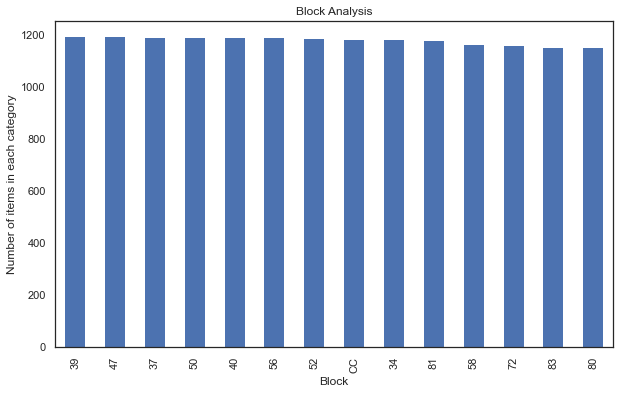

In [47]:
#exploring block
block_inv = df_inv['block'].value_counts() 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

block_inv.sort_values(ascending=False).plot(kind='bar', ax=ax)

ax.set_ylabel('Number of items in each category')
ax.set_xlabel('Block')
ax.set_title('Block Analysis')

plt.show()

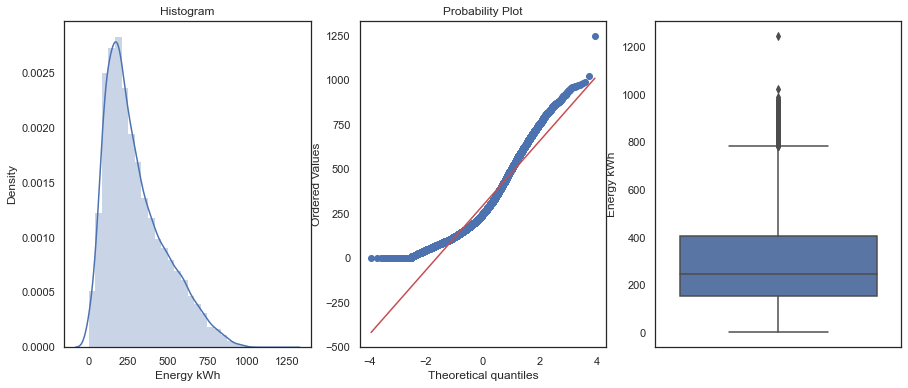

Number of outliers in Energy kWh: 279


In [48]:
#outlier detection
diagnostic_plots(df_inv, 'Energy kWh')

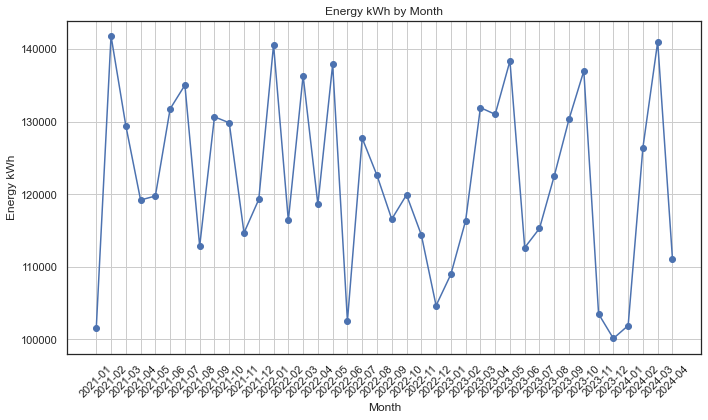

In [49]:
# Energy generated by month
energy_month = df_inv.groupby('Month')['Energy kWh'].sum()

# Prepare data for plotting
x = energy_month.index
y = energy_month.values

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', color='b')

plt.title('Energy kWh by Month')
plt.xlabel('Month')
plt.ylabel('Energy kWh')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

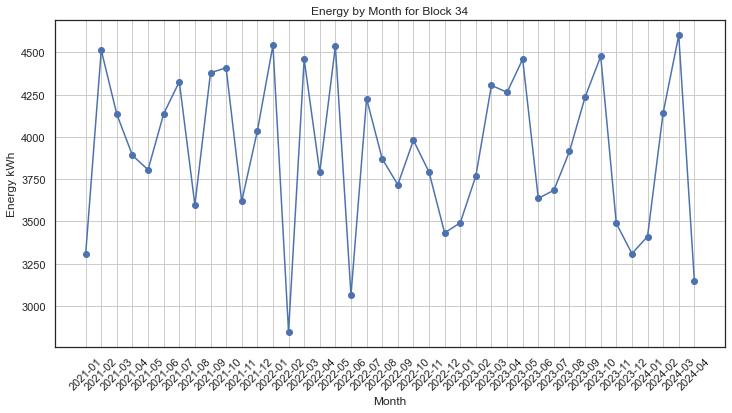

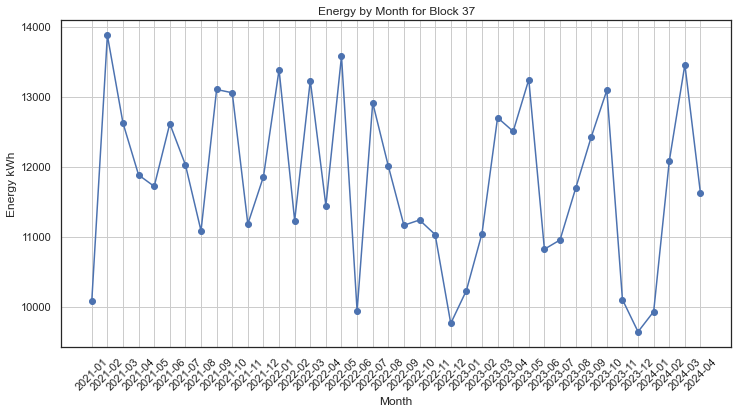

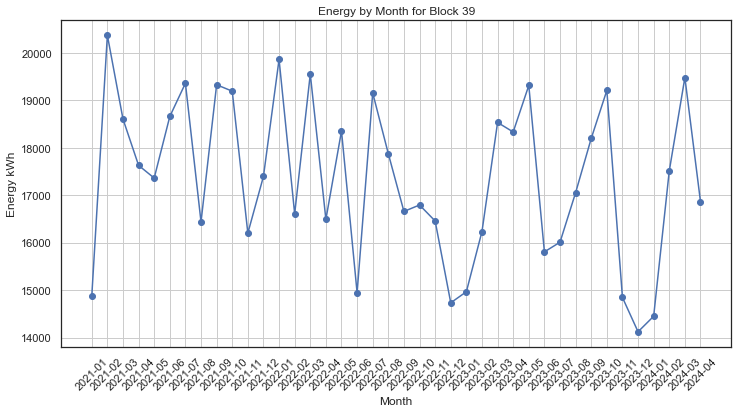

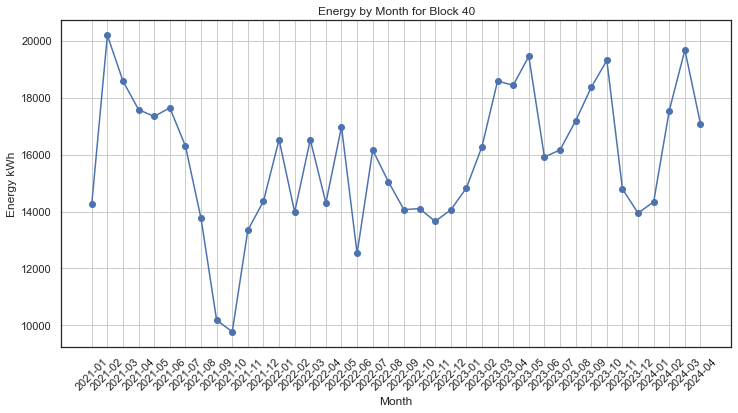

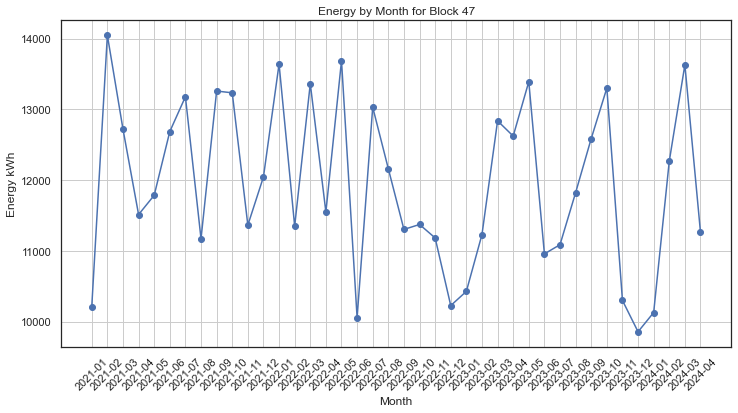

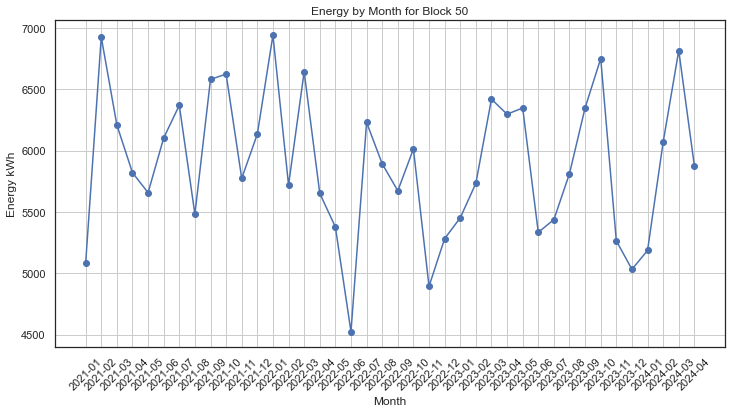

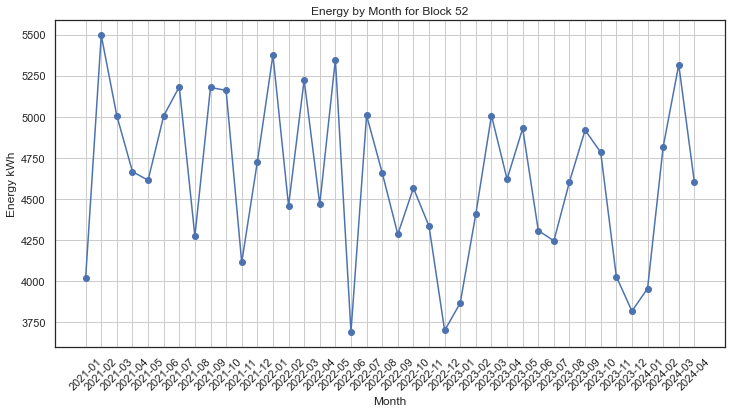

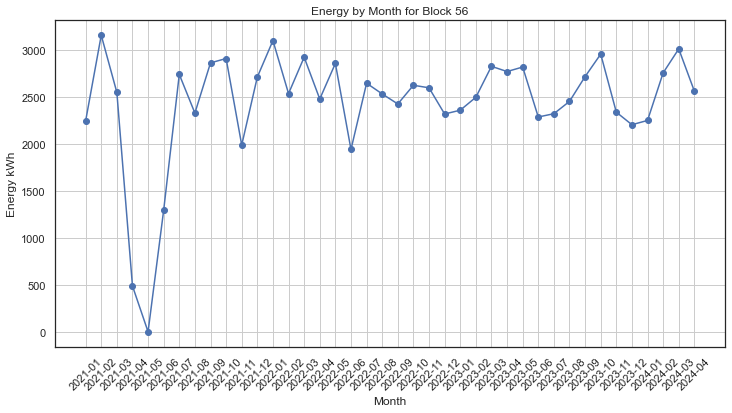

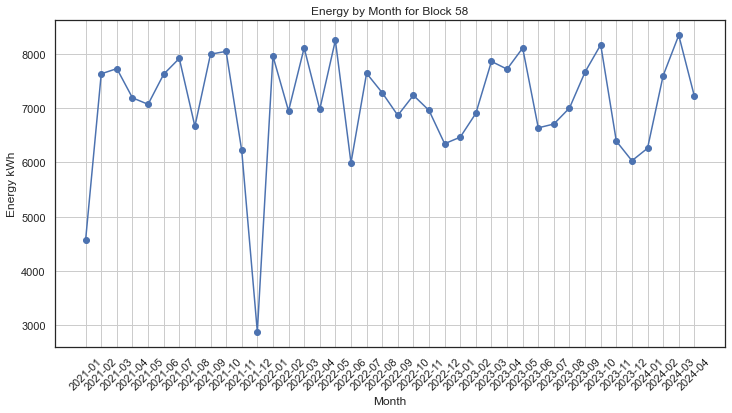

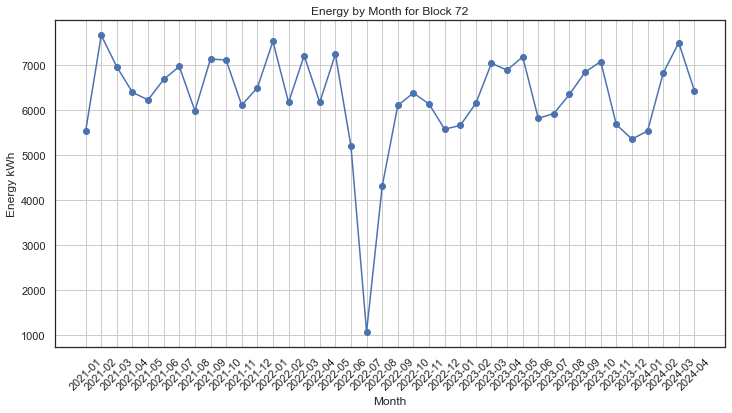

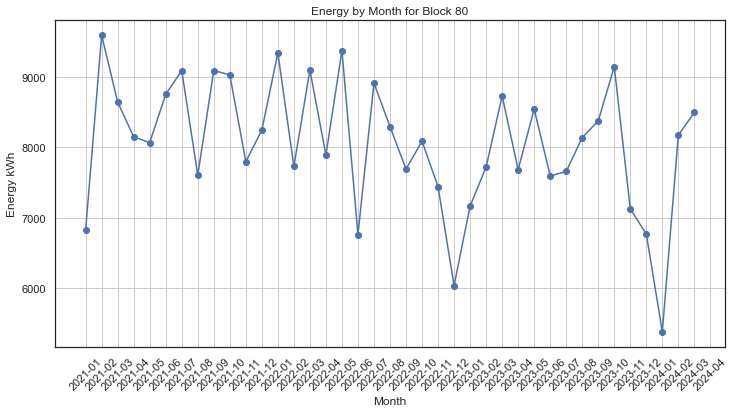

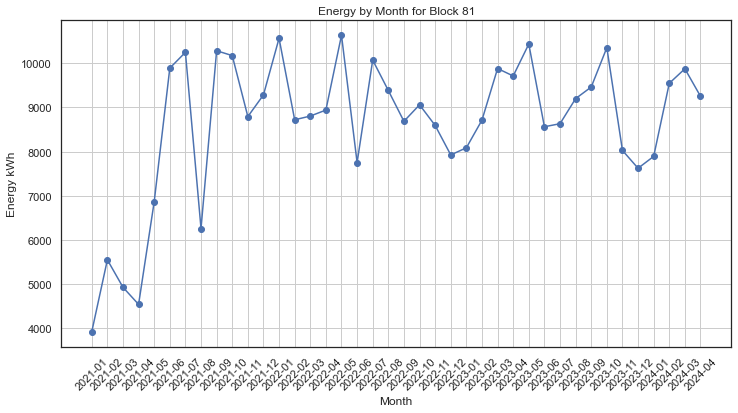

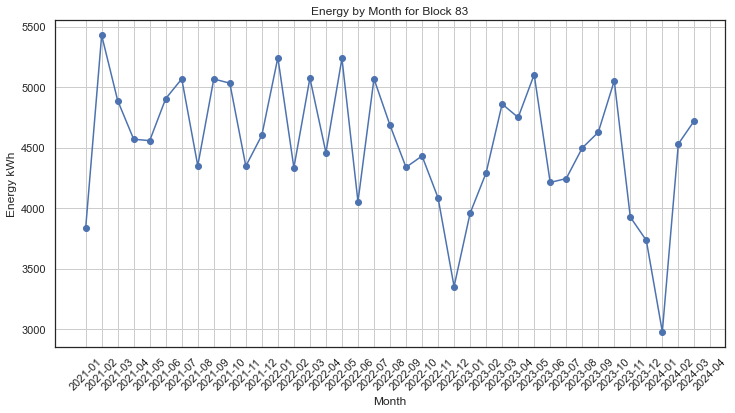

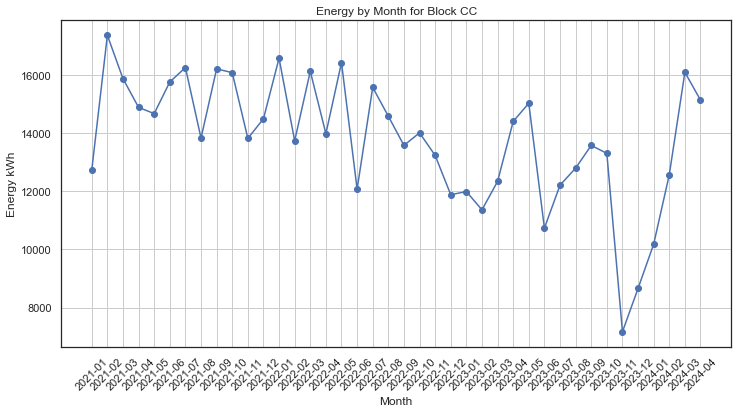

In [50]:
# Energy generated per block by month
grouped_data = df_inv.groupby(['Month', 'block'])['Energy kWh'].sum().unstack()

# Plot individual line charts for each block
for block in grouped_data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(grouped_data.index, grouped_data[block], marker='o')
    plt.title(f'Energy by Month for Block {block}')
    plt.xlabel('Month')
    plt.ylabel('Energy kWh')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.show()

In [51]:
#Cleaning
# check for missng value 
df_inv.isnull().sum()
df_inv.isnull().mean()

Date and Time    0.0
Location Code    0.0
Energy kWh       0.0
Month            0.0
block            0.0
dtype: float64

### IRR sensor from estate office 

In [52]:
irr24_01 = pd.read_excel('Estate office Custom report for datasets/2024/IRR/Energy_01Jan2024_To_30Jan2024__IRR.xlsx')
irr24_02 = pd.read_excel('Estate office Custom report for datasets/2024/IRR/Energy_01Feb2024_To_29Feb2024__IRR.xlsx')
irr24_03 = pd.read_excel('Estate office Custom report for datasets/2024/IRR/Energy_01Mar2024_To_30Mar2024__IRR.xlsx')
irr24_04 = pd.read_excel('Estate office Custom report for datasets/2024/IRR/Energy_01Apr2024_To_30Apr2024__IRR.xlsx')

irr23_01 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Jan2023_To_30Jan2023__IRR.xlsx')
irr23_02 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Feb2023_To_28Feb2023__IRR.xlsx')
irr23_03 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Mar2023_To_30Mar2023__IRR.xlsx')
irr23_04 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Apr2023_To_30Apr2023__IRR.xlsx')
irr23_05 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01May2023_To_30May2023__IRR.xlsx')
irr23_06 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Jun2023_To_30Jun2023__IRR.xlsx')
irr23_07 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Jul2023_To_30Jul2023__IRR.xlsx')
irr23_08 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Aug2023_To_30Aug2023__IRR.xlsx')
irr23_09 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Sep2023_To_30Sep2023__IRR.xlsx')
irr23_10 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Oct2023_To_30Oct2023__IRR.xlsx')
irr23_11 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Nov2023_To_30Nov2023__IRR.xlsx')
irr23_12 = pd.read_excel('Estate office Custom report for datasets/2023/IRR/Energy_01Dec2023_To_30Dec2023_IRR.xlsx')

irr22_01 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Jan2022_To_30Jan2022_IRR.xlsx')
irr22_02 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Feb2022_To_28Feb2022__IRR.xlsx')
irr22_03 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Mar2022_To_30Mar2022__IRR.xlsx')
irr22_04 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Apr2022_To_30Apr2022__IRR.xlsx')
irr22_05 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01May2022_To_30May2022__IRR.xlsx')
irr22_06 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Jun2022_To_30Jun2022__IRR.xlsx')
irr22_07 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Jul2022_To_30Jul2022__IRR.xlsx')
irr22_08 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Aug2022_To_30Aug2022__IRR.xlsx')
irr22_09 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Sep2022_To_30Sep2022__IRR.xlsx')
irr22_10 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Oct2022_To_30Oct2022__IRR.xlsx')
irr22_11 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Nov2022_To_30Nov2022__IRR.xlsx')
irr22_12 = pd.read_excel('Estate office Custom report for datasets/2022/IRR/Energy_01Dec2022_To_30Dec2022__IRR.xlsx')

#irr21_01 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Jan2021_To_30Jan2021__IRR.xlsx')
irr21_02 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Feb2021_To_28Feb2021_IRR.xlsx')
irr21_03 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Mar2021_To_30Mar2021__IRR.xlsx')
irr21_04 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Apr2021_To_30Apr2021__IRR.xlsx')
irr21_05 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01May2021_To_30May2021__IRR.xlsx')
irr21_06 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Jun2021_To_30Jun2021__IRR.xlsx')
irr21_07 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Jul2021_To_30Jul2021__IRR.xlsx')
irr21_08 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Aug2021_To_01Aug2021__IRR.xlsx')
irr21_09 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Sep2021_To_30Sep2021__IRR.xlsx')
irr21_10 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Oct2021_To_30Oct2021__IRR.xlsx')
irr21_11 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Nov2021_To_30Nov2021__IRR.xlsx')
irr21_12 = pd.read_excel('Estate office Custom report for datasets/2021/IRR/Energy_01Dec2021_To_30Dec2021_IRR.xlsx')

#irr21 = [irr21_01, irr21_02, irr21_03, irr21_04, irr21_05, irr21_06, irr21_07, irr21_08, irr21_09, irr21_10, irr21_11, irr21_12]
irr21 = [irr21_02, irr21_03, irr21_04, irr21_05, irr21_06, irr21_07, irr21_08, irr21_09, irr21_10, irr21_11, irr21_12]
irr22 = [irr22_01, irr22_02, irr22_03, irr22_04, irr22_05, irr22_06, irr22_07, irr22_08, irr22_09, irr22_10, irr22_11, irr22_12]
irr23 = [irr23_01, irr23_02, irr23_03, irr23_04, irr23_05, irr23_06, irr23_07, irr23_08, irr23_09, irr23_10, irr23_11, irr23_12]
irr24 = [irr24_01, irr24_02, irr24_03, irr24_04]

# Concatenate DataFrames
df_irr = pd.concat(irr21 + irr22 + irr23 + irr24, axis=0)
df_irr

Date and Time     Location Code  Energy kWh
0     2021-02-04  SN2-NAP81-599489    2960.220
1     2021-02-05  SN2-NAP81-599489    5001.969
2     2021-02-06  SN2-NAP81-599489    6093.192
3     2021-02-07  SN2-NAP81-599489    5217.032
4     2021-02-08  SN2-NAP81-599489    5158.957
..           ...               ...         ...
25    2024-04-26  SN2-NAP81-599489    4379.833
26    2024-04-27  SN2-NAP81-599489    4268.050
27    2024-04-28  SN2-NAP81-599489    3990.756
28    2024-04-29  SN2-NAP81-599489    5386.331
29    2024-04-30  SN2-NAP81-599489    4842.279

[1124 rows x 3 columns]

In [53]:
df_irr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1124 entries, 0 to 29
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  1124 non-null   object 
 1   Location Code  1124 non-null   object 
 2   Energy kWh     1124 non-null   float64
dtypes: float64(1), object(2)
memory usage: 35.1+ KB


In [54]:
# Convert 'Date and Time' to datetime object
df_irr['Date and Time'] = pd.to_datetime(df_irr['Date and Time'])

# Extract month and year
df_irr['Month'] = df_irr['Date and Time'].dt.strftime('%Y-%m')

df_irr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1124 entries, 0 to 29
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date and Time  1124 non-null   datetime64[ns]
 1   Location Code  1124 non-null   object        
 2   Energy kWh     1124 non-null   float64       
 3   Month          1124 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 43.9+ KB


In [55]:
df_irr['block'] = df_irr['Location Code'].str[7:9]
df_irr

Date and Time     Location Code  Energy kWh    Month block
0     2021-02-04  SN2-NAP81-599489    2960.220  2021-02    81
1     2021-02-05  SN2-NAP81-599489    5001.969  2021-02    81
2     2021-02-06  SN2-NAP81-599489    6093.192  2021-02    81
3     2021-02-07  SN2-NAP81-599489    5217.032  2021-02    81
4     2021-02-08  SN2-NAP81-599489    5158.957  2021-02    81
..           ...               ...         ...      ...   ...
25    2024-04-26  SN2-NAP81-599489    4379.833  2024-04    81
26    2024-04-27  SN2-NAP81-599489    4268.050  2024-04    81
27    2024-04-28  SN2-NAP81-599489    3990.756  2024-04    81
28    2024-04-29  SN2-NAP81-599489    5386.331  2024-04    81
29    2024-04-30  SN2-NAP81-599489    4842.279  2024-04    81

[1124 rows x 5 columns]

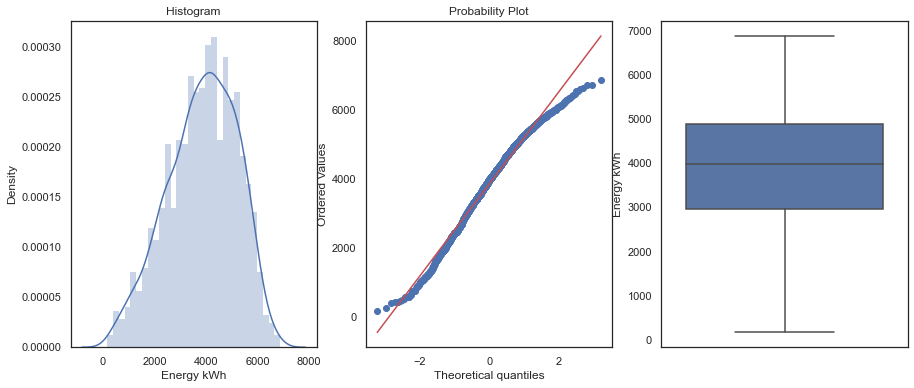

Number of outliers in Energy kWh: 0


In [56]:
#outlier detection
diagnostic_plots(df_irr, 'Energy kWh')

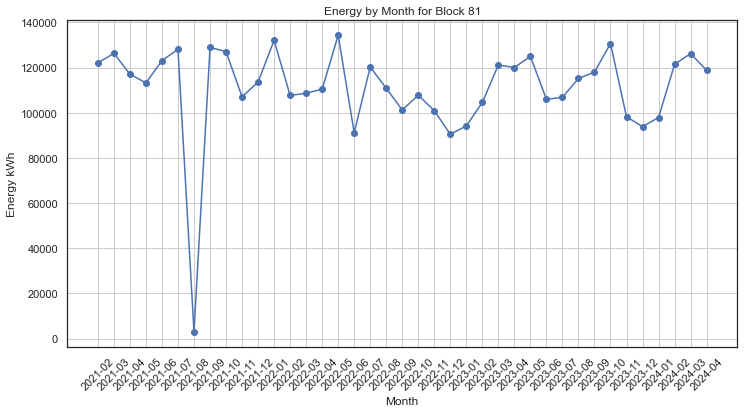

In [57]:
# Energy generated per block by month
irr_grouped = df_irr.groupby(['Month', 'block'])['Energy kWh'].sum().unstack()

# Plot individual line charts for each block
for block in irr_grouped.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(irr_grouped.index, irr_grouped[block], marker='o')
    plt.title(f'Energy by Month for Block {block}')
    plt.xlabel('Month')
    plt.ylabel('Energy kWh')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.show()

In [58]:
#Cleaning
# check for missng value 
df_irr.isnull().sum()
df_irr.isnull().mean()

Date and Time    0.0
Location Code    0.0
Energy kWh       0.0
Month            0.0
block            0.0
dtype: float64

### Estate office Hourly data 

In [59]:
#combining files

hr_dpm23_11 = pd.read_excel('Estate Office Hourly Data/DPM/Energy_01Nov2023_To_30Nov2023__DPM20240523181813.xlsx')
hr_dpm23_12 = pd.read_excel('Estate Office Hourly Data/DPM/Energy_01Dec2023_To_31Dec2023__DPM20240523182406.xlsx')
hr_dpm24_01 = pd.read_excel('Estate Office Hourly Data/DPM/Energy_01Jan2024_To_31Jan2024__DPM20240523182518.xlsx')
hr_dpm24_02 = pd.read_excel('Estate Office Hourly Data/DPM/Energy_01Feb2024_To_29Feb2024__DPM20240523182626.xlsx')
hr_dpm24_03 = pd.read_excel('Estate Office Hourly Data/DPM/Energy_01Mar2024_To_31Mar2024__DPM20240523182805.xlsx')
hr_dpm24_04 = pd.read_excel('Estate Office Hourly Data/DPM/Energy_01Apr2024_To_30Apr2024__DPM20240523182914.xlsx')

hr_inv23_11 = pd.read_excel('Estate Office Hourly Data/INV/Energy_01Nov2023_To_30Nov2023__INV20240523183448.xlsx')
hr_inv23_12 = pd.read_excel('Estate Office Hourly Data/INV/Energy_01Dec2023_To_31Dec2023__INV20240523183536.xlsx')
hr_inv24_01 = pd.read_excel('Estate Office Hourly Data/INV/Energy_01Jan2024_To_31Jan2024__INV20240523183639.xlsx')
hr_inv24_02 = pd.read_excel('Estate Office Hourly Data/INV/Energy_01Feb2024_To_29Feb2024__INV20240523183742.xlsx')
hr_inv24_03 = pd.read_excel('Estate Office Hourly Data/INV/Energy_01Mar2024_To_31Mar2024__INV20240523183831.xlsx')
hr_inv24_04 = pd.read_excel('Estate Office Hourly Data/INV/Energy_01Apr2024_To_30Apr2024__INV20240523183903.xlsx')

hr_irr23_11 = pd.read_excel('Estate Office Hourly Data/IRR/Energy_01Nov2023_To_30Nov2023__IRR20240523184005.xlsx')
hr_irr23_12 = pd.read_excel('Estate Office Hourly Data/IRR/Energy_01Dec2023_To_31Dec2023__IRR20240523184103.xlsx')
hr_irr24_01 = pd.read_excel('Estate Office Hourly Data/IRR/Energy_01Jan2024_To_31Jan2024__IRR20240523184138.xlsx')
hr_irr24_02 = pd.read_excel('Estate Office Hourly Data/IRR/Energy_01Feb2024_To_29Feb2024__IRR20240523184229.xlsx')
hr_irr24_03 = pd.read_excel('Estate Office Hourly Data/IRR/Energy_01Mar2024_To_31Mar2024__IRR20240523184304.xlsx')
hr_irr24_04 = pd.read_excel('Estate Office Hourly Data/IRR/Energy_01Apr2024_To_30Apr2024__IRR20240523184354.xlsx')

# Create lists of DataFrames
dpm_hrly_list = [hr_dpm23_11, hr_dpm23_12, hr_dpm24_01, hr_dpm24_02, hr_dpm24_03, hr_dpm24_04]
inv_hrly_list = [hr_inv23_11, hr_inv23_12, hr_inv24_01, hr_inv24_02, hr_inv24_03, hr_inv24_04]
irr_hrly_list = [hr_irr23_11, hr_irr23_12, hr_irr24_01, hr_irr24_02, hr_irr24_03, hr_irr24_04]

# Concatenate DataFrames
dpm_hrly = pd.concat(dpm_hrly_list, axis=0)
inv_hrly = pd.concat(inv_hrly_list, axis=0)
irr_hrly = pd.concat(irr_hrly_list, axis=0)

In [60]:
# Exploring dpm
dpm_hrly

Date and Time     Location Code  IRR Value W/m²  Energy kWh  \
0    2023-11-01 01:00:00  SN2-NAP72-599489           0.000        0.00   
1    2023-11-01 02:00:00  SN2-NAP72-599489           0.000        0.00   
2    2023-11-01 03:00:00  SN2-NAP72-599489           0.000        0.00   
3    2023-11-01 04:00:00  SN2-NAP72-599489           0.167        0.00   
4    2023-11-01 05:00:00  SN2-NAP72-599489           0.000        0.00   
...                  ...               ...             ...         ...   
8603 2024-04-29 17:00:00  SN2-NAP58-599489         511.883       31.36   
8604 2024-04-29 18:00:00  SN2-NAP58-599489         120.600        8.41   
8605 2024-04-29 19:00:00  SN2-NAP58-599489          13.900        0.84   
8606 2024-04-29 20:00:00  SN2-NAP58-599489           0.000        0.00   
8607 2024-04-29 21:00:00  SN2-NAP58-599489           0.000        0.00   

      Expected Value kWh   PR %      Sensor ID Sensor Type  Energy Generation  
0                   0.00   0.00  DPM-599489-01         DPM               0.00  
1                   0.00   0.00  DPM-599489-01         DPM               0.00  
2                   0.00   0.00  DPM-599489-01         DPM               0.00  
3                   0.01   0.00  DPM-599489-01         DPM               0.00  
4                   0.00   0.00  DPM-599489-01         DPM               0.00  
...                  ...    ...            ...         ...                ...  
8603               35.44  88.49  DPM-599489-16         DPM              31.36  
8604                8.35  89.99  DPM-599489-16         DPM               8.41  
8605                0.96  87.50  DPM-599489-16         DPM               0.84  
8606                0.00   0.00  DPM-599489-16         DPM               0.00  
8607                0.00   0.00  DPM-599489-16         DPM               0.00  

[57741 rows x 9 columns]

In [61]:
dpm_hrly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57741 entries, 0 to 8607
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date and Time       57741 non-null  datetime64[ns]
 1   Location Code       57741 non-null  object        
 2   IRR Value W/m²      57741 non-null  float64       
 3   Energy kWh          57741 non-null  float64       
 4   Expected Value kWh  57741 non-null  float64       
 5   PR %                57741 non-null  float64       
 6   Sensor ID           57741 non-null  object        
 7   Sensor Type         57741 non-null  object        
 8   Energy Generation   57741 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 4.4+ MB


In [62]:
dpm_hrly.describe()

IRR Value W/m²     Energy kWh  Expected Value kWh         PR %  \
count    57741.000000   57741.000000        57741.000000  57741.00000   
mean       169.549287      18.030184           13.146774     48.51740   
std        245.347387    1573.226641           21.230422     42.15639   
min          0.000000       0.000000            0.000000      0.00000   
25%          0.000000       0.000000            0.000000      0.00000   
50%         21.117000       1.420000            1.410000     75.82000   
75%        292.850000      17.580000           19.100000     89.99000   
max       1036.217000  378008.350000          152.890000     90.00000   

       Energy Generation  
count       57741.000000  
mean           18.030184  
std          1573.226641  
min             0.000000  
25%             0.000000  
50%             1.420000  
75%            17.580000  
max        378008.350000

In [63]:
dpm_hrly['block'] = dpm_hrly['Location Code'].str[7:9]
dpm_hrly

Date and Time     Location Code  IRR Value W/m²  Energy kWh  \
0    2023-11-01 01:00:00  SN2-NAP72-599489           0.000        0.00   
1    2023-11-01 02:00:00  SN2-NAP72-599489           0.000        0.00   
2    2023-11-01 03:00:00  SN2-NAP72-599489           0.000        0.00   
3    2023-11-01 04:00:00  SN2-NAP72-599489           0.167        0.00   
4    2023-11-01 05:00:00  SN2-NAP72-599489           0.000        0.00   
...                  ...               ...             ...         ...   
8603 2024-04-29 17:00:00  SN2-NAP58-599489         511.883       31.36   
8604 2024-04-29 18:00:00  SN2-NAP58-599489         120.600        8.41   
8605 2024-04-29 19:00:00  SN2-NAP58-599489          13.900        0.84   
8606 2024-04-29 20:00:00  SN2-NAP58-599489           0.000        0.00   
8607 2024-04-29 21:00:00  SN2-NAP58-599489           0.000        0.00   

      Expected Value kWh   PR %      Sensor ID Sensor Type  Energy Generation  \
0                   0.00   0.00  DPM-599489-01         DPM               0.00   
1                   0.00   0.00  DPM-599489-01         DPM               0.00   
2                   0.00   0.00  DPM-599489-01         DPM               0.00   
3                   0.01   0.00  DPM-599489-01         DPM               0.00   
4                   0.00   0.00  DPM-599489-01         DPM               0.00   
...                  ...    ...            ...         ...                ...   
8603               35.44  88.49  DPM-599489-16         DPM              31.36   
8604                8.35  89.99  DPM-599489-16         DPM               8.41   
8605                0.96  87.50  DPM-599489-16         DPM               0.84   
8606                0.00   0.00  DPM-599489-16         DPM               0.00   
8607                0.00   0.00  DPM-599489-16         DPM               0.00   

     block  
0       72  
1       72  
2       72  
3       72  
4       72  
...    ...  
8603    58  
8604    58  
8605    58  
8606    58  
8607    58  

[57741 rows x 10 columns]

Number of PR % values less than 80%: 31778


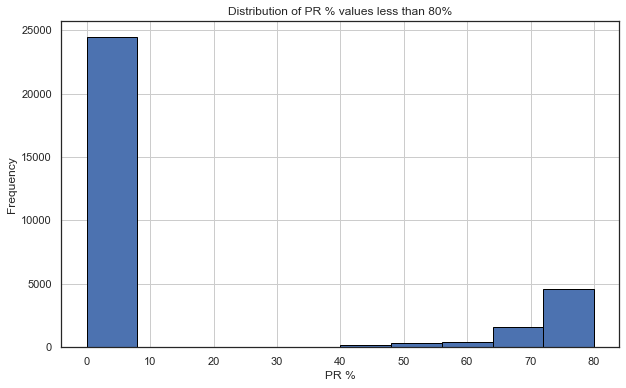

In [64]:
#PR < 80% means bad weather condition 
# Filter rows where PR % is less than 80
pr_less_than_80 = dpm_hrly[dpm_hrly['PR %'] < 80]

# Display the count
print("Number of PR % values less than 80%:", len(pr_less_than_80))

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(pr_less_than_80['PR %'], bins=10, edgecolor='black')
plt.title('Distribution of PR % values less than 80%')
plt.xlabel('PR %')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

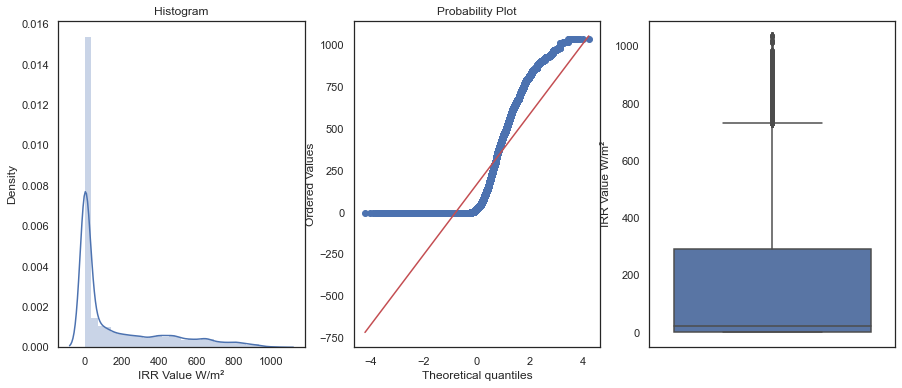

Number of outliers in IRR Value W/m²: 2620


In [65]:
diagnostic_plots(dpm_hrly, 'IRR Value W/m²')

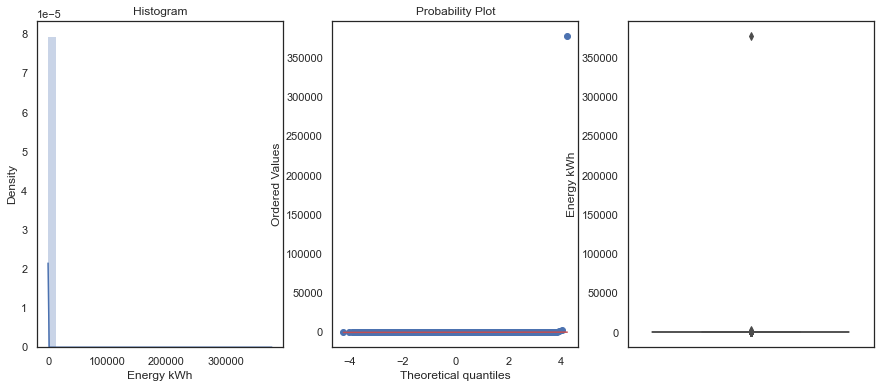

Number of outliers in Energy kWh: 4043


In [66]:
diagnostic_plots(dpm_hrly, 'Energy kWh')

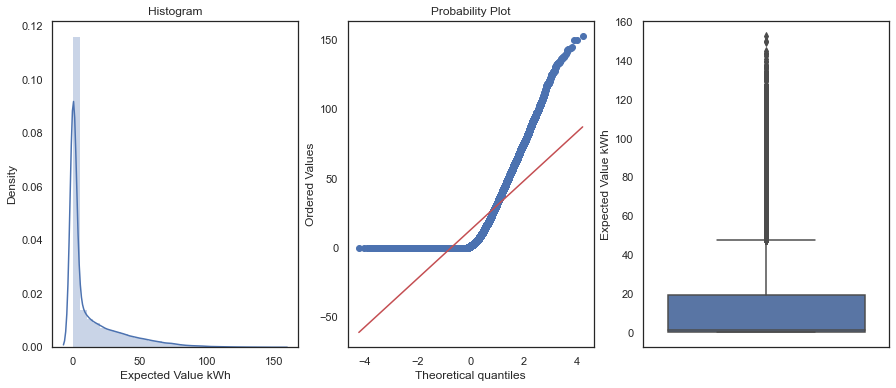

Number of outliers in Expected Value kWh: 5023


In [67]:
diagnostic_plots(dpm_hrly, 'Expected Value kWh')

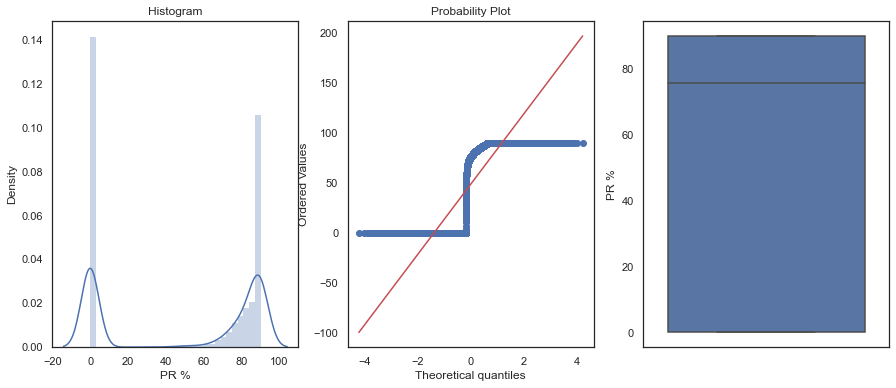

Number of outliers in PR %: 0


In [68]:
diagnostic_plots(dpm_hrly, 'PR %')

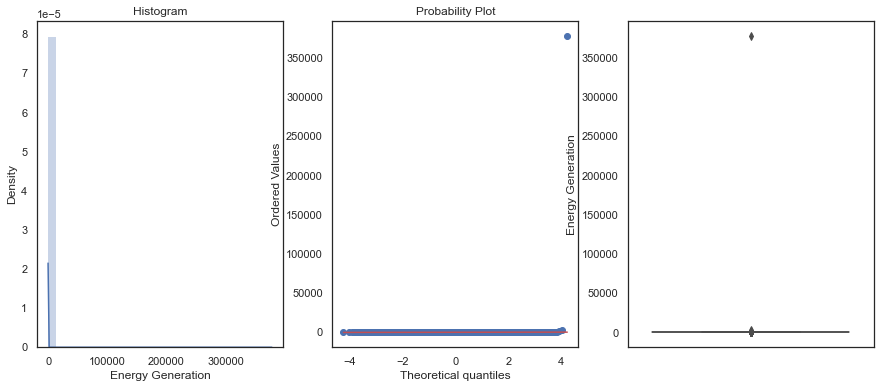

Number of outliers in Energy Generation: 4043


In [69]:
diagnostic_plots(dpm_hrly, 'Energy Generation')

In [70]:
## Extract 'Time', 'Month', and 'Year' from the 'Date and Time' column
#dpm_hrly['Time'] = dpm_hrly['Date and Time'].dt.strftime('%H:%M:%S')
#dpm_hrly['Month'] = dpm_hrly['Date and Time'].dt.strftime('%Y-%m')
#
## Group by 'Time', 'Month', and 'Year', and sum the 'Energy kWh'
#grouped_energy = dpm_hrly.groupby(['Time', 'Month'])['Energy kWh'].sum().unstack()
#
## Plot individual line charts for each month
#for month in grouped_energy.columns:
#    plt.figure(figsize=(12, 6))
#    plt.plot(grouped_energy.index, grouped_energy[month], marker='o')
#    plt.title(f'Energy by Time for {month}')
#    plt.xlabel('Time')
#    plt.ylabel('Energy kWh')
#    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
#    plt.grid(True)
#    plt.show()

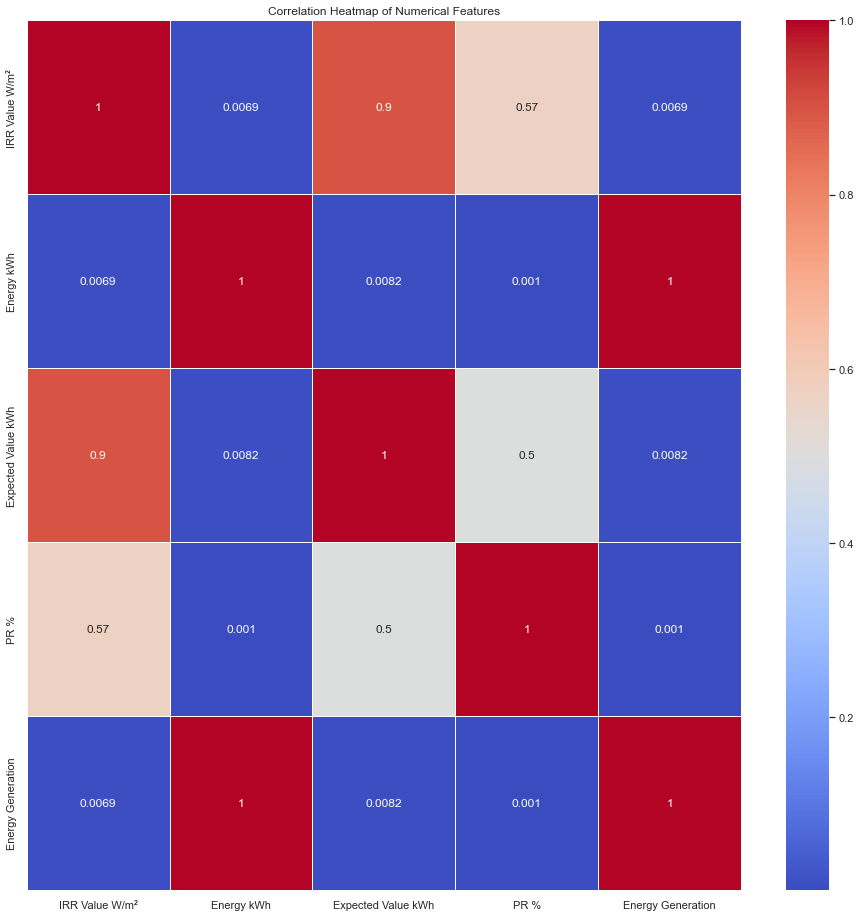

In [71]:
dpm_hrly_num = dpm_hrly.select_dtypes(include=['float64', 'int64']).copy()

# Compute the correlation matrix
correlation_matrix = dpm_hrly_num.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 16))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

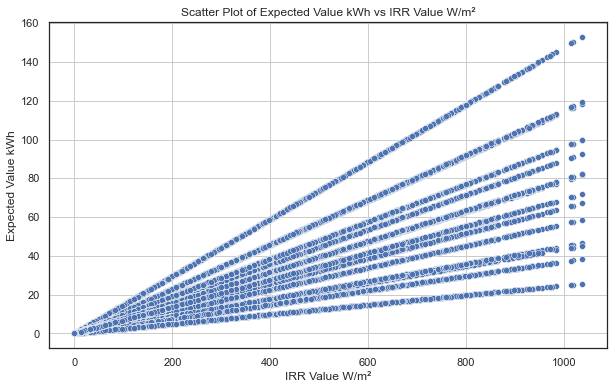

In [72]:
#Exploring high correlation variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IRR Value W/m²', y='Expected Value kWh', data=dpm_hrly)
plt.title('Scatter Plot of Expected Value kWh vs IRR Value W/m²')
plt.xlabel('IRR Value W/m²')
plt.ylabel('Expected Value kWh')
plt.grid(True)
plt.show()

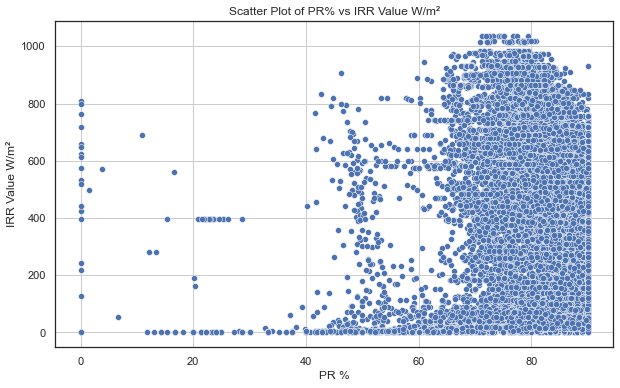

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PR %', y='IRR Value W/m²', data=dpm_hrly)
plt.title('Scatter Plot of PR% vs IRR Value W/m²')
plt.xlabel('PR %')
plt.ylabel('IRR Value W/m²')
plt.grid(True)
plt.show()

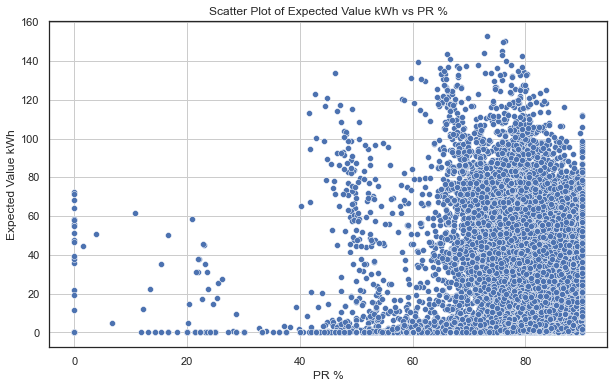

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PR %', y='Expected Value kWh', data=dpm_hrly)
plt.title('Scatter Plot of Expected Value kWh vs PR %')
plt.xlabel('PR %')
plt.ylabel('Expected Value kWh')
plt.grid(True)
plt.show()

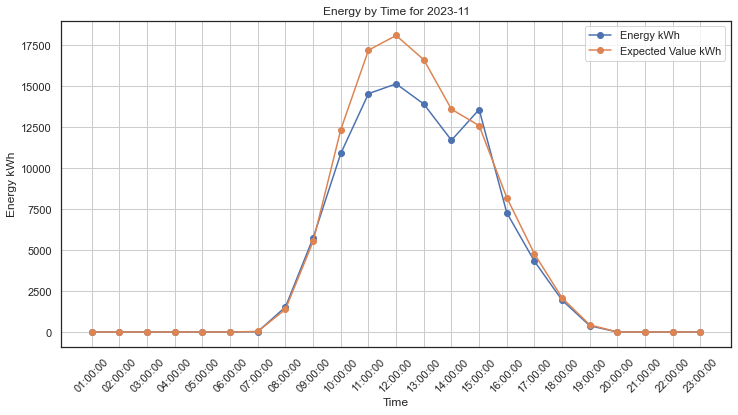

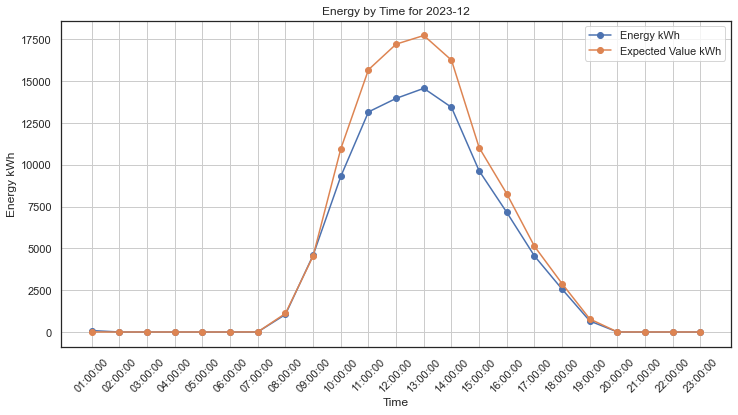

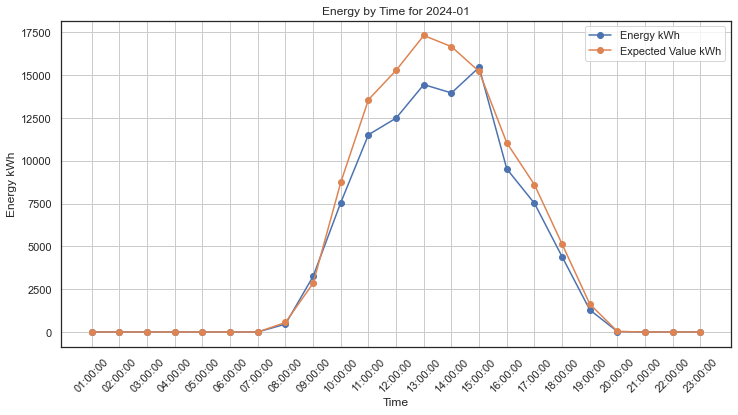

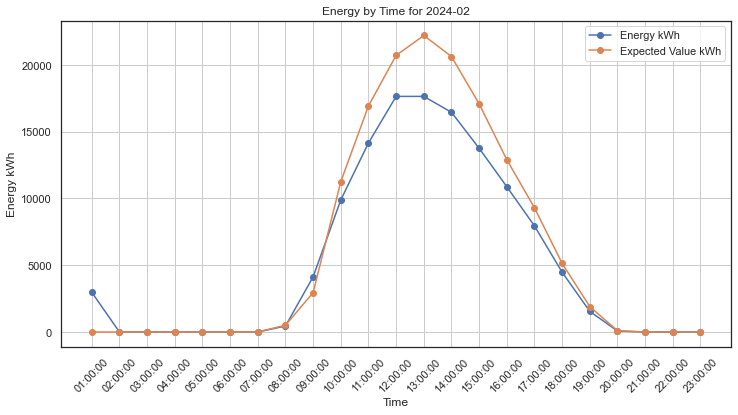

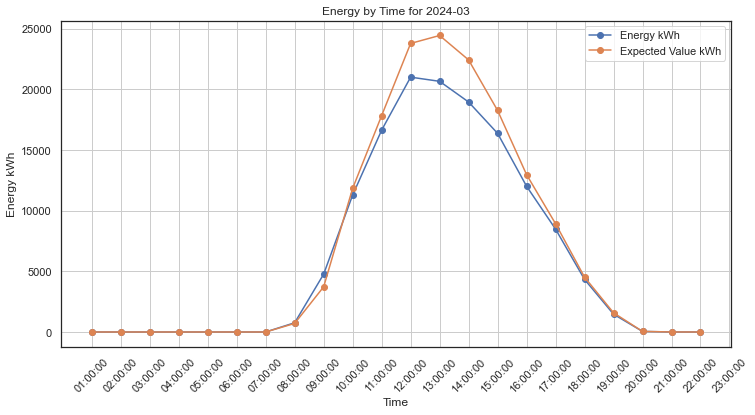

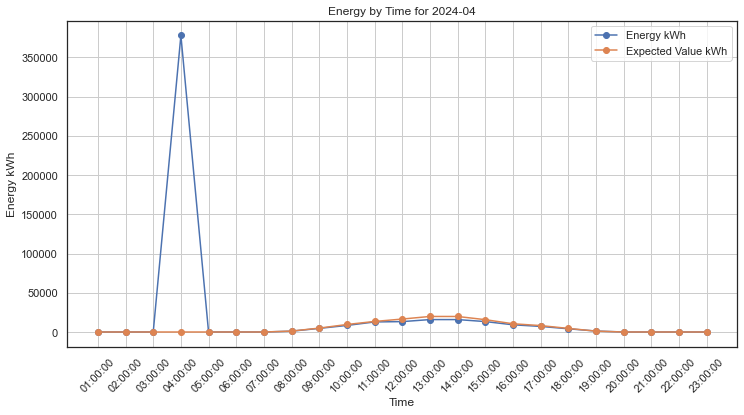

In [75]:
# Extract 'Time', 'Month', and 'Year' from the 'Date and Time' column
dpm_hrly['Time'] = dpm_hrly['Date and Time'].dt.strftime('%H:%M:%S')
dpm_hrly['Month'] = dpm_hrly['Date and Time'].dt.strftime('%Y-%m')

# Group by 'Time', 'Month', and 'Year', and sum the 'Energy kWh' and 'Expected Value kWh'
grouped_energy = dpm_hrly.groupby(['Time', 'Month'])[['Energy kWh', 'Expected Value kWh']].sum().unstack()

# Plot individual line charts for each month
for month in grouped_energy.columns.levels[1]:
    plt.figure(figsize=(12, 6))
    plt.plot(grouped_energy.index, grouped_energy['Energy kWh', month], marker='o', label='Energy kWh')
    plt.plot(grouped_energy.index, grouped_energy['Expected Value kWh', month], marker='o', label='Expected Value kWh')
    plt.title(f'Energy by Time for {month}')
    plt.xlabel('Time')
    plt.ylabel('Energy kWh')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend()  # Show legend
    plt.grid(True)
    plt.show()

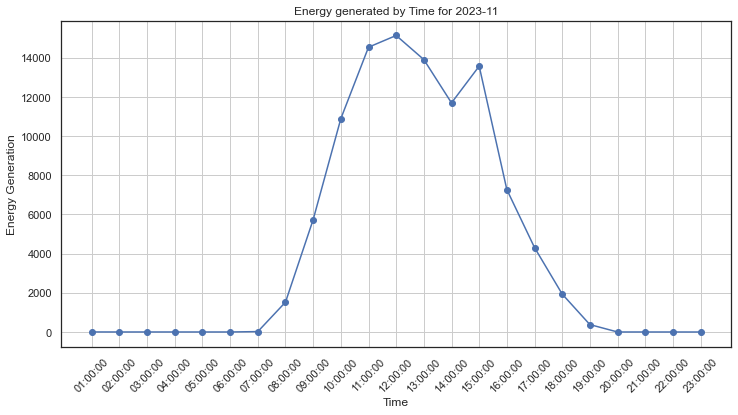

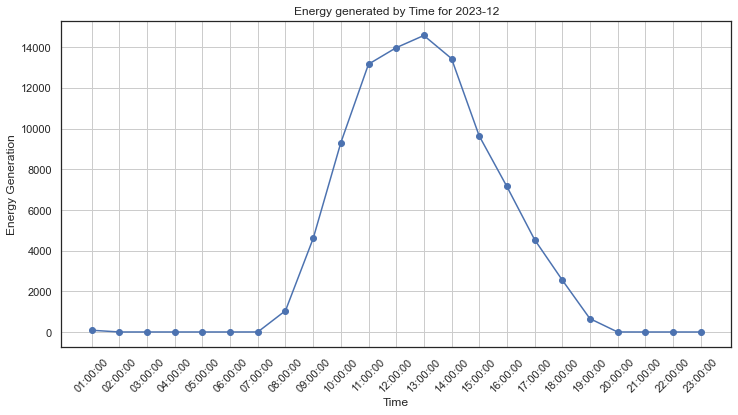

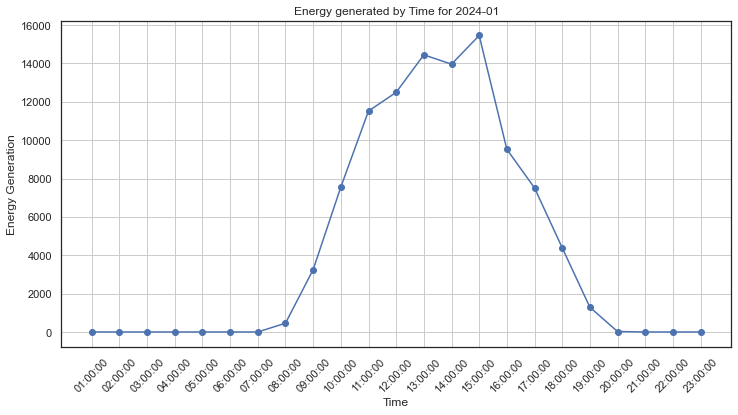

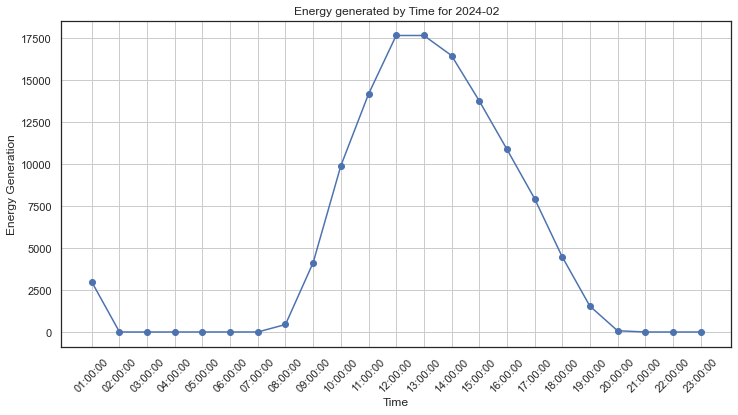

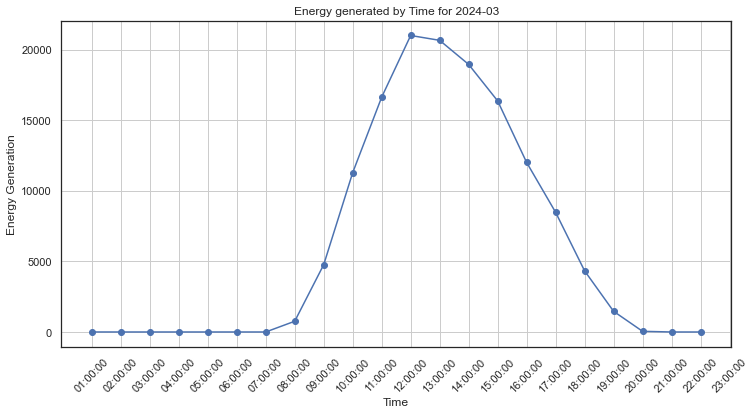

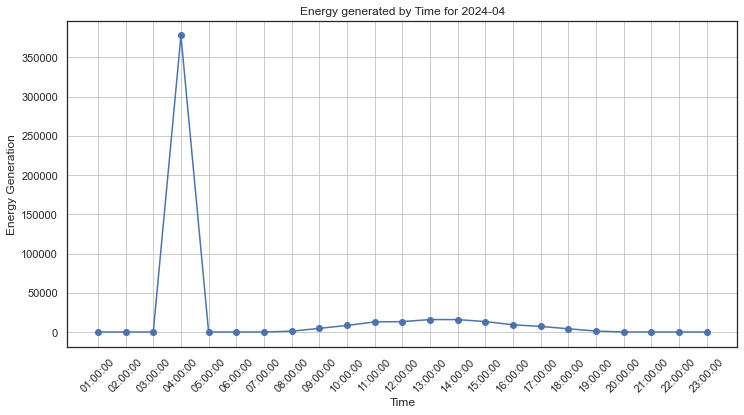

In [76]:
# Group by 'Time', 'Month', and 'Year', and sum the 'Energy kWh'
grouped_generated = dpm_hrly.groupby(['Time', 'Month'])['Energy Generation'].sum().unstack()

# Plot individual line charts for each month
for month in grouped_generated.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(grouped_generated.index, grouped_generated[month], marker='o')
    plt.title(f'Energy generated by Time for {month}')
    plt.xlabel('Time')
    plt.ylabel('Energy Generation')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.show()

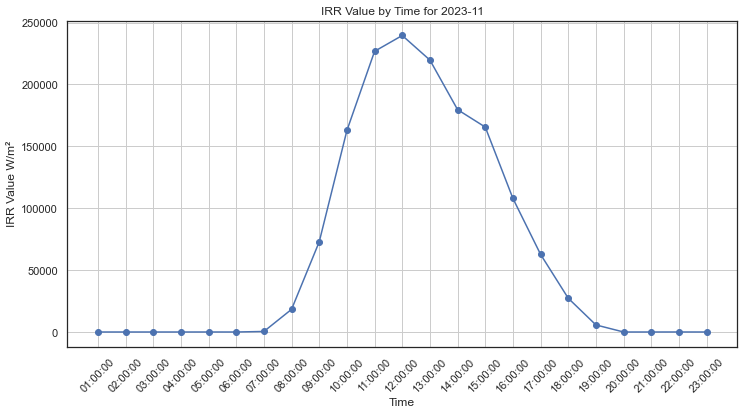

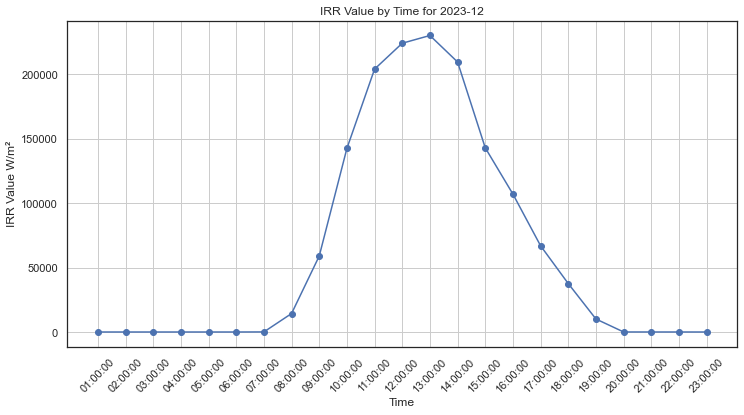

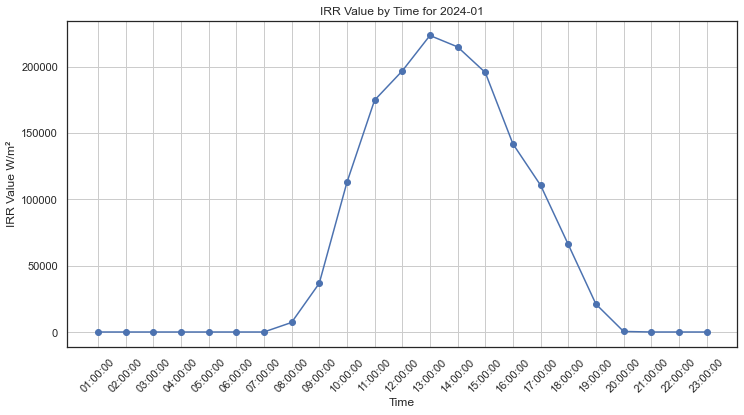

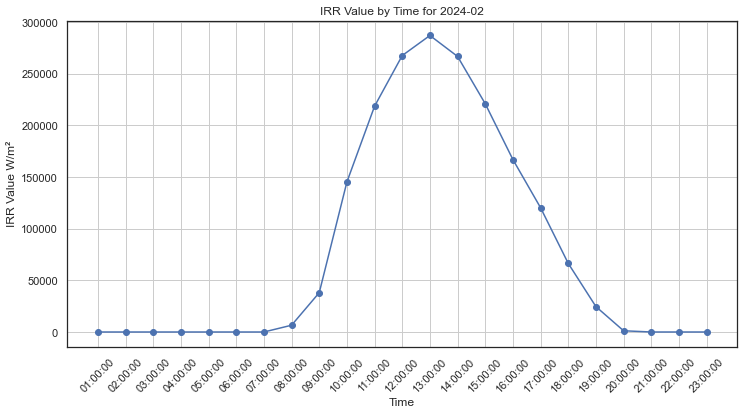

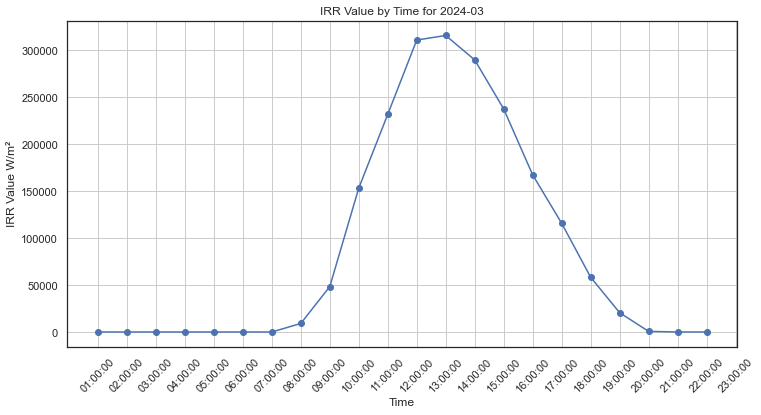

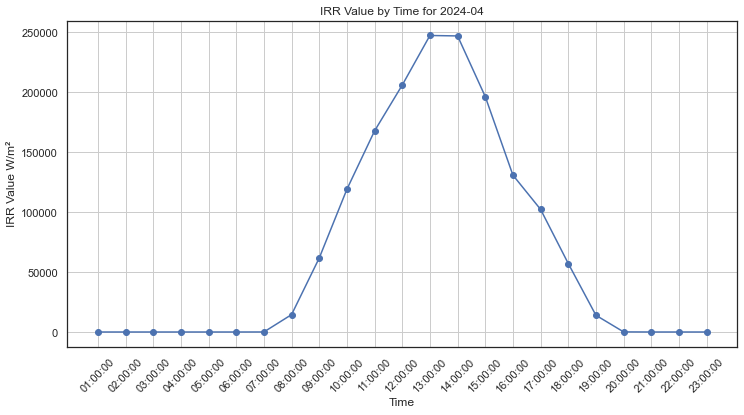

In [77]:
# Group by 'Time', 'Month', and 'Year', and sum the 'Energy kWh'
grouped_irr = dpm_hrly.groupby(['Time', 'Month'])['IRR Value W/m²'].sum().unstack()

# Plot individual line charts for each month
for month in grouped_irr.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(grouped_irr.index, grouped_irr[month], marker='o')
    plt.title(f'IRR Value by Time for {month}')
    plt.xlabel('Time')
    plt.ylabel('IRR Value W/m²')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.show()

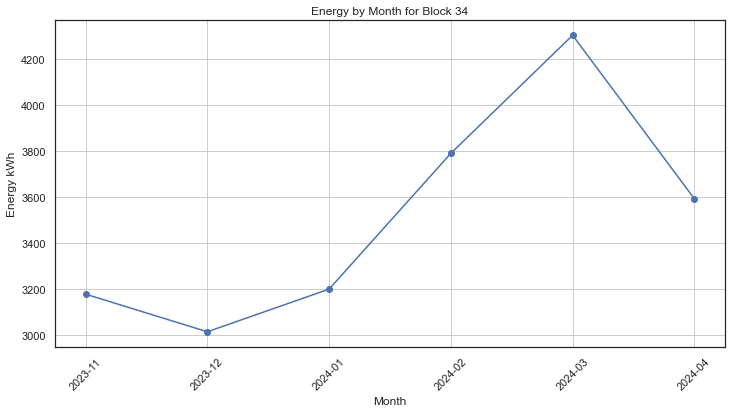

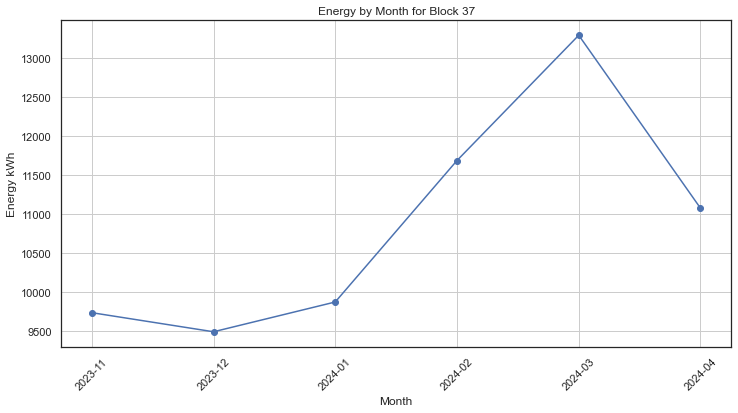

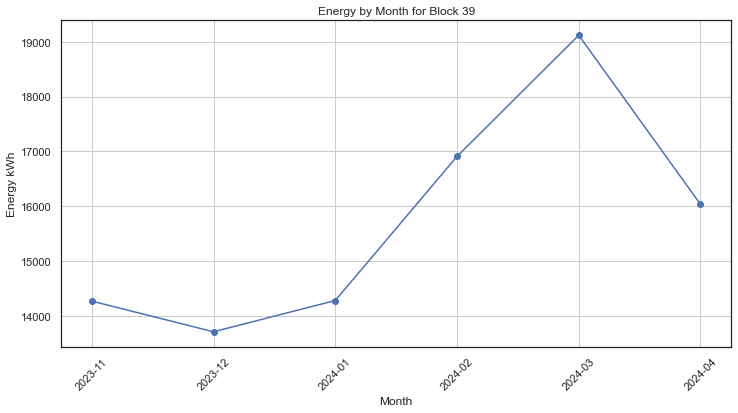

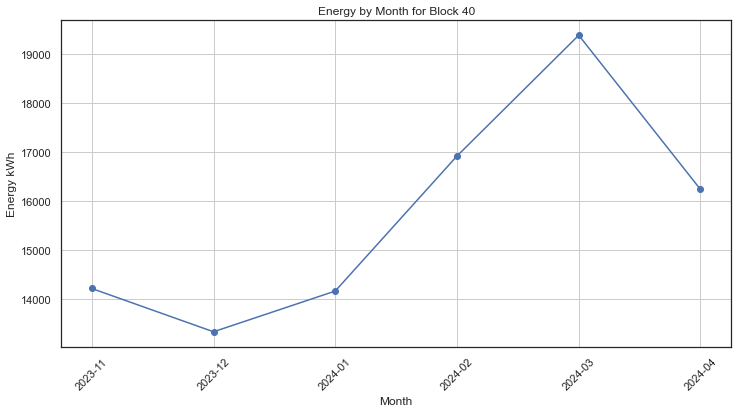

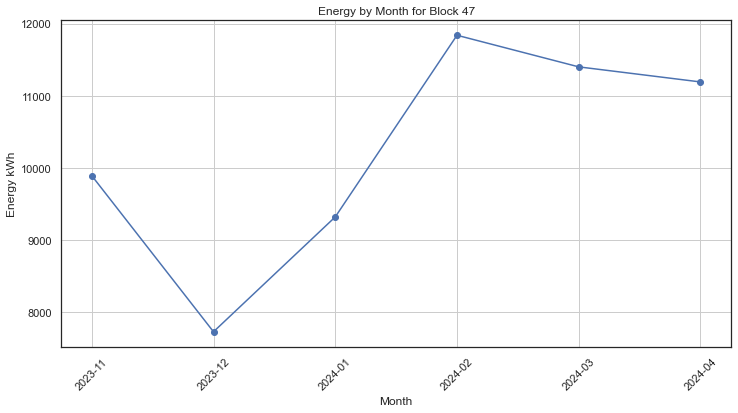

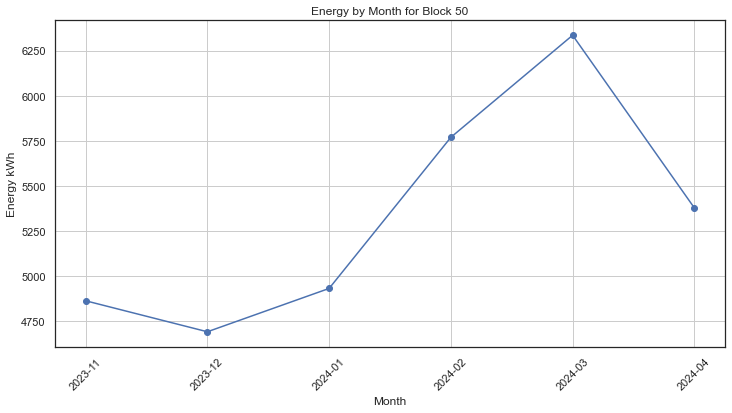

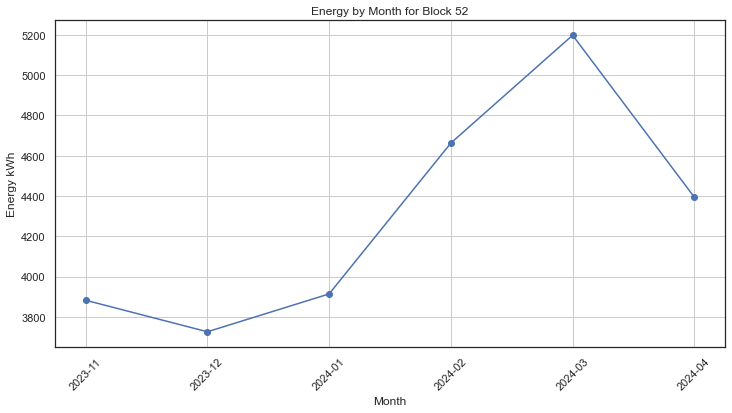

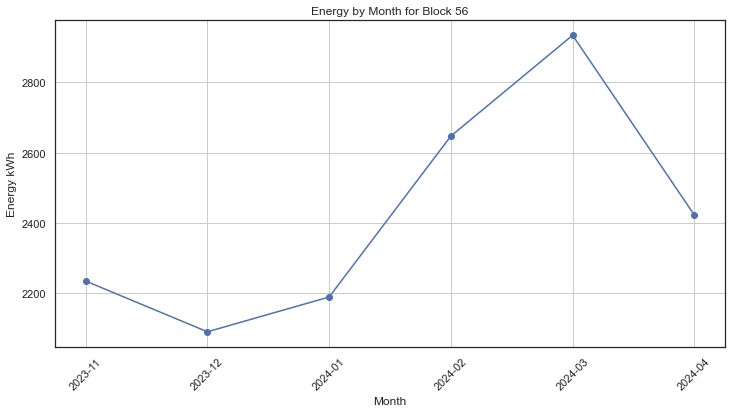

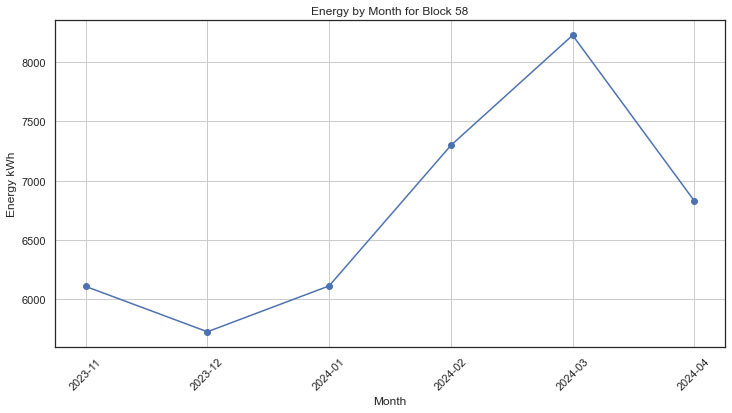

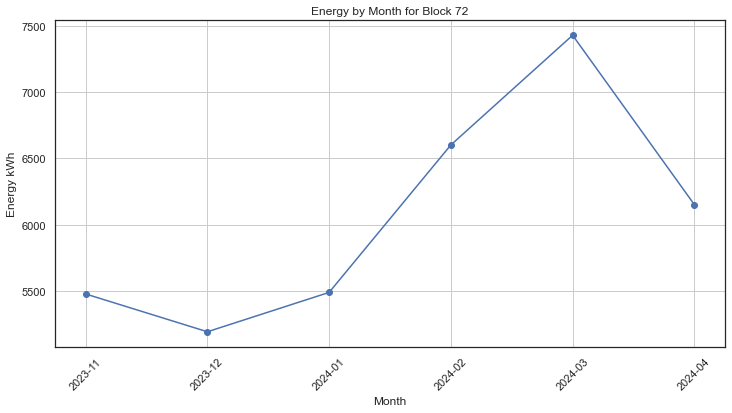

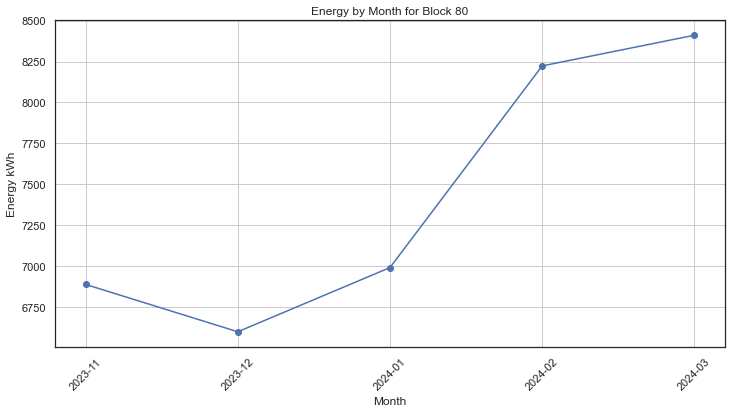

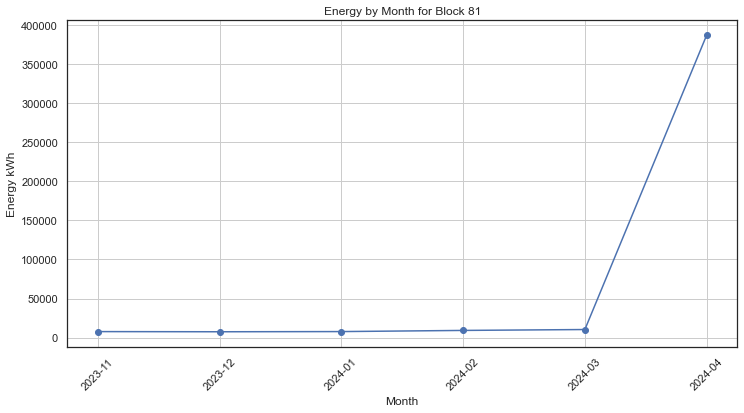

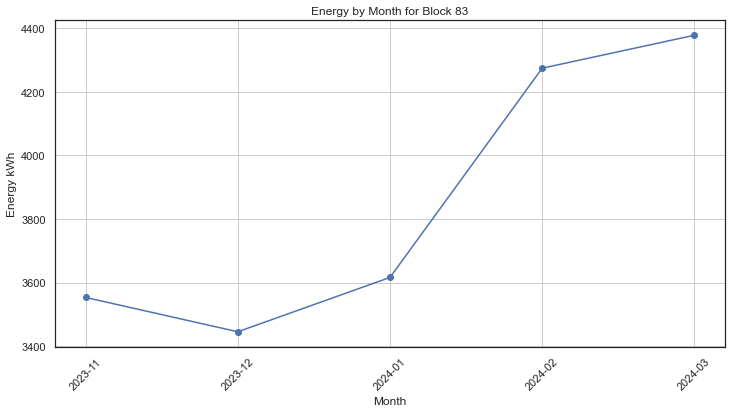

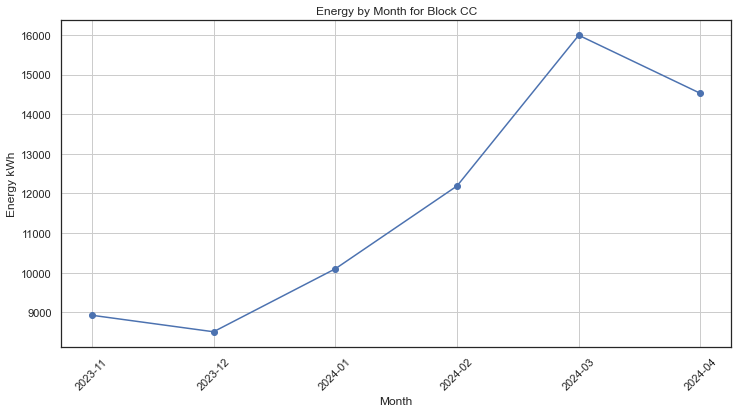

In [78]:
# Energy generated per block by month
energy_per_block = dpm_hrly.groupby(['Month', 'block'])['Energy kWh'].sum().unstack()

# Plot individual line charts for each block
for block in energy_per_block.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(energy_per_block.index, energy_per_block[block], marker='o')
    plt.title(f'Energy by Month for Block {block}')
    plt.xlabel('Month')
    plt.ylabel('Energy kWh')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.show()

In [79]:
#cleaning 
# check for missng value 
dpm_hrly.isnull().sum()
dpm_hrly.isnull().mean()

Date and Time         0.0
Location Code         0.0
IRR Value W/m²        0.0
Energy kWh            0.0
Expected Value kWh    0.0
PR %                  0.0
Sensor ID             0.0
Sensor Type           0.0
Energy Generation     0.0
block                 0.0
Time                  0.0
Month                 0.0
dtype: float64

In [80]:
def cap_to_2_decimals(x):
    return float(f"{x:.2f}".rstrip('0').rstrip('.'))

#calculating for PR % 
((((dpm_hrly['Energy kWh'] / dpm_hrly['Expected Value kWh']) * 100).apply(cap_to_2_decimals)==dpm_hrly['PR %'])).value_counts()


# exploring those that does not match
temp=dpm_hrly.copy()
temp['match'] = ((((dpm_hrly['Energy kWh'] / dpm_hrly['Expected Value kWh']) * 100).apply(cap_to_2_decimals)==dpm_hrly['PR %']))
temp = temp[temp['match']==False]
temp.head(40)

Date and Time     Location Code  IRR Value W/m²  Energy kWh  \
0  2023-11-01 01:00:00  SN2-NAP72-599489           0.000        0.00   
1  2023-11-01 02:00:00  SN2-NAP72-599489           0.000        0.00   
2  2023-11-01 03:00:00  SN2-NAP72-599489           0.000        0.00   
4  2023-11-01 05:00:00  SN2-NAP72-599489           0.000        0.00   
5  2023-11-01 06:00:00  SN2-NAP72-599489           0.000        0.00   
7  2023-11-01 08:00:00  SN2-NAP72-599489          43.133        3.84   
8  2023-11-01 09:00:00  SN2-NAP72-599489         208.133       15.98   
9  2023-11-01 10:00:00  SN2-NAP72-599489         452.567       27.76   
10 2023-11-01 11:00:00  SN2-NAP72-599489         514.883       33.15   
17 2023-11-01 18:00:00  SN2-NAP72-599489          86.183        5.23   
19 2023-11-01 20:00:00  SN2-NAP72-599489           0.000        0.00   
20 2023-11-02 01:00:00  SN2-NAP72-599489           0.000        0.00   
21 2023-11-02 02:00:00  SN2-NAP72-599489           0.000        0.00   
22 2023-11-02 03:00:00  SN2-NAP72-599489           0.000        0.00   
23 2023-11-02 04:00:00  SN2-NAP72-599489           0.000        0.00   
24 2023-11-02 05:00:00  SN2-NAP72-599489           0.000        0.00   
25 2023-11-02 06:00:00  SN2-NAP72-599489           0.000        0.00   
27 2023-11-02 08:00:00  SN2-NAP72-599489          47.200        3.39   
28 2023-11-02 09:00:00  SN2-NAP72-599489         200.833       14.16   
29 2023-11-02 10:00:00  SN2-NAP72-599489         405.050       24.79   
31 2023-11-02 12:00:00  SN2-NAP72-599489         515.167       33.66   
33 2023-11-02 14:00:00  SN2-NAP72-599489         476.050       28.17   
38 2023-11-02 19:00:00  SN2-NAP72-599489          16.467        1.02   
39 2023-11-02 20:00:00  SN2-NAP72-599489           0.000        0.00   
40 2023-11-02 21:00:00  SN2-NAP72-599489           0.000        0.00   
41 2023-11-03 01:00:00  SN2-NAP72-599489           0.000        0.00   
42 2023-11-03 02:00:00  SN2-NAP72-599489           0.000        0.00   
43 2023-11-03 03:00:00  SN2-NAP72-599489           0.000        0.00   
44 2023-11-03 04:00:00  SN2-NAP72-599489           0.000        0.00   
45 2023-11-03 05:00:00  SN2-NAP72-599489           0.000        0.00   
46 2023-11-03 06:00:00  SN2-NAP72-599489           0.000        0.00   
48 2023-11-03 08:00:00  SN2-NAP72-599489          37.417        3.15   
49 2023-11-03 09:00:00  SN2-NAP72-599489         194.233       14.88   
50 2023-11-03 10:00:00  SN2-NAP72-599489         485.767       28.98   
52 2023-11-03 12:00:00  SN2-NAP72-599489         475.050       31.62   
58 2023-11-03 18:00:00  SN2-NAP72-599489          81.017        4.75   
59 2023-11-03 19:00:00  SN2-NAP72-599489          14.133        0.83   
60 2023-11-03 20:00:00  SN2-NAP72-599489           0.000        0.00   
61 2023-11-03 21:00:00  SN2-NAP72-599489           0.000        0.00   
62 2023-11-03 22:00:00  SN2-NAP72-599489           0.000        0.00   

    Expected Value kWh   PR %      Sensor ID Sensor Type  Energy Generation  \
0                 0.00   0.00  DPM-599489-01         DPM               0.00   
1                 0.00   0.00  DPM-599489-01         DPM               0.00   
2                 0.00   0.00  DPM-599489-01         DPM               0.00   
4                 0.00   0.00  DPM-599489-01         DPM               0.00   
5                 0.00   0.00  DPM-599489-01         DPM               0.00   
7                 2.79  89.99  DPM-599489-01         DPM               3.84   
8                13.46  89.99  DPM-599489-01         DPM              15.98   
9                29.27  89.99  DPM-599489-01         DPM              27.76   
10               33.30  89.99  DPM-599489-01         DPM              33.15   
17                5.57  89.99  DPM-599489-01         DPM               5.23   
19                0.00   0.00  DPM-599489-01         DPM               0.00   
20                0.00   0.00  DPM-599489-01         DPM               0.00   
21                0.00   0.00

In [81]:
# Replace 0 values in 'PR %' column with 80
dpm_hrly['PR %'] = dpm_hrly['PR %'].replace(0, 80)

#Capping PR% to the range of 70% to 90%
dpm_hrly['PR %'] = np.where(dpm_hrly['PR %'] < 70, 70, dpm_hrly['PR %'])
dpm_hrly['PR %'].min()

70.0

In [82]:
#Dropping Energy generation because it's the same as energy 
dpm_hrly = dpm_hrly.drop(columns=['Energy Generation'])

dpm_hrly

Date and Time     Location Code  IRR Value W/m²  Energy kWh  \
0    2023-11-01 01:00:00  SN2-NAP72-599489           0.000        0.00   
1    2023-11-01 02:00:00  SN2-NAP72-599489           0.000        0.00   
2    2023-11-01 03:00:00  SN2-NAP72-599489           0.000        0.00   
3    2023-11-01 04:00:00  SN2-NAP72-599489           0.167        0.00   
4    2023-11-01 05:00:00  SN2-NAP72-599489           0.000        0.00   
...                  ...               ...             ...         ...   
8603 2024-04-29 17:00:00  SN2-NAP58-599489         511.883       31.36   
8604 2024-04-29 18:00:00  SN2-NAP58-599489         120.600        8.41   
8605 2024-04-29 19:00:00  SN2-NAP58-599489          13.900        0.84   
8606 2024-04-29 20:00:00  SN2-NAP58-599489           0.000        0.00   
8607 2024-04-29 21:00:00  SN2-NAP58-599489           0.000        0.00   

      Expected Value kWh   PR %      Sensor ID Sensor Type block      Time  \
0                   0.00  80.00  DPM-599489-01         DPM    72  01:00:00   
1                   0.00  80.00  DPM-599489-01         DPM    72  02:00:00   
2                   0.00  80.00  DPM-599489-01         DPM    72  03:00:00   
3                   0.01  80.00  DPM-599489-01         DPM    72  04:00:00   
4                   0.00  80.00  DPM-599489-01         DPM    72  05:00:00   
...                  ...    ...            ...         ...   ...       ...   
8603               35.44  88.49  DPM-599489-16         DPM    58  17:00:00   
8604                8.35  89.99  DPM-599489-16         DPM    58  18:00:00   
8605                0.96  87.50  DPM-599489-16         DPM    58  19:00:00   
8606                0.00  80.00  DPM-599489-16         DPM    58  20:00:00   
8607                0.00  80.00  DPM-599489-16         DPM    58  21:00:00   

        Month  
0     2023-11  
1     2023-11  
2     2023-11  
3     2023-11  
4     2023-11  
...       ...  
8603  2024-04  
8604  2024-04  
8605  2024-04  
8606  2024-04  
8607  2024-04  

[57741 rows x 11 columns]

In [83]:
# Exploring inverter
inv_hrly

Date and Time     Location Code  Energy kWh
0    2023-11-01 06:00:00  SN2-NAP50-599489         0.0
1    2023-11-01 06:00:00  SN2-NAPCC-599489         0.0
2    2023-11-01 06:00:00  SN2-NAP52-599489         0.0
3    2023-11-01 06:00:00  SN2-NAP34-599489         0.0
4    2023-11-01 06:00:00  SN2-NAP39-599489         0.0
...                  ...               ...         ...
5654 2024-04-29 21:00:00  SN2-NAP81-599489         0.0
5655 2024-04-29 21:00:00  SN2-NAP50-599489         0.0
5656 2024-04-29 21:00:00  SN2-NAP58-599489         0.0
5657 2024-04-29 21:00:00  SN2-NAP34-599489         0.0
5658 2024-04-29 21:00:00  SN2-NAP40-599489         0.0

[39027 rows x 3 columns]

In [84]:
inv_hrly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39027 entries, 0 to 5658
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date and Time  39027 non-null  datetime64[ns]
 1   Location Code  39027 non-null  object        
 2   Energy kWh     39027 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ MB


In [85]:
inv_hrly.describe()

Energy kWh
count  39027.000000
mean      17.156049
std       23.110252
min        0.000000
25%        0.050000
50%        7.250000
75%       25.850000
max      293.720000

In [86]:
#Extract block
inv_hrly['block'] = inv_hrly['Location Code'].str[7:9]
inv_hrly

Date and Time     Location Code  Energy kWh block
0    2023-11-01 06:00:00  SN2-NAP50-599489         0.0    50
1    2023-11-01 06:00:00  SN2-NAPCC-599489         0.0    CC
2    2023-11-01 06:00:00  SN2-NAP52-599489         0.0    52
3    2023-11-01 06:00:00  SN2-NAP34-599489         0.0    34
4    2023-11-01 06:00:00  SN2-NAP39-599489         0.0    39
...                  ...               ...         ...   ...
5654 2024-04-29 21:00:00  SN2-NAP81-599489         0.0    81
5655 2024-04-29 21:00:00  SN2-NAP50-599489         0.0    50
5656 2024-04-29 21:00:00  SN2-NAP58-599489         0.0    58
5657 2024-04-29 21:00:00  SN2-NAP34-599489         0.0    34
5658 2024-04-29 21:00:00  SN2-NAP40-599489         0.0    40

[39027 rows x 4 columns]

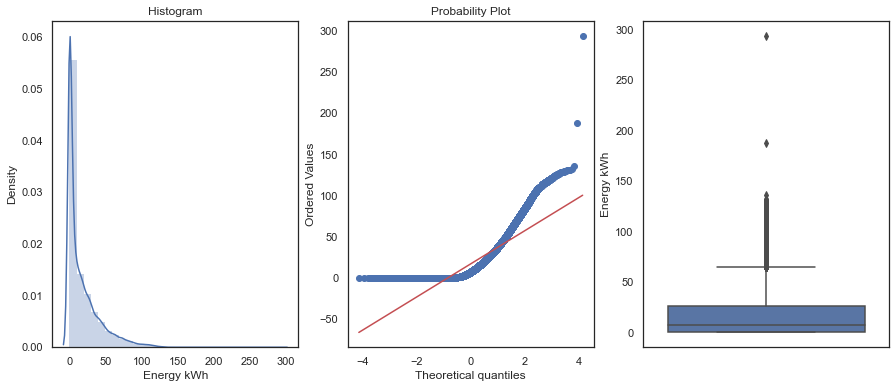

Number of outliers in Energy kWh: 2170


In [87]:
diagnostic_plots(inv_hrly, 'Energy kWh')

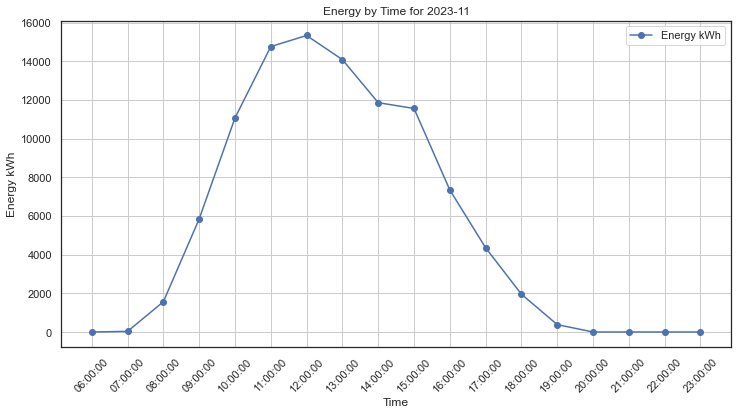

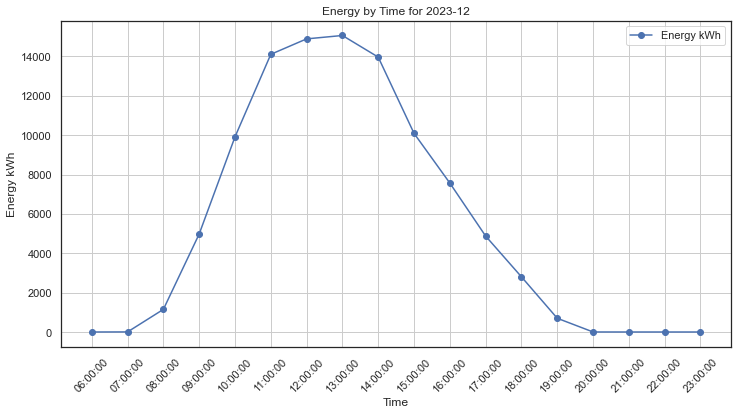

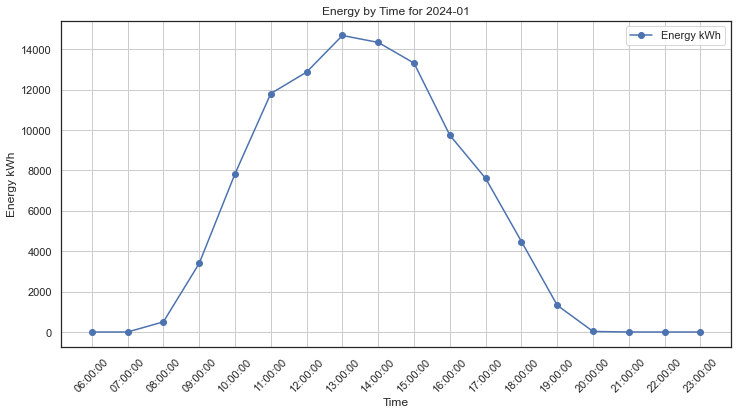

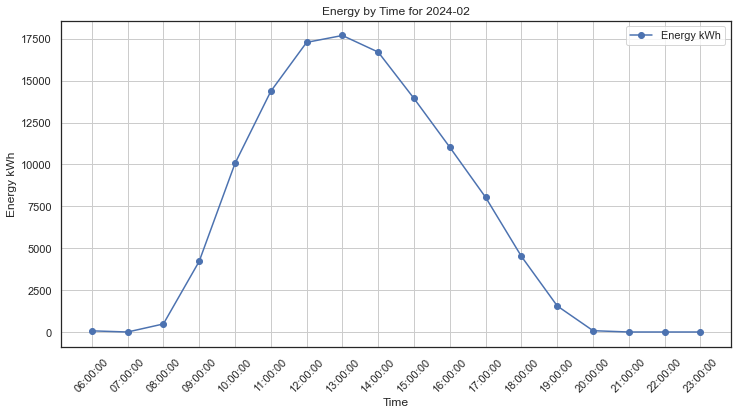

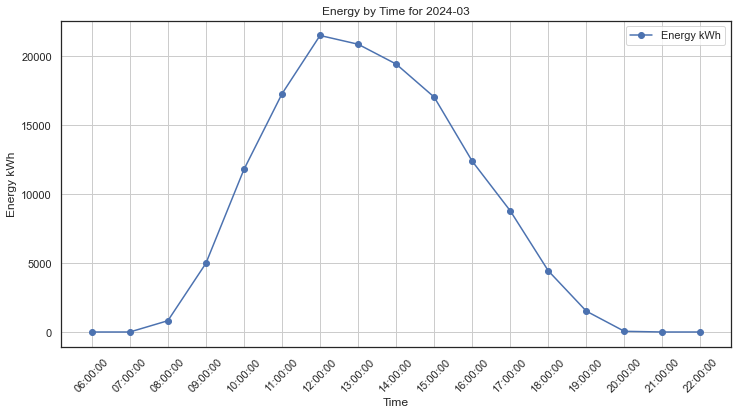

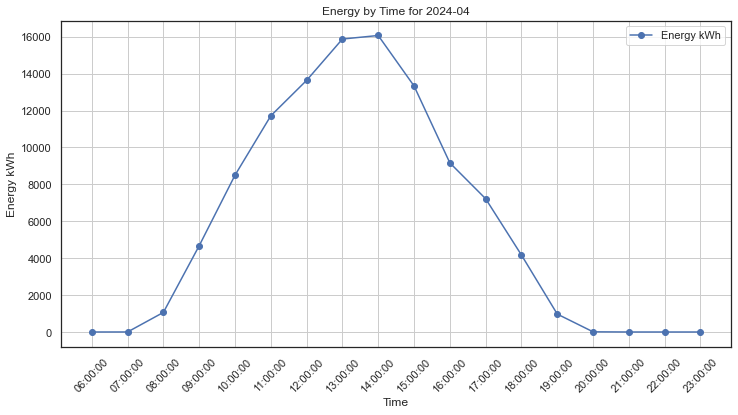

In [88]:
# Extract 'Time', 'Month', and 'Year' from the 'Date and Time' column
inv_hrly['Time'] = inv_hrly['Date and Time'].dt.strftime('%H:%M:%S')
inv_hrly['Month'] = inv_hrly['Date and Time'].dt.strftime('%Y-%m')

# Group by 'Time', 'Month', and 'Year', and sum the 'Energy kWh' and 'Expected Value kWh'
inv_energy = inv_hrly.groupby(['Time', 'Month'])[['Energy kWh']].sum().unstack()

# Plot individual line charts for each month
for month in inv_energy.columns.levels[1]:
    plt.figure(figsize=(12, 6))
    plt.plot(inv_energy.index, inv_energy['Energy kWh', month], marker='o', label='Energy kWh')
    plt.title(f'Energy by Time for {month}')
    plt.xlabel('Time')
    plt.ylabel('Energy kWh')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend()  # Show legend
    plt.grid(True)
    plt.show()

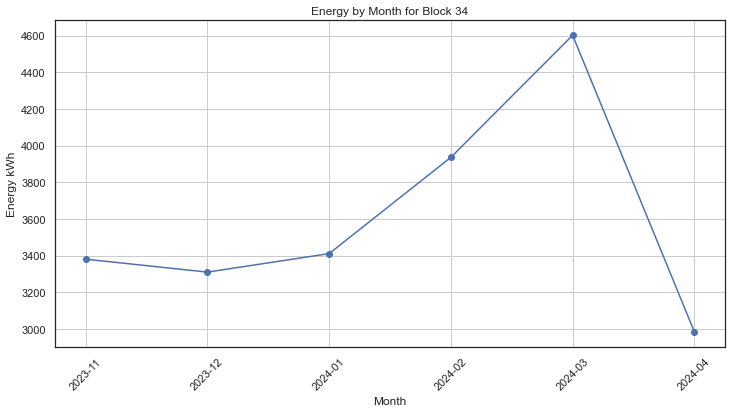

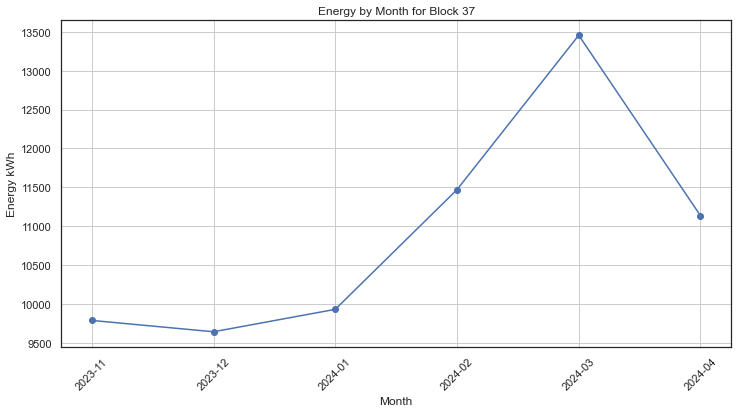

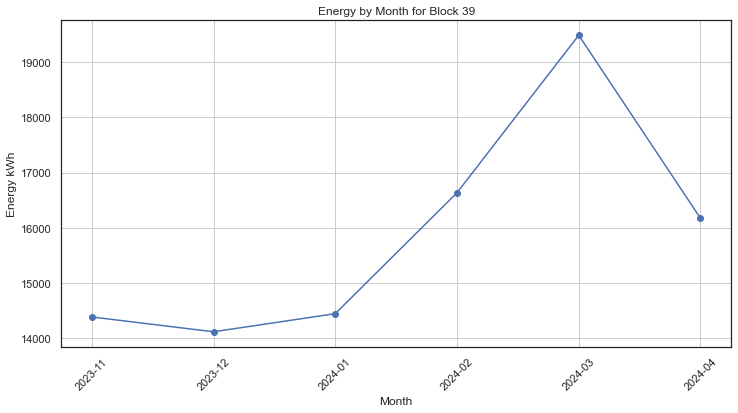

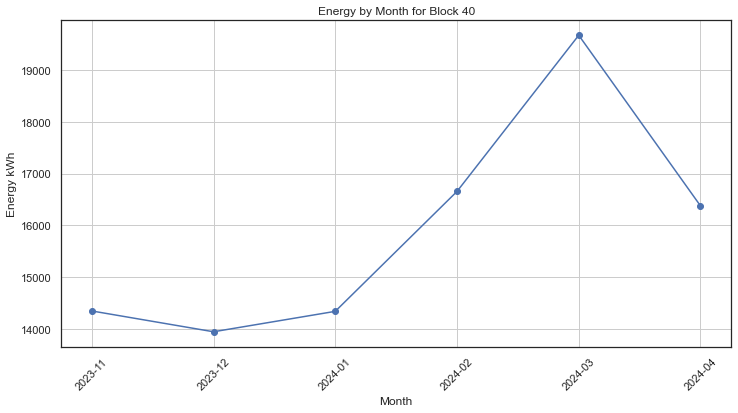

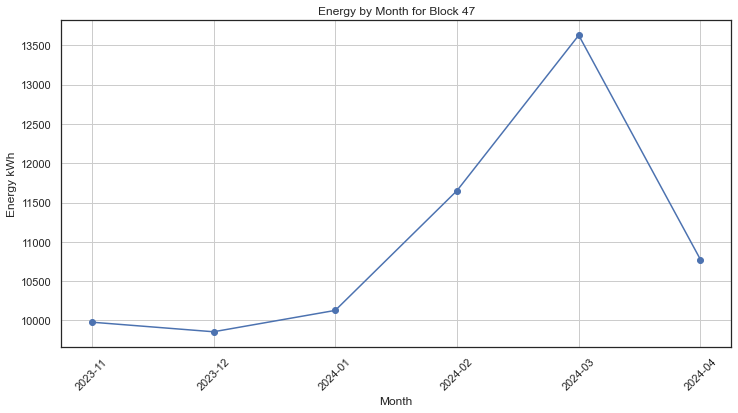

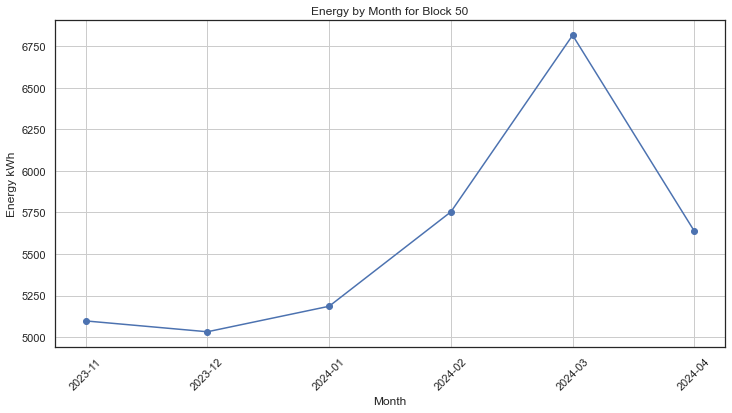

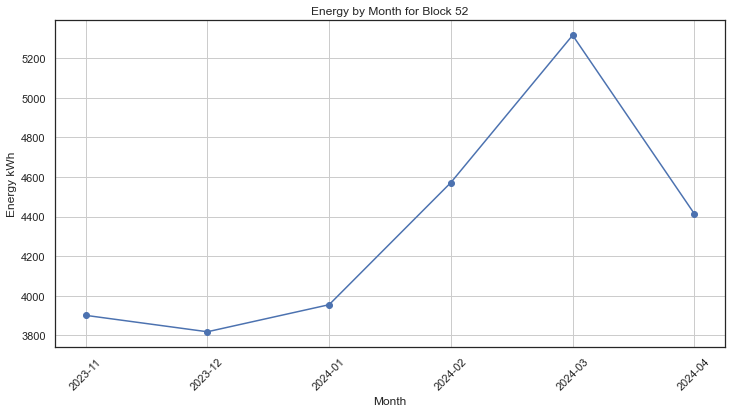

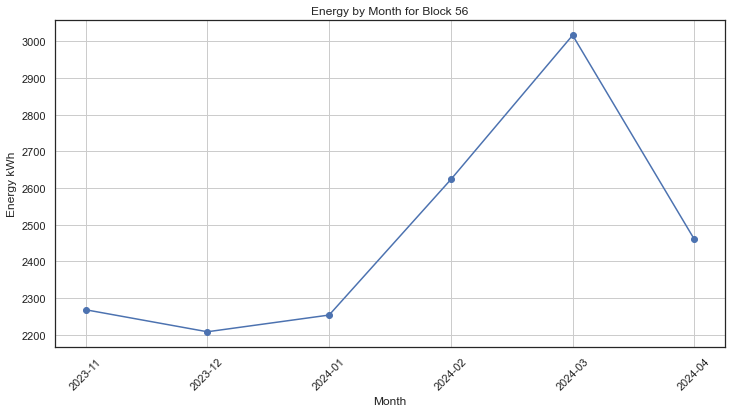

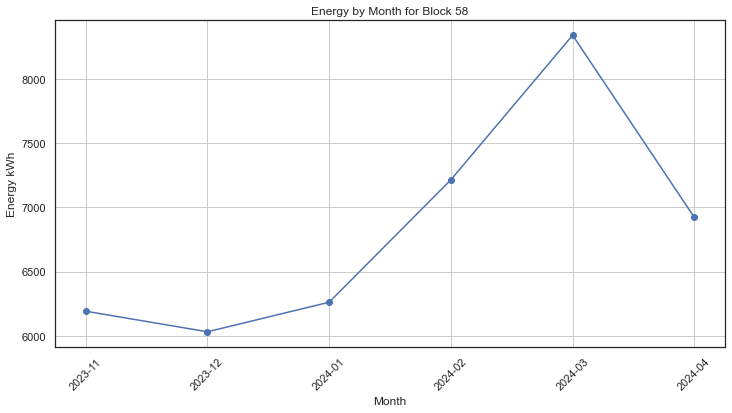

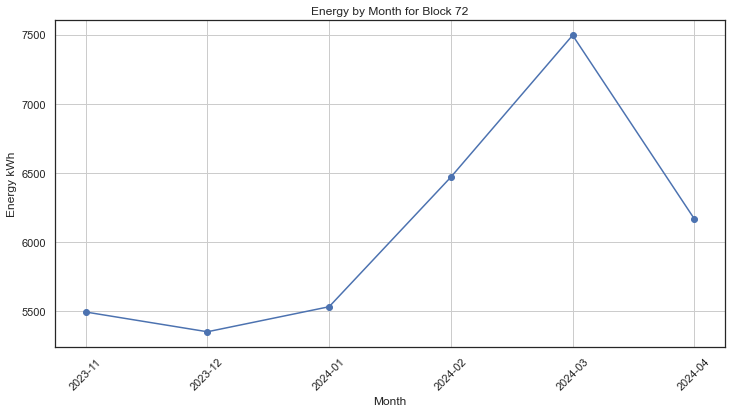

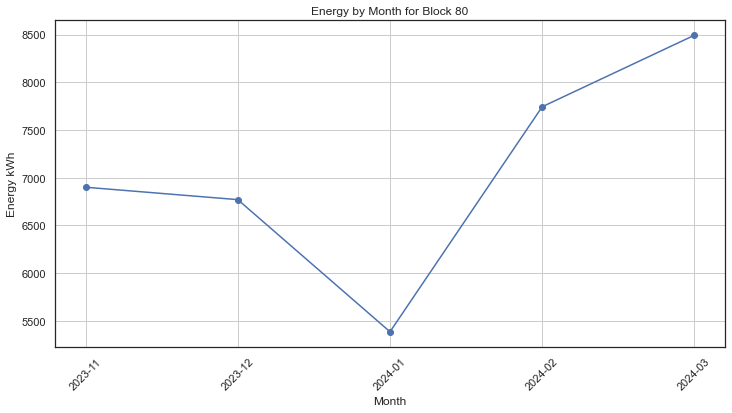

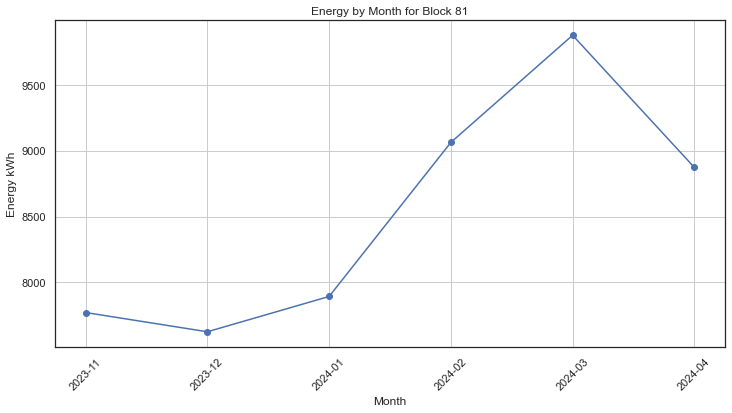

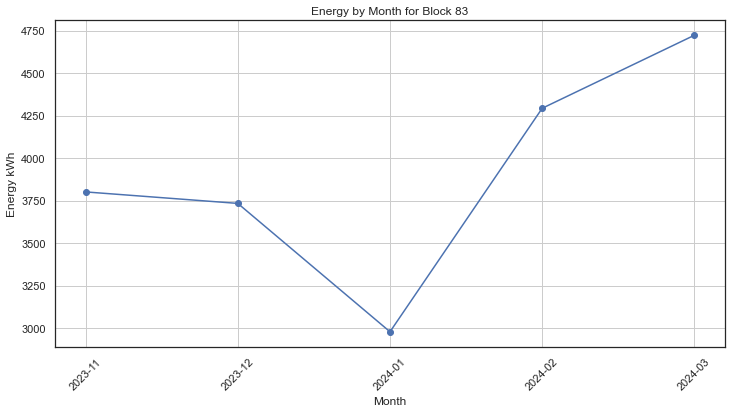

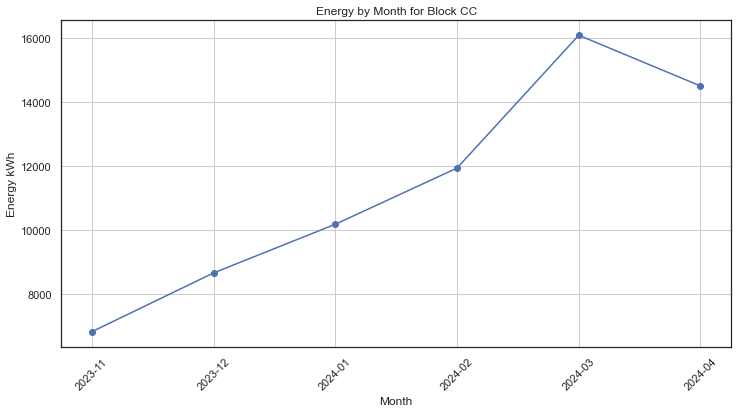

In [89]:
# Energy generated per block by month
block_energy = inv_hrly.groupby(['Month', 'block'])['Energy kWh'].sum().unstack()

# Plot individual line charts for each block
for block in block_energy.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(block_energy.index, block_energy[block], marker='o')
    plt.title(f'Energy by Month for Block {block}')
    plt.xlabel('Month')
    plt.ylabel('Energy kWh')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.show()

In [90]:
#cleaning 
# check for missng value 
inv_hrly.isnull().sum()
inv_hrly.isnull().mean()

Date and Time    0.0
Location Code    0.0
Energy kWh       0.0
block            0.0
Time             0.0
Month            0.0
dtype: float64

In [91]:
# Exploring irr
irr_hrly

Date and Time     Location Code  Energy kWh
0   2023-11-01 01:00:00  SN2-NAP81-599489       0.000
1   2023-11-01 02:00:00  SN2-NAP81-599489       0.000
2   2023-11-01 03:00:00  SN2-NAP81-599489       0.000
3   2023-11-01 04:00:00  SN2-NAP81-599489       0.167
4   2023-11-01 05:00:00  SN2-NAP81-599489       0.000
..                  ...               ...         ...
622 2024-04-29 17:00:00  SN2-NAP81-599489     511.883
623 2024-04-29 18:00:00  SN2-NAP81-599489     120.600
624 2024-04-29 19:00:00  SN2-NAP81-599489      13.900
625 2024-04-29 20:00:00  SN2-NAP81-599489       0.000
626 2024-04-29 21:00:00  SN2-NAP81-599489       0.000

[3725 rows x 3 columns]

In [92]:
irr_hrly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3725 entries, 0 to 626
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date and Time  3725 non-null   datetime64[ns]
 1   Location Code  3725 non-null   object        
 2   Energy kWh     3725 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 116.4+ KB


In [93]:
irr_hrly.describe()

Energy kWh
count  3725.000000
mean    172.400767
std     246.572687
min       0.000000
25%       0.000000
50%      23.917000
75%     297.533000
max    1036.217000

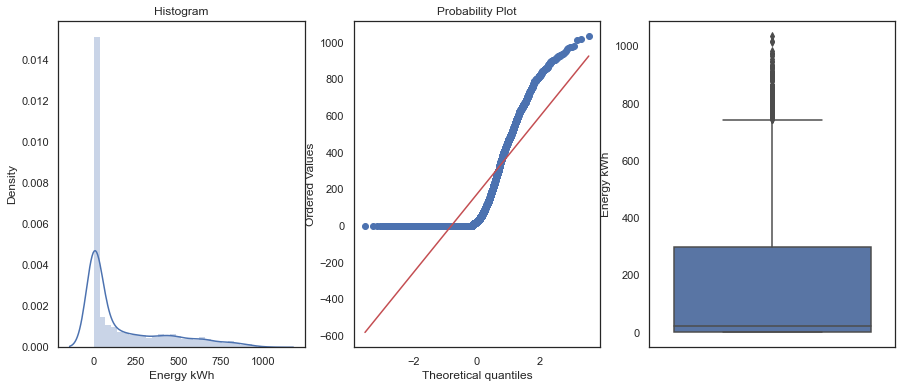

Number of outliers in Energy kWh: 159


In [94]:
diagnostic_plots(irr_hrly, 'Energy kWh')

In [95]:
#Extract block
irr_hrly['block'] = irr_hrly['Location Code'].str[7:9]
irr_hrly

Date and Time     Location Code  Energy kWh block
0   2023-11-01 01:00:00  SN2-NAP81-599489       0.000    81
1   2023-11-01 02:00:00  SN2-NAP81-599489       0.000    81
2   2023-11-01 03:00:00  SN2-NAP81-599489       0.000    81
3   2023-11-01 04:00:00  SN2-NAP81-599489       0.167    81
4   2023-11-01 05:00:00  SN2-NAP81-599489       0.000    81
..                  ...               ...         ...   ...
622 2024-04-29 17:00:00  SN2-NAP81-599489     511.883    81
623 2024-04-29 18:00:00  SN2-NAP81-599489     120.600    81
624 2024-04-29 19:00:00  SN2-NAP81-599489      13.900    81
625 2024-04-29 20:00:00  SN2-NAP81-599489       0.000    81
626 2024-04-29 21:00:00  SN2-NAP81-599489       0.000    81

[3725 rows x 4 columns]

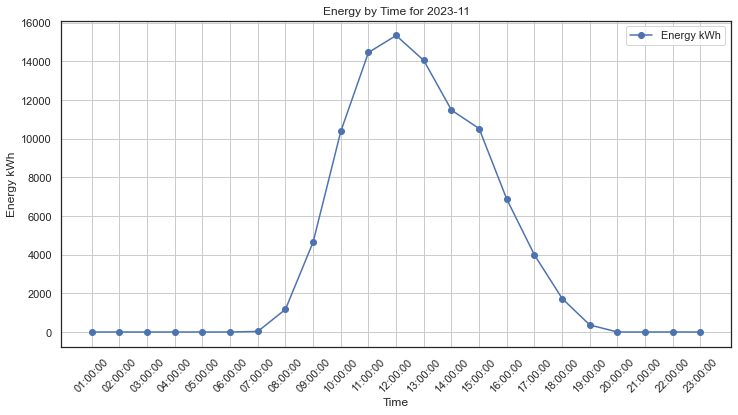

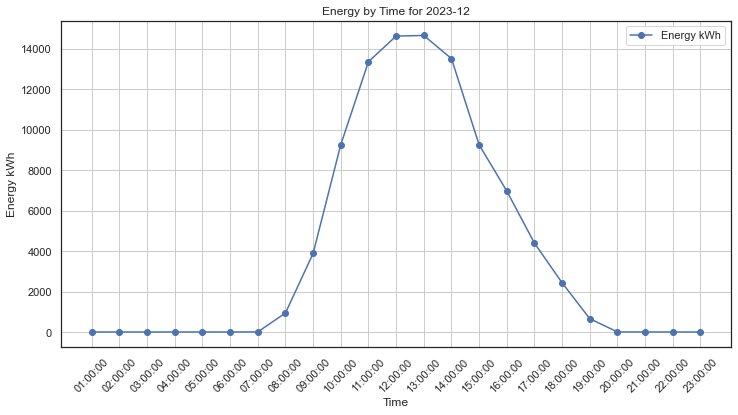

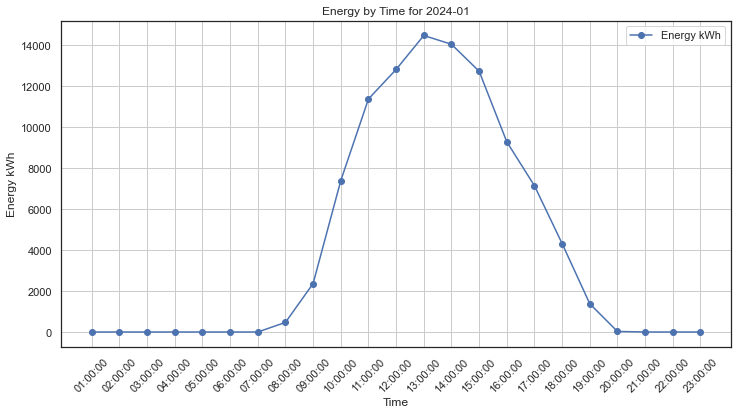

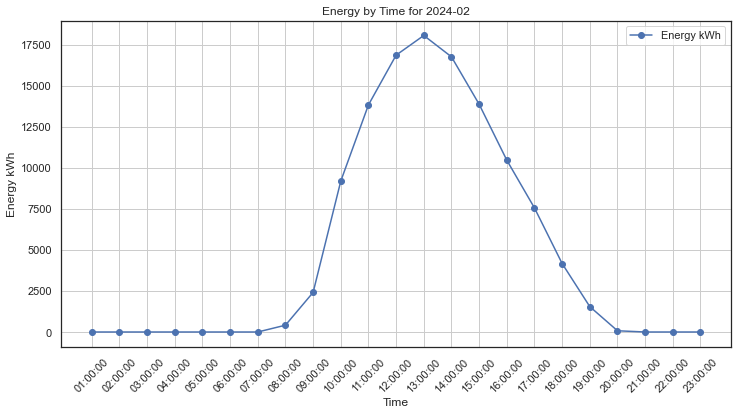

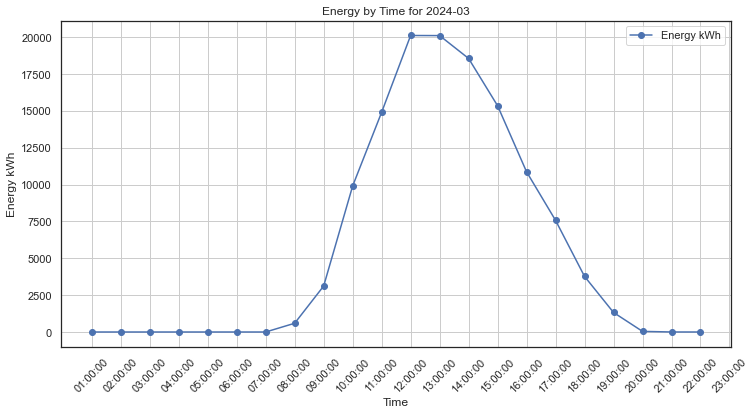

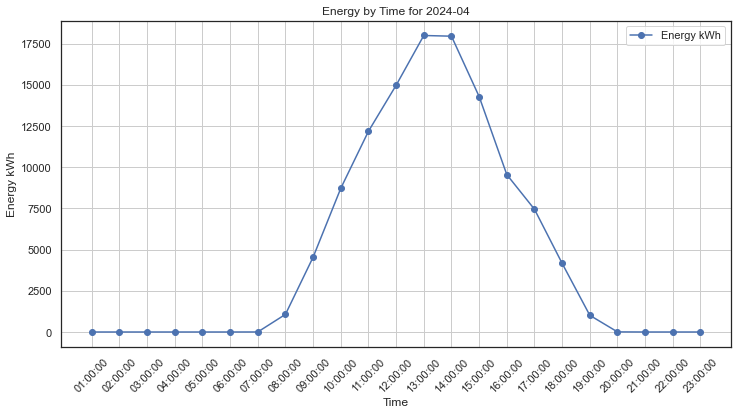

In [96]:
# Extract 'Time', 'Month', and 'Year' from the 'Date and Time' column
irr_hrly['Time'] = irr_hrly['Date and Time'].dt.strftime('%H:%M:%S')
irr_hrly['Month'] = irr_hrly['Date and Time'].dt.strftime('%Y-%m')

# Group by 'Time', 'Month', and 'Year', and sum the 'Energy kWh' and 'Expected Value kWh'
irr_energy = irr_hrly.groupby(['Time', 'Month'])[['Energy kWh']].sum().unstack()

# Plot individual line charts for each month
for month in irr_energy.columns.levels[1]:
    plt.figure(figsize=(12, 6))
    plt.plot(irr_energy.index, irr_energy['Energy kWh', month], marker='o', label='Energy kWh')
    plt.title(f'Energy by Time for {month}')
    plt.xlabel('Time')
    plt.ylabel('Energy kWh')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend()  # Show legend
    plt.grid(True)
    plt.show()

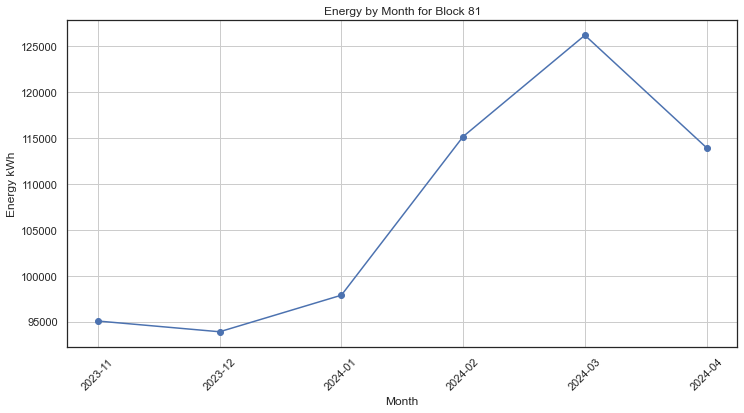

In [97]:
# Energy generated per block by month
irr_block_energy = irr_hrly.groupby(['Month', 'block'])['Energy kWh'].sum().unstack()

# Plot individual line charts for each block
for block in irr_block_energy.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(irr_block_energy.index, irr_block_energy[block], marker='o')
    plt.title(f'Energy by Month for Block {block}')
    plt.xlabel('Month')
    plt.ylabel('Energy kWh')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.show()

In [98]:
#cleaning 
# check for missng value 
irr_hrly.isnull().sum()
irr_hrly.isnull().mean()

Date and Time    0.0
Location Code    0.0
Energy kWh       0.0
block            0.0
Time             0.0
Month            0.0
dtype: float64